In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import squarify  # For treemaps
import geopandas as gpd
import plotly.express as px
import os
import plotly.graph_objects as go


C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2429835473.py:22: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


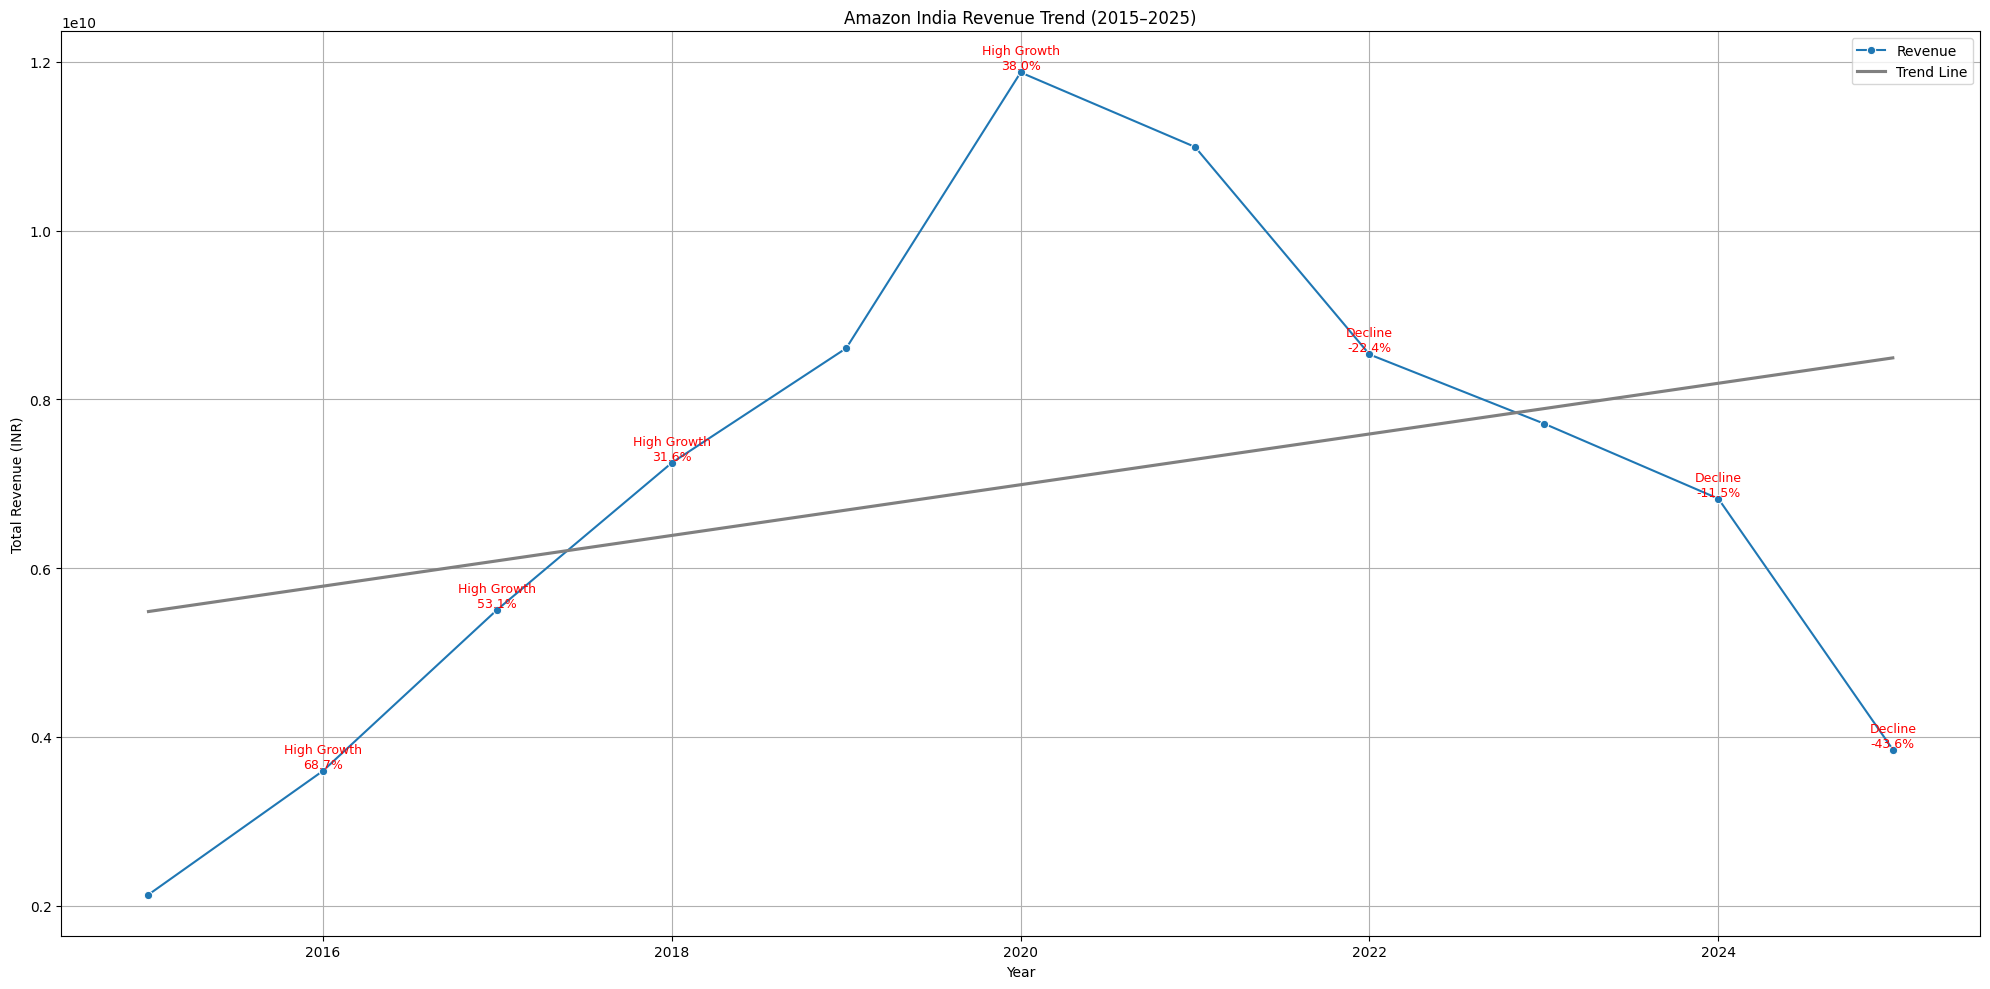

In [ ]:
# Q1

# Step 1: Load CSVs and tag with year
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'final_amount_inr' not in df.columns:
        print(f"⚠️ Missing 'final_amount_inr' in {year}. Skipping.")
        continue
    
    df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
    df.dropna(subset=['final_amount_inr'], inplace=True)
    df['year'] = year
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Aggregate yearly revenue
yearly_revenue = combined_df.groupby('year')['final_amount_inr'].sum().reset_index()
yearly_revenue.rename(columns={'final_amount_inr': 'revenue'}, inplace=True)
yearly_revenue['revenue'] = yearly_revenue['revenue'].round(2)

# Step 3: Calculate YoY growth
yearly_revenue['growth_rate'] = yearly_revenue['revenue'].pct_change().round(4) * 100

# Step 4: Flag growth periods
def classify_growth(rate):
    if pd.isna(rate):
        return 'N/A'
    elif rate > 20:
        return 'High Growth'
    elif rate < -10:
        return 'Decline'
    else:
        return 'Stable'

yearly_revenue['growth_flag'] = yearly_revenue['growth_rate'].apply(classify_growth)

# Step 5: Visualize with annotations
plt.figure(figsize=(20, 10))
sns.lineplot(data=yearly_revenue, x='year', y='revenue', marker='o', label='Revenue')
sns.regplot(data=yearly_revenue, x='year', y='revenue', scatter=False, label='Trend Line', ci=None, color='gray')

for i, row in yearly_revenue.iterrows():
    if row['growth_flag'] != 'Stable' and row['growth_flag'] != 'N/A':
        plt.text(row['year'], row['revenue'], f"{row['growth_flag']}\n{row['growth_rate']:.1f}%", 
                 ha='center', va='bottom', fontsize=9, color='red')

plt.title("Amazon India Revenue Trend (2015–2025)", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2807618344.py:20: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


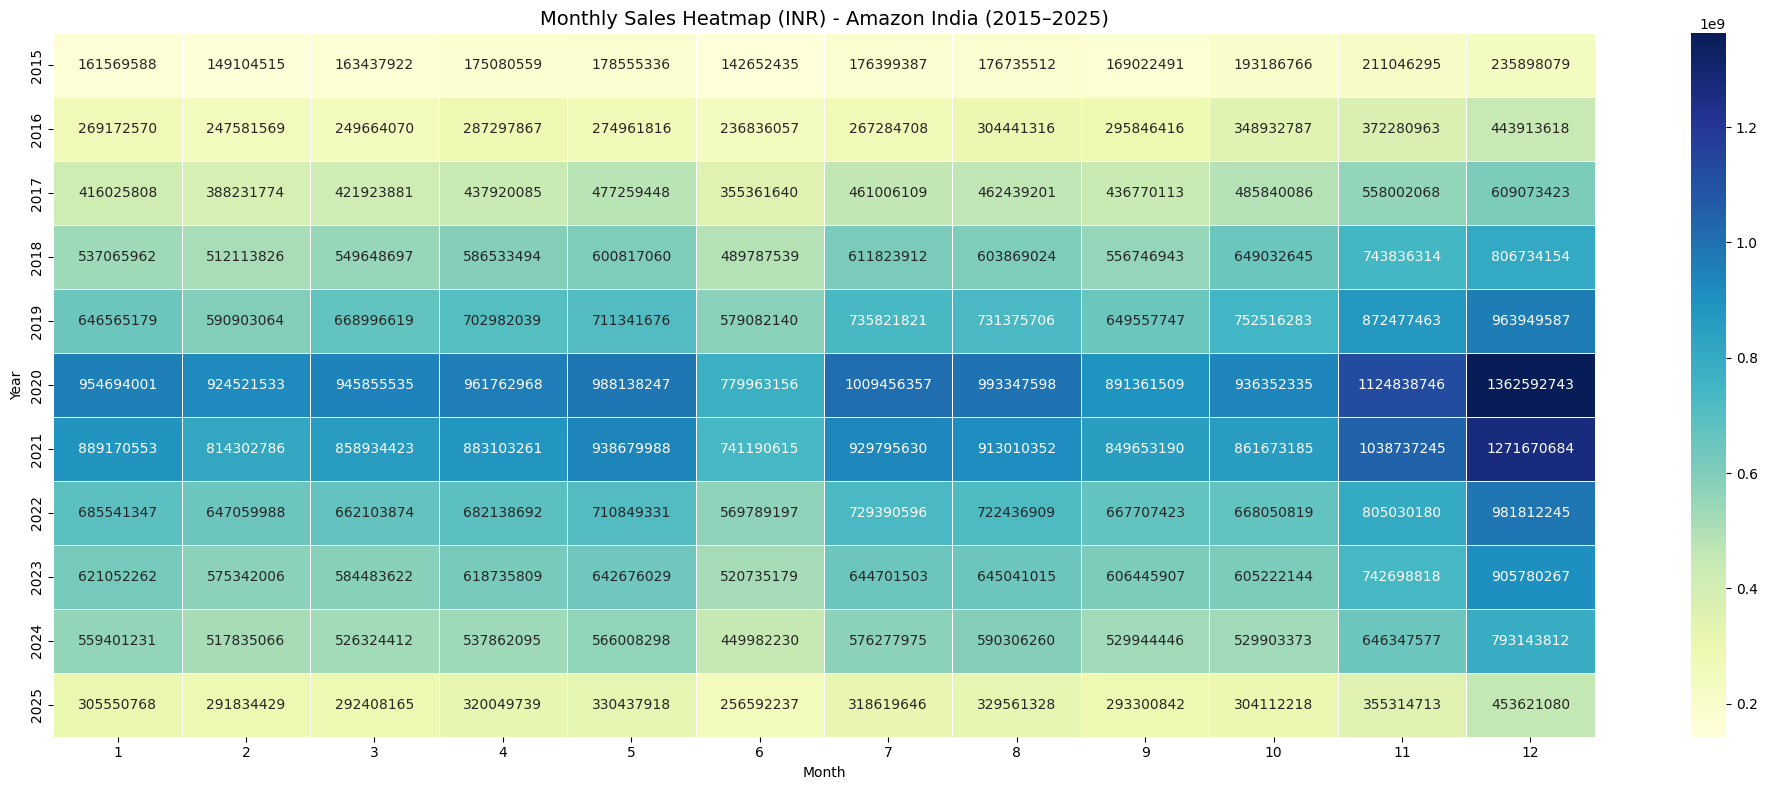

📈 Average Monthly Revenue Across Years:
month
12    8.025627e+08
11    6.791464e+08
8     5.884149e+08
7     5.873252e+08
5     5.836114e+08
10    5.758930e+08
4     5.630424e+08
1     5.496190e+08
9     5.405779e+08
3     5.385256e+08
2     5.144391e+08
6     4.656339e+08
Name: final_amount_inr, dtype: float64


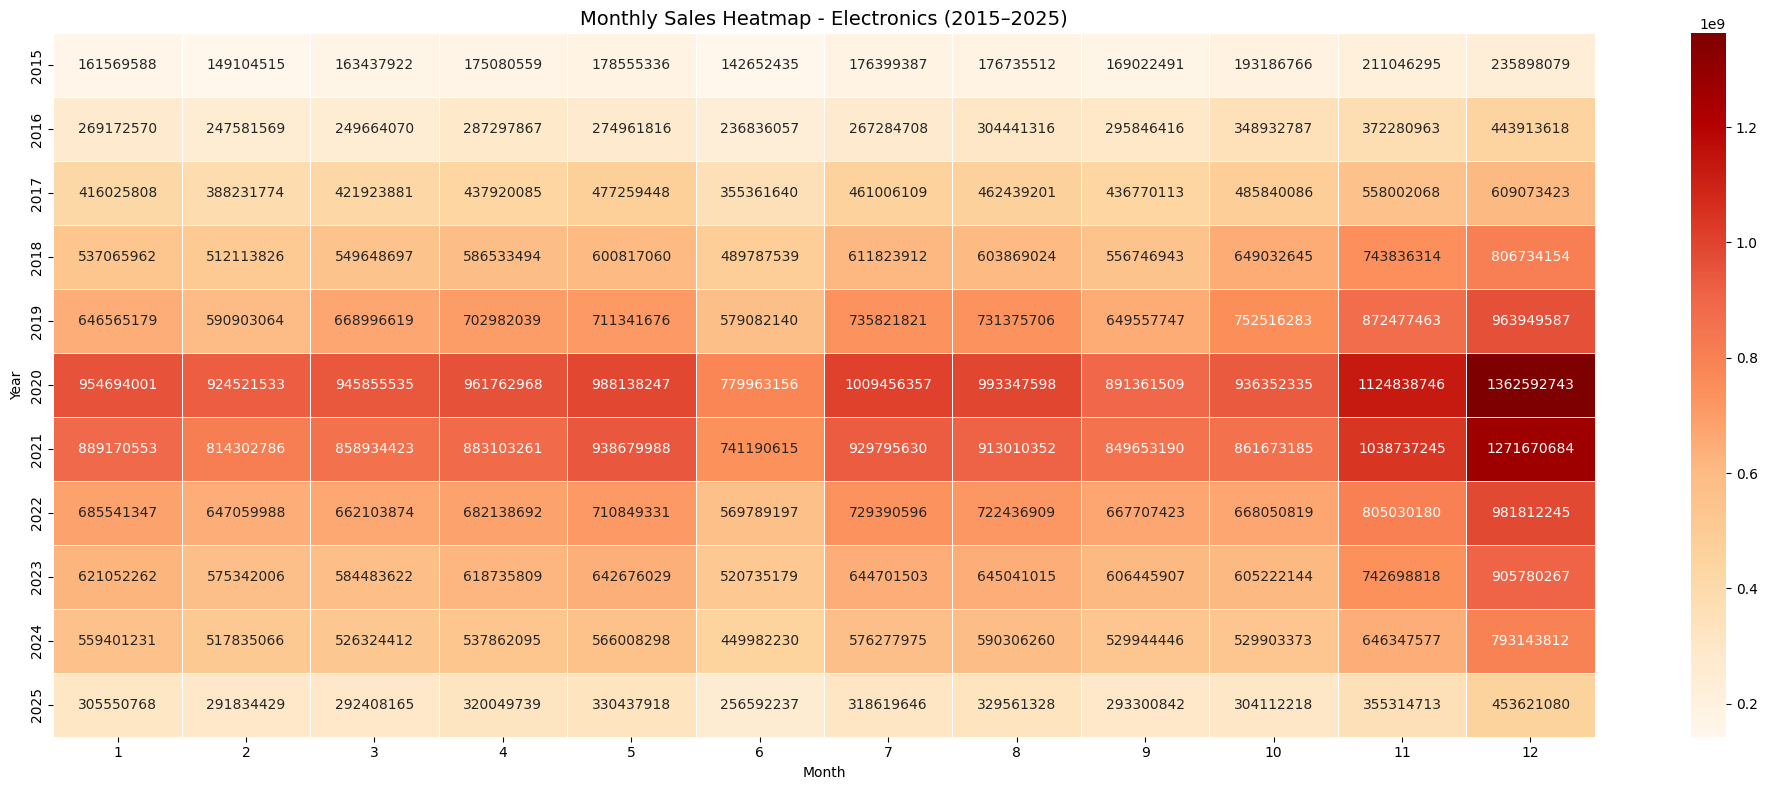

In [10]:
# Q2

# Step 1: Load and clean all CSVs
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'final_amount_inr' not in df.columns or 'order_date' not in df.columns:
        print(f"⚠️ Missing required columns in {year}. Skipping.")
        continue
    
    df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df.dropna(subset=['final_amount_inr', 'order_date'], inplace=True)
    
    df['year'] = df['order_date'].dt.year
    df['month'] = df['order_date'].dt.month
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Aggregate monthly revenue
monthly_sales = combined_df.groupby(['year', 'month'])['final_amount_inr'].sum().reset_index()
monthly_sales['final_amount_inr'] = monthly_sales['final_amount_inr'].round(2)

# Step 3: Monthly sales heatmap
heatmap_data = monthly_sales.pivot(index='year', columns='month', values='final_amount_inr')

plt.figure(figsize=(20, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", linewidths=0.5)
plt.title("Monthly Sales Heatmap (INR) - Amazon India (2015–2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

# Step 4: Identify peak selling months
peak_months = monthly_sales.groupby('month')['final_amount_inr'].mean().sort_values(ascending=False)
print("📈 Average Monthly Revenue Across Years:")
print(peak_months)

# Step 5: Compare seasonal trends by category
category_monthly = combined_df.groupby(['category', 'year', 'month'])['final_amount_inr'].sum().reset_index()

# Example: Visualize one category
category = 'Electronics'  # Change to any category you want to analyze
cat_data = category_monthly[category_monthly['category'] == category]
cat_heatmap = cat_data.pivot(index='year', columns='month', values='final_amount_inr')

plt.figure(figsize=(20, 8))
sns.heatmap(cat_heatmap, annot=True, fmt=".0f", cmap="OrRd", linewidths=0.5)
plt.title(f"Monthly Sales Heatmap - {category} (2015–2025)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\4072715898.py:20: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


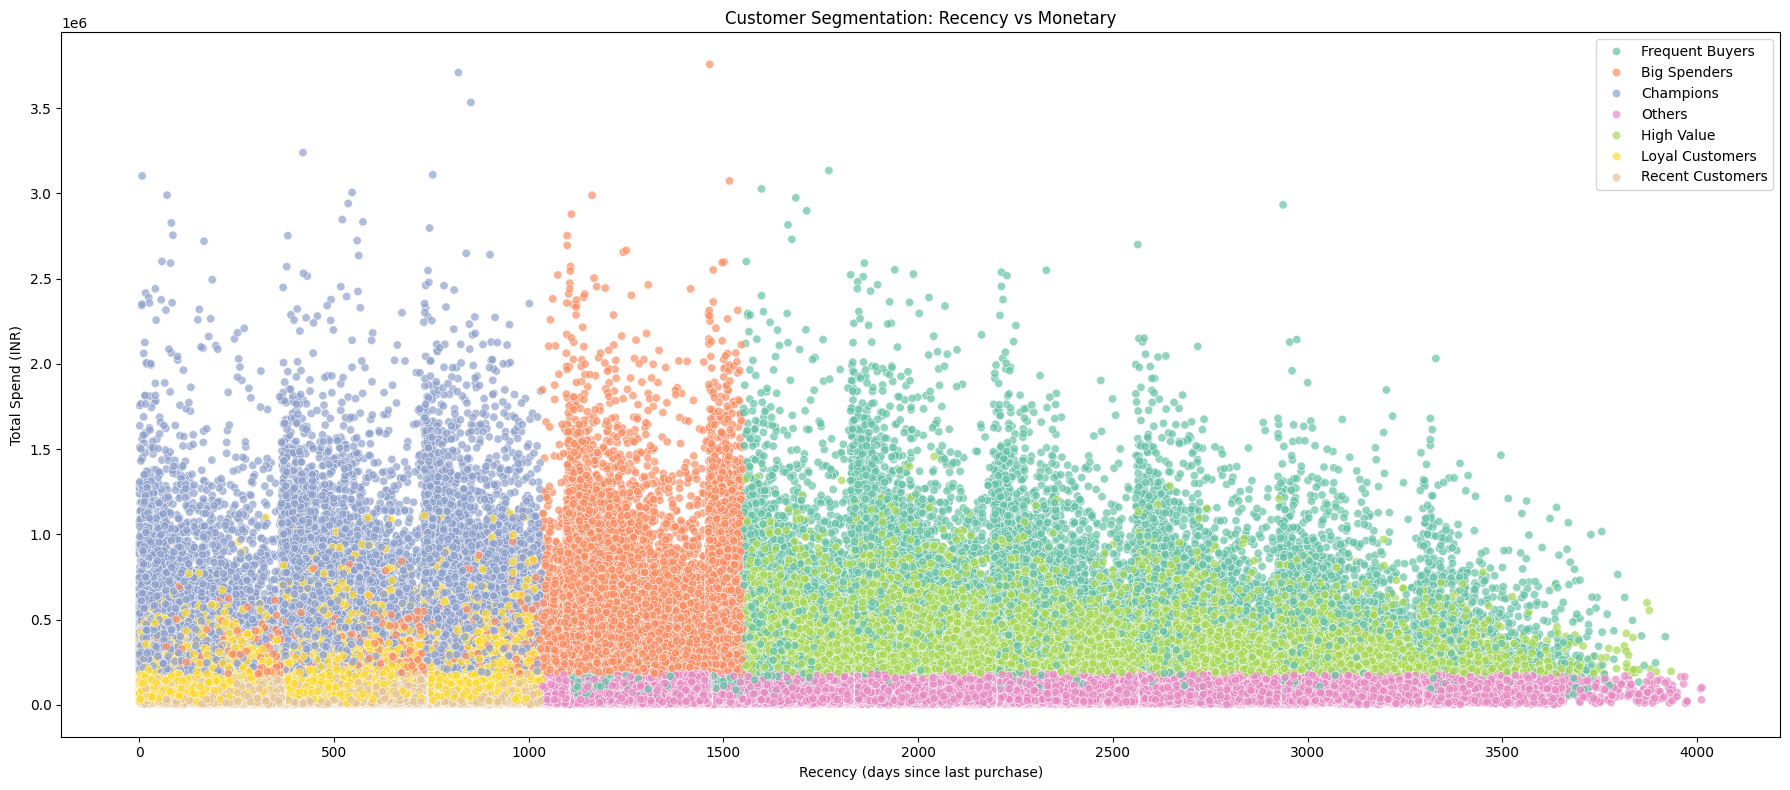

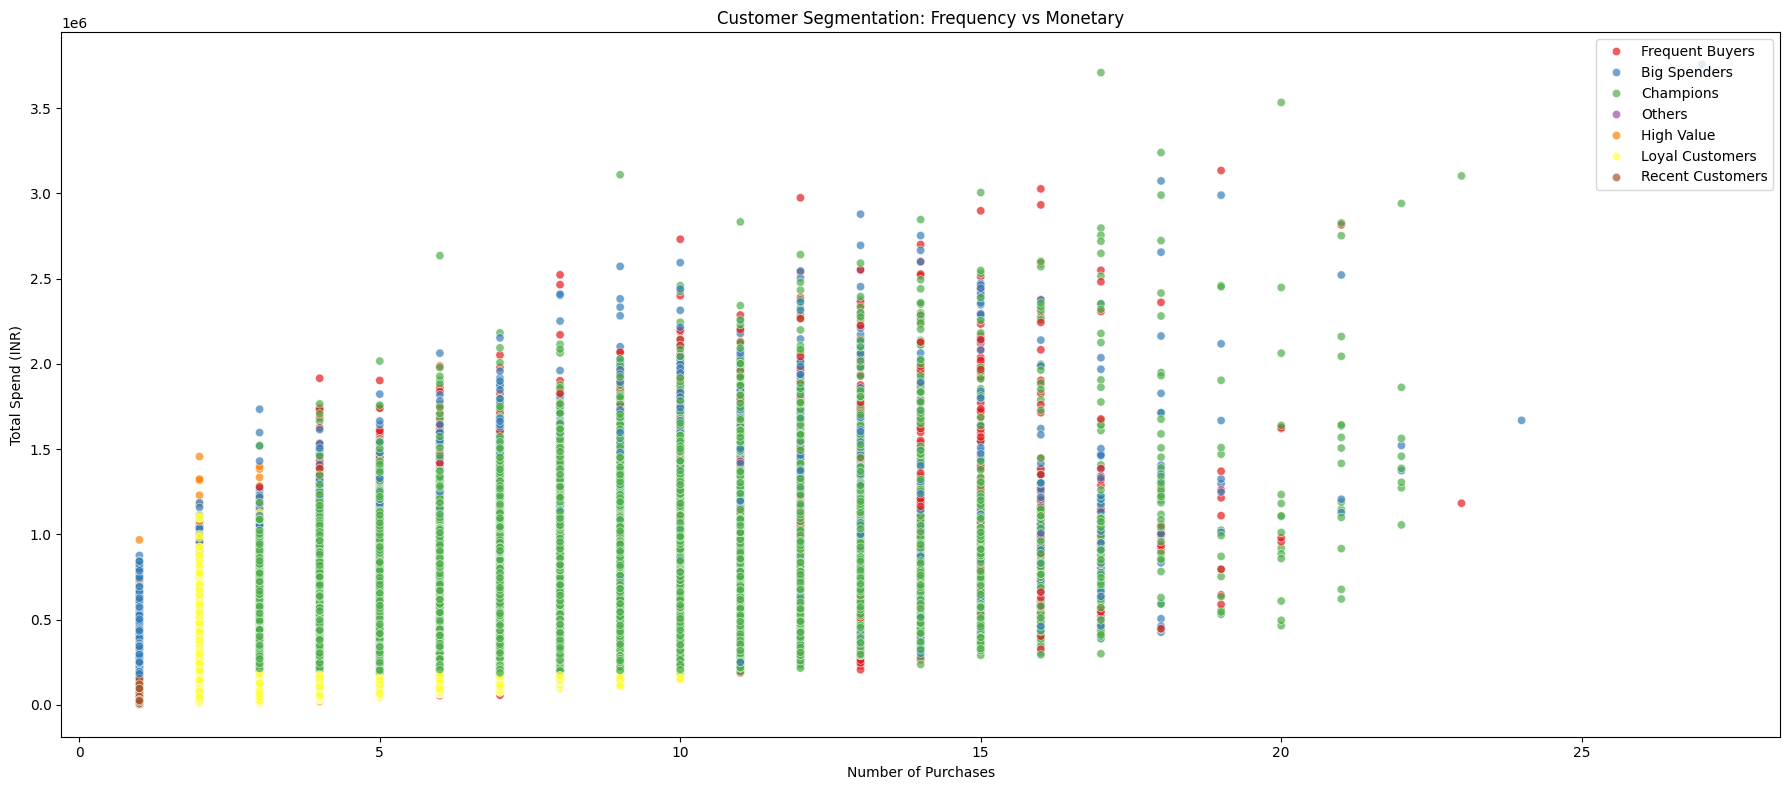

In [14]:
# Q3        

# Step 1: Load and clean all CSVs
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'customer_id' not in df.columns or 'order_date' not in df.columns or 'final_amount_inr' not in df.columns:
        print(f"⚠️ Missing required columns in {year}. Skipping.")
        continue
    
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')
    df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
    df.dropna(subset=['customer_id', 'order_date', 'final_amount_inr'], inplace=True)
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: RFM Calculation
snapshot_date = combined_df['order_date'].max() + dt.timedelta(days=1)

rfm = combined_df.groupby('customer_id').agg({
    'order_date': lambda x: (snapshot_date - x.max()).days,  # Recency
    'customer_id': 'count',                                  # Frequency
    'final_amount_inr': 'sum'                                # Monetary
}).rename(columns={
    'order_date': 'Recency',
    'customer_id': 'Frequency',
    'final_amount_inr': 'Monetary'
}).reset_index()

# Step 3: RFM Scoring (1 = worst, 5 = best)
rfm['R'] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)
rfm['F'] = pd.qcut(rfm['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]).astype(int)
rfm['M'] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5]).astype(int)

rfm['RFM_Score'] = rfm['R'].astype(str) + rfm['F'].astype(str) + rfm['M'].astype(str)

# Step 4: Segment Mapping
def segment(r, f, m):
    if r >= 4 and f >= 4 and m >= 4:
        return 'Champions'
    elif r >= 4 and f >= 3:
        return 'Loyal Customers'
    elif r >= 3 and m >= 4:
        return 'Big Spenders'
    elif r >= 4:
        return 'Recent Customers'
    elif f >= 4:
        return 'Frequent Buyers'
    elif m >= 4:
        return 'High Value'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(lambda x: segment(x['R'], x['F'], x['M']), axis=1)

# Step 5: Visualize Segments
plt.figure(figsize=(18, 8))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Segment', palette='Set2', alpha=0.7)
plt.title("Customer Segmentation: Recency vs Monetary")
plt.xlabel("Recency (days since last purchase)")
plt.ylabel("Total Spend (INR)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(18, 8))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='Segment', palette='Set1', alpha=0.7)
plt.title("Customer Segmentation: Frequency vs Monetary")
plt.xlabel("Number of Purchases")
plt.ylabel("Total Spend (INR)")
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2936802025.py:20: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


<Figure size 1800x800 with 0 Axes>

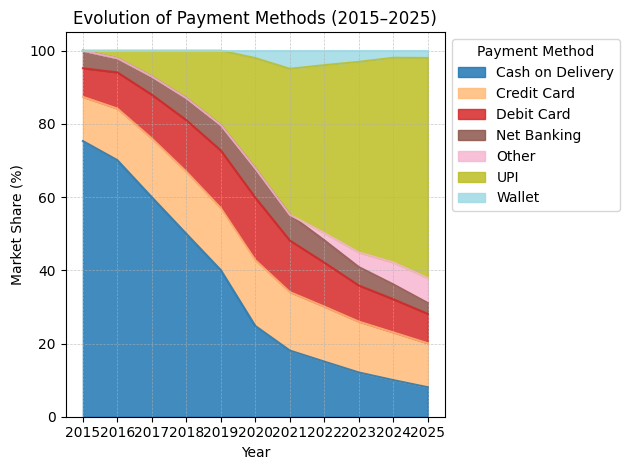

In [25]:
#Q4 

# Step 1: Load and clean all CSVs
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'payment_method_cleaned' not in df.columns:
        print(f"⚠️ Missing 'payment_method_cleaned' in {year}. Skipping.")
        continue
    
    df['year'] = year
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Aggregate payment method usage per year
payment_counts = combined_df.groupby(['year', 'payment_method_cleaned']).size().reset_index(name='count')

# Step 3: Pivot and ensure all years are present
pivot_df = payment_counts.pivot(index='year', columns='payment_method_cleaned', values='count').fillna(0)

# Add missing years explicitly
all_years = list(range(2015, 2026))
pivot_df = pivot_df.reindex(all_years, fill_value=0)

# Step 4: Calculate market share
market_share = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100

# Step 5: Visualize with stacked area chart and grid
plt.figure(figsize=(18,8))
market_share.plot.area(colormap='tab20', alpha=0.85)
plt.title("Evolution of Payment Methods (2015–2025)", fontsize=12)
plt.xlabel("Year")
plt.ylabel("Market Share (%)")
plt.xticks(all_years)  # Show all years on x-axis
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(title="Payment Method", loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3213621625.py:20: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)


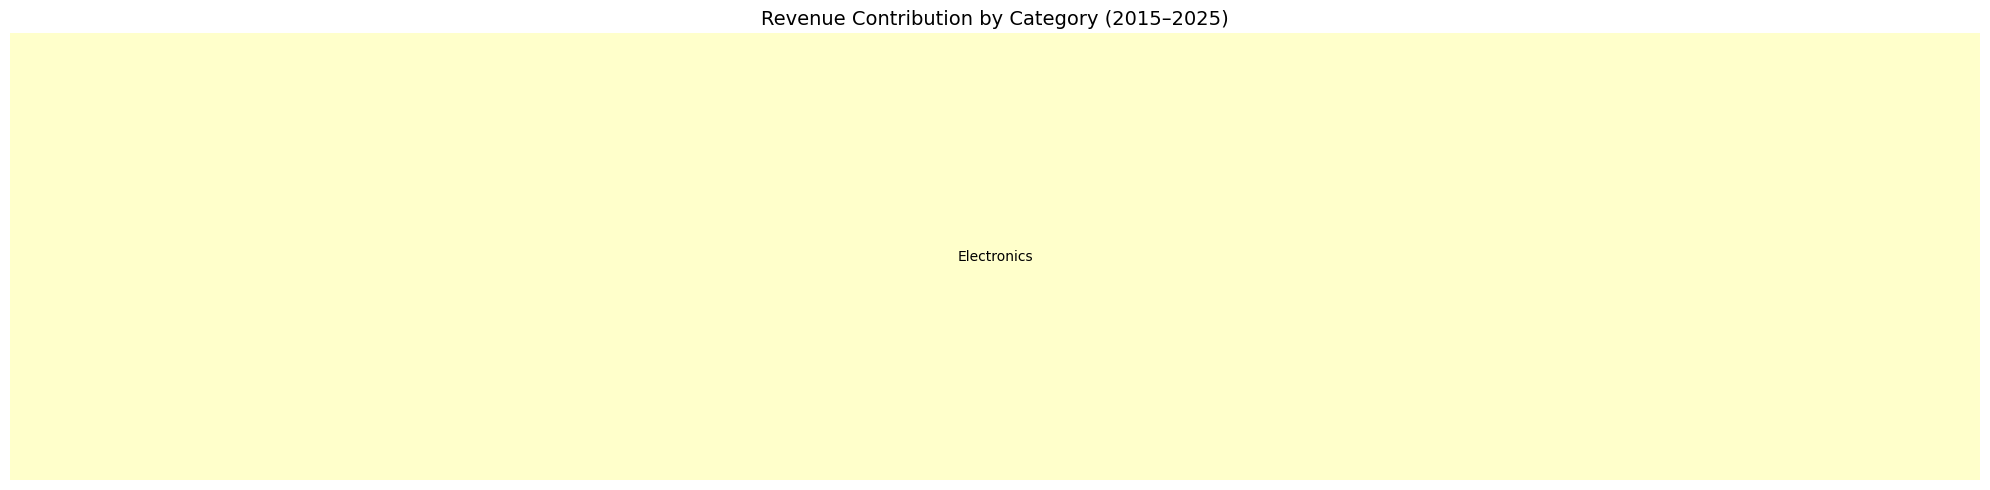

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3213621625.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x='CAGR', y='category', palette='viridis')


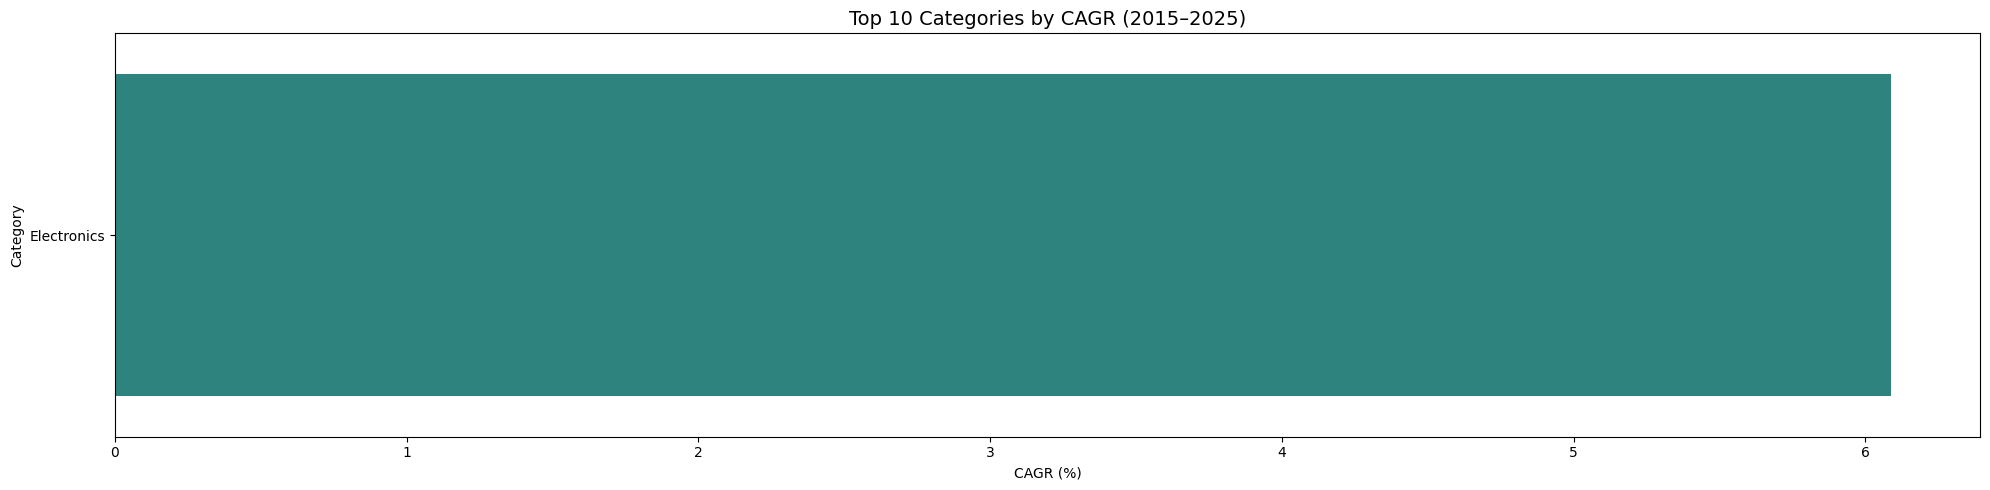

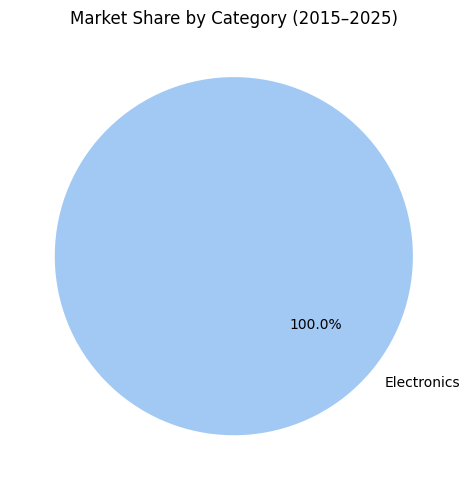

In [28]:
#Q5

# Step 1: Load and clean all CSVs
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'category' not in df.columns or 'final_amount_inr' not in df.columns:
        print(f"⚠️ Missing required columns in {year}. Skipping.")
        continue
    
    df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
    df.dropna(subset=['category', 'final_amount_inr'], inplace=True)
    df['year'] = year
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

# Step 2: Aggregate revenue by category
category_revenue = combined_df.groupby('category')['final_amount_inr'].sum().reset_index()
category_revenue['final_amount_inr'] = category_revenue['final_amount_inr'].round(2)
category_revenue.sort_values(by='final_amount_inr', ascending=False, inplace=True)

# Step 3: Calculate CAGR (2015–2025)
category_yearly = combined_df.groupby(['category', 'year'])['final_amount_inr'].sum().reset_index()
pivot_growth = category_yearly.pivot(index='category', columns='year', values='final_amount_inr').fillna(0)

def calculate_cagr(start, end, periods):
    if start == 0 or periods == 0:
        return 0
    return ((end / start) ** (1 / periods) - 1) * 100

pivot_growth['CAGR'] = pivot_growth.apply(lambda row: calculate_cagr(row[2015], row[2025], 10), axis=1)
pivot_growth = pivot_growth.reset_index()

# Step 4: Market share calculation
total_revenue = category_revenue['final_amount_inr'].sum()
category_revenue['market_share'] = (category_revenue['final_amount_inr'] / total_revenue * 100).round(2)

# Step 5: Treemap - Revenue Contribution
plt.figure(figsize=(20, 5))
squarify.plot(sizes=category_revenue['final_amount_inr'], 
              label=category_revenue['category'], 
              color=sns.color_palette('Spectral', len(category_revenue)), 
              alpha=0.8)
plt.title("Revenue Contribution by Category (2015–2025)", fontsize=14)
plt.axis('off')
plt.tight_layout()
plt.show()

# Step 6: Bar Chart - Top Categories by CAGR
top_growth = pivot_growth.sort_values(by='CAGR', ascending=False).head(10)

plt.figure(figsize=(20, 5))
sns.barplot(data=top_growth, x='CAGR', y='category', palette='viridis')
plt.title("Top 10 Categories by CAGR (2015–2025)", fontsize=14)
plt.xlabel("CAGR (%)")
plt.ylabel("Category")
plt.tight_layout()
plt.show()

# Step 7: Pie Chart - Market Share
plt.figure(figsize=(20, 5))
plt.pie(category_revenue['market_share'], 
        labels=category_revenue['category'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=sns.color_palette('pastel', len(category_revenue)))
plt.title("Market Share by Category (2015–2025)", fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3944711327.py:20: DtypeWarning: Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path)
C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3944711327.py:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=aov, x='is_prime_member', y='final_amount_inr', palette='Set2')


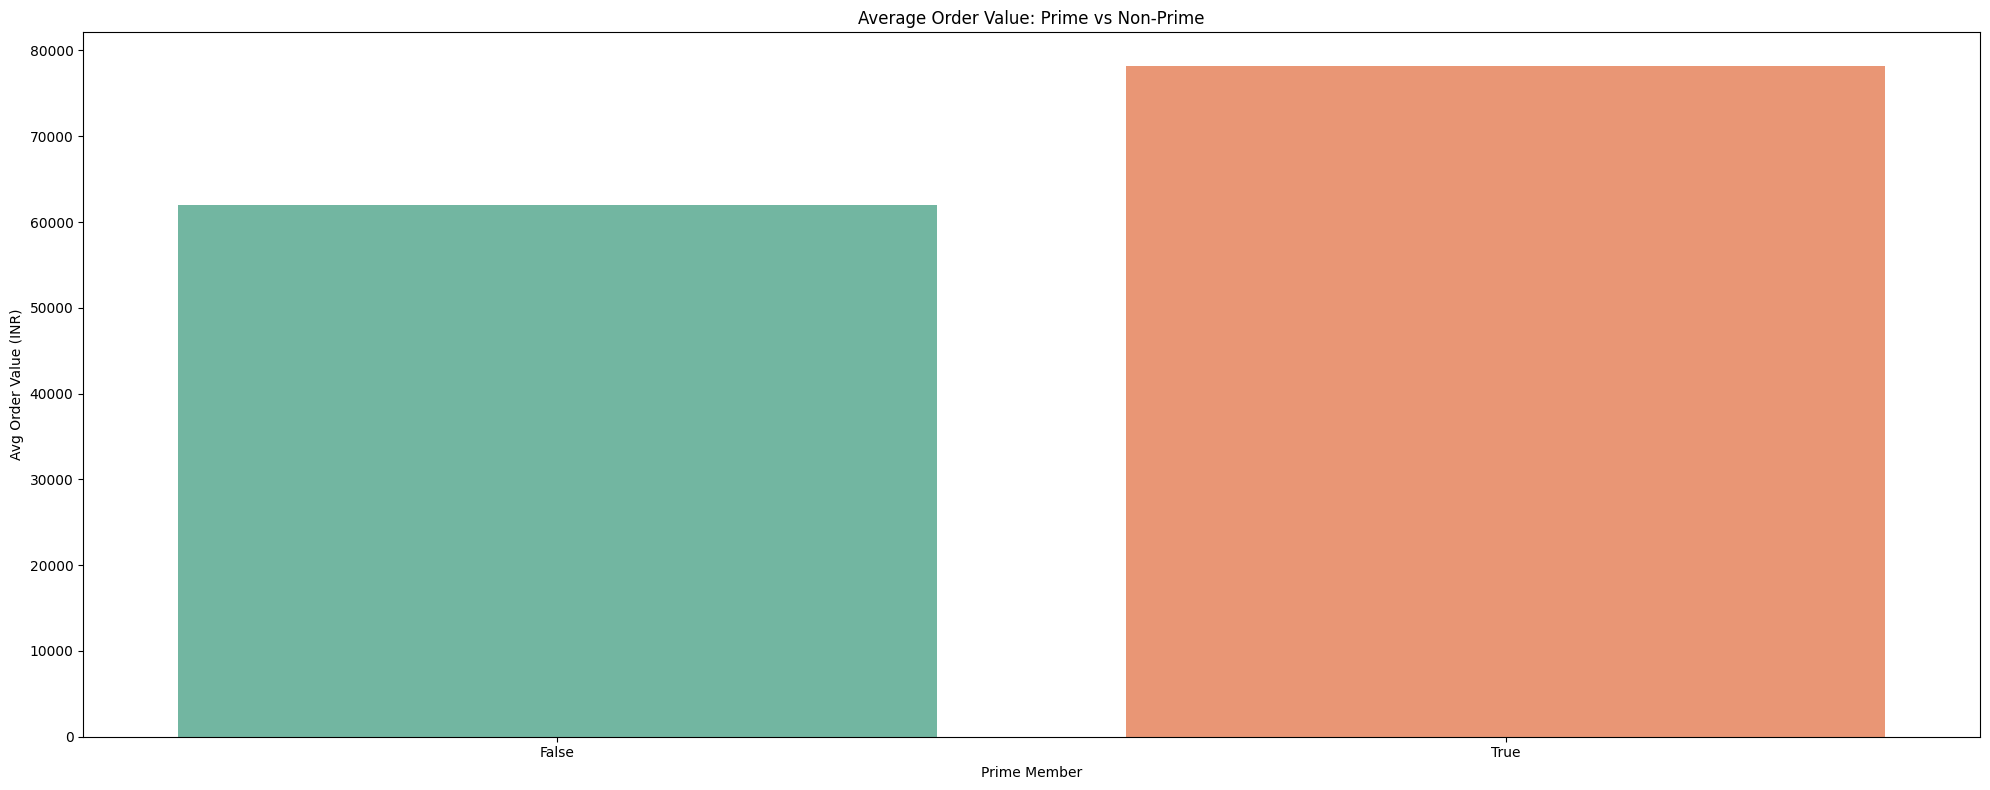

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3944711327.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=order_freq, x='is_prime_member', y='order_count', palette='Set3')


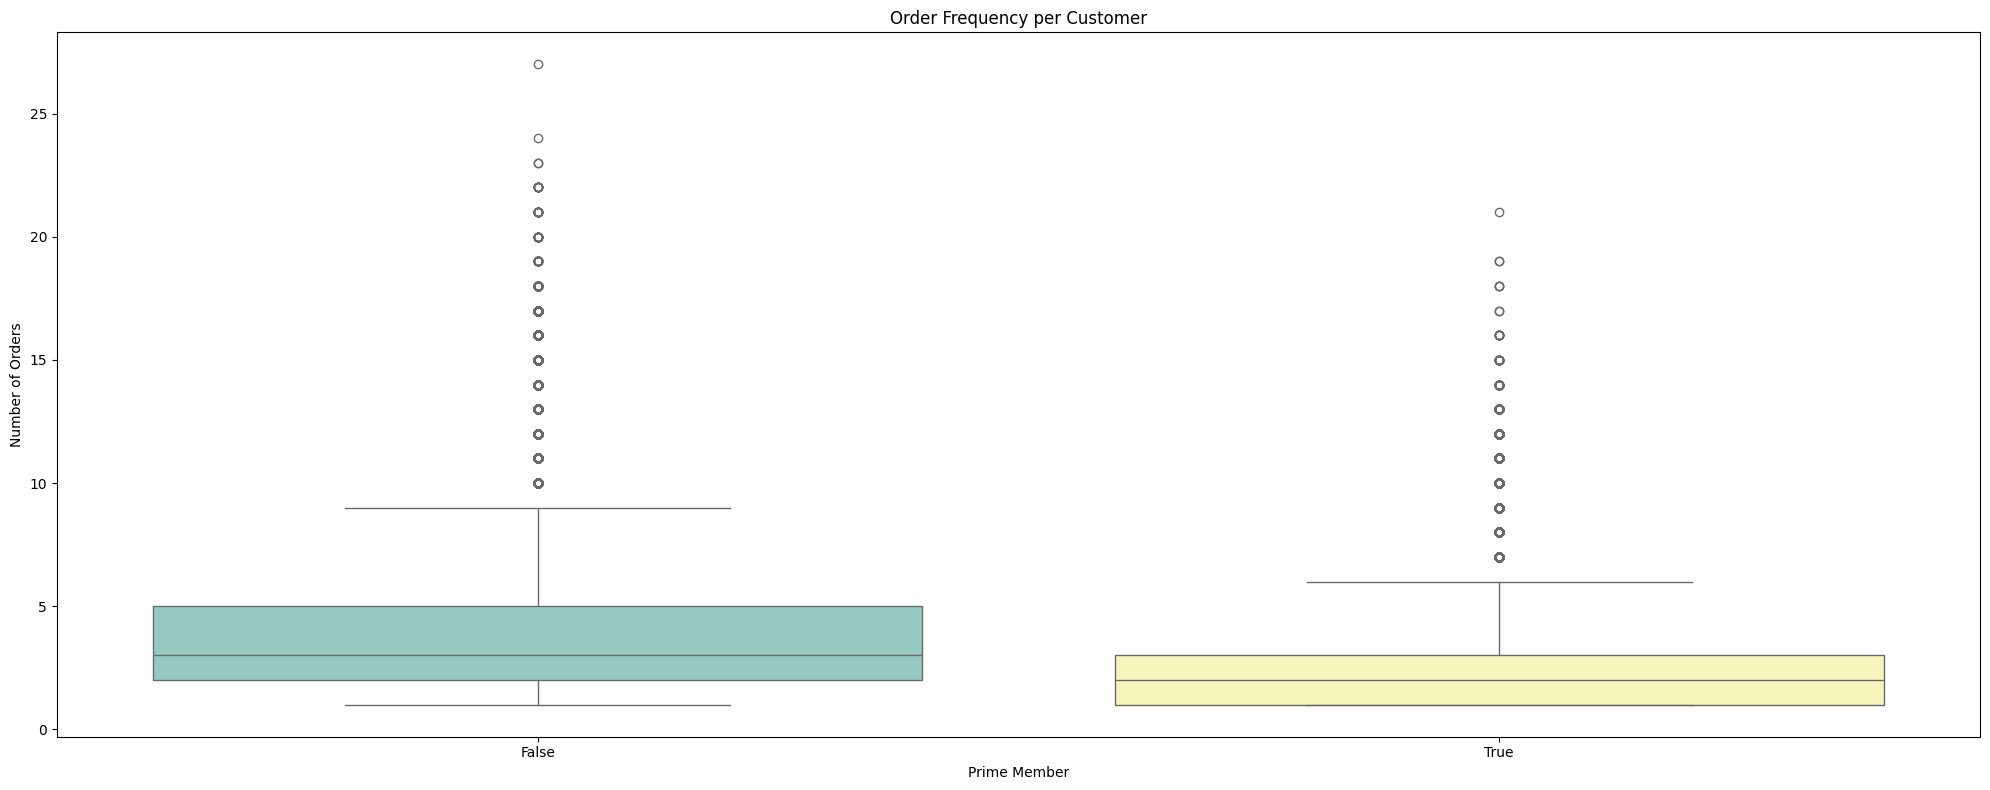

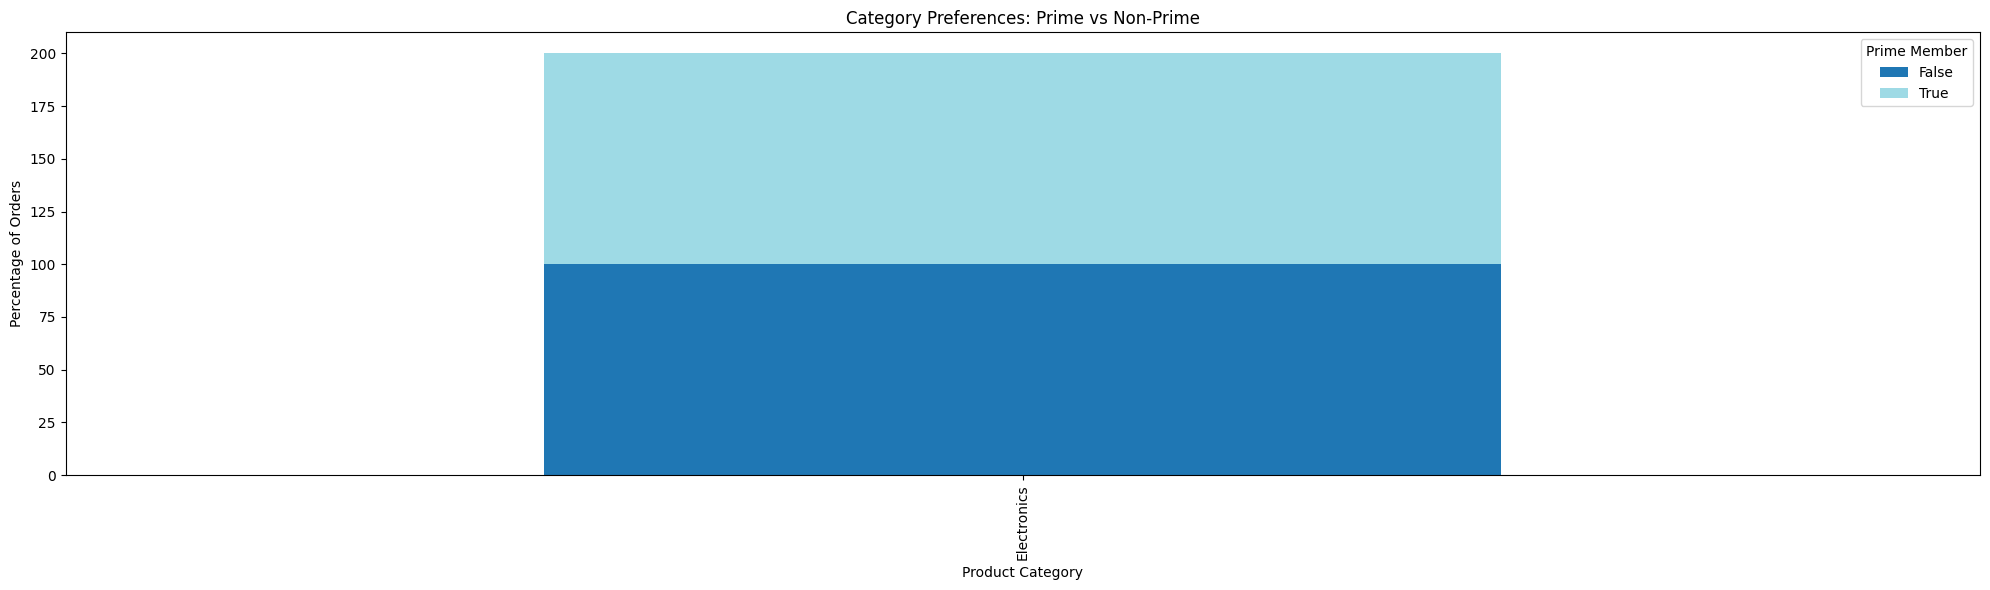

In [31]:
#Q6

# Step 1: Load and clean all CSVs
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

dfs = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df.columns = df.columns.str.strip().str.lower()
    
    if 'is_prime_member' not in df.columns or 'final_amount_inr' not in df.columns or 'customer_id' not in df.columns or 'category' not in df.columns:
        print(f"⚠️ Missing required columns in {year}. Skipping.")
        continue
    
    df['final_amount_inr'] = pd.to_numeric(df['final_amount_inr'], errors='coerce')
    df.dropna(subset=['final_amount_inr', 'is_prime_member', 'customer_id', 'category'], inplace=True)
    df['year'] = year
    dfs.append(df)

combined_df = pd.concat(dfs, ignore_index=True)

#Step 2 : Avg order value 
aov = combined_df.groupby('is_prime_member')['final_amount_inr'].mean().reset_index()
aov['final_amount_inr'] = aov['final_amount_inr'].round(2)

plt.figure(figsize=(20, 8))
sns.barplot(data=aov, x='is_prime_member', y='final_amount_inr', palette='Set2')
plt.title("Average Order Value: Prime vs Non-Prime")
plt.xlabel("Prime Member")
plt.ylabel("Avg Order Value (INR)")
plt.tight_layout()
plt.show()

#step 3 : Order frequency 
order_freq = combined_df.groupby(['customer_id', 'is_prime_member']).size().reset_index(name='order_count')

plt.figure(figsize=(20, 8))
sns.boxplot(data=order_freq, x='is_prime_member', y='order_count', palette='Set3')
plt.title("Order Frequency per Customer")
plt.xlabel("Prime Member")
plt.ylabel("Number of Orders")
plt.tight_layout()
plt.show()

#Step 4: Preferance comparison
category_dist = combined_df.groupby(['is_prime_member', 'category']).size().reset_index(name='count')
category_pivot = category_dist.pivot(index='category', columns='is_prime_member', values='count').fillna(0)

# Normalize to percentage
category_pivot_percent = category_pivot.div(category_pivot.sum(axis=0), axis=1) * 100

category_pivot_percent.plot(kind='bar', stacked=True, figsize=(20, 6), colormap='tab20')
plt.title("Category Preferences: Prime vs Non-Prime")
plt.xlabel("Product Category")
plt.ylabel("Percentage of Orders")
plt.legend(title="Prime Member", loc='upper right')
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1682063254.py:21: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1682063254.py:36: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




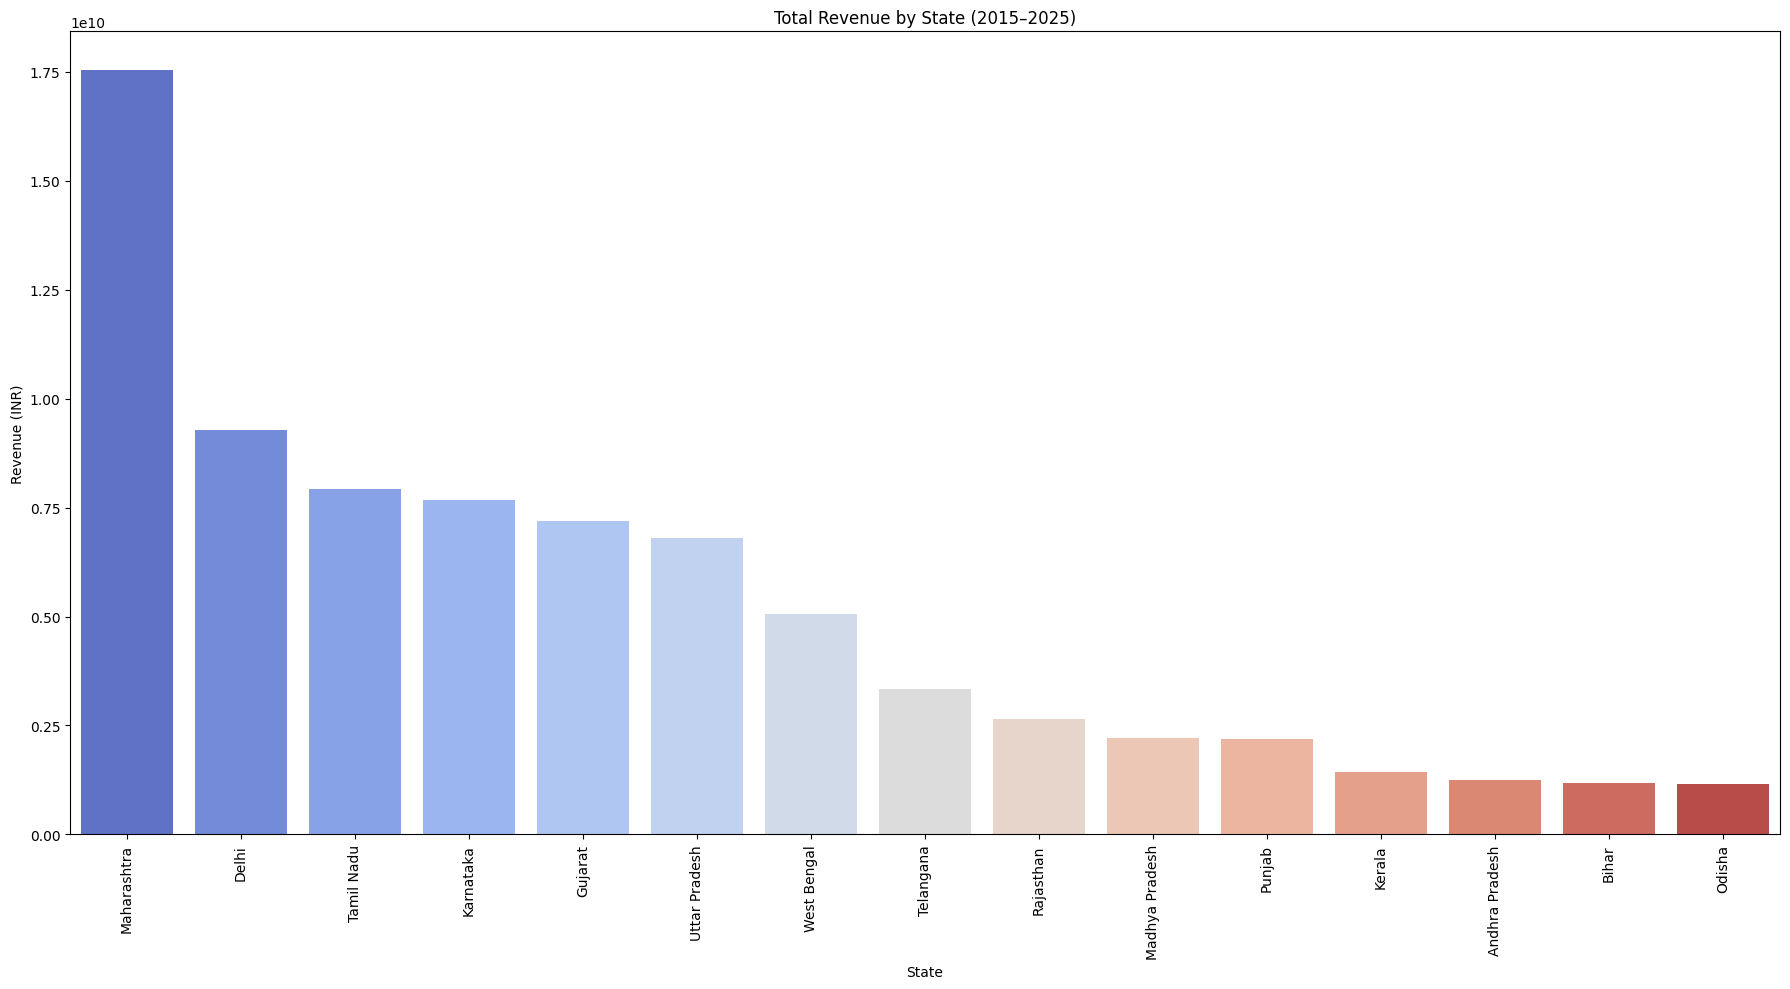

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1682063254.py:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




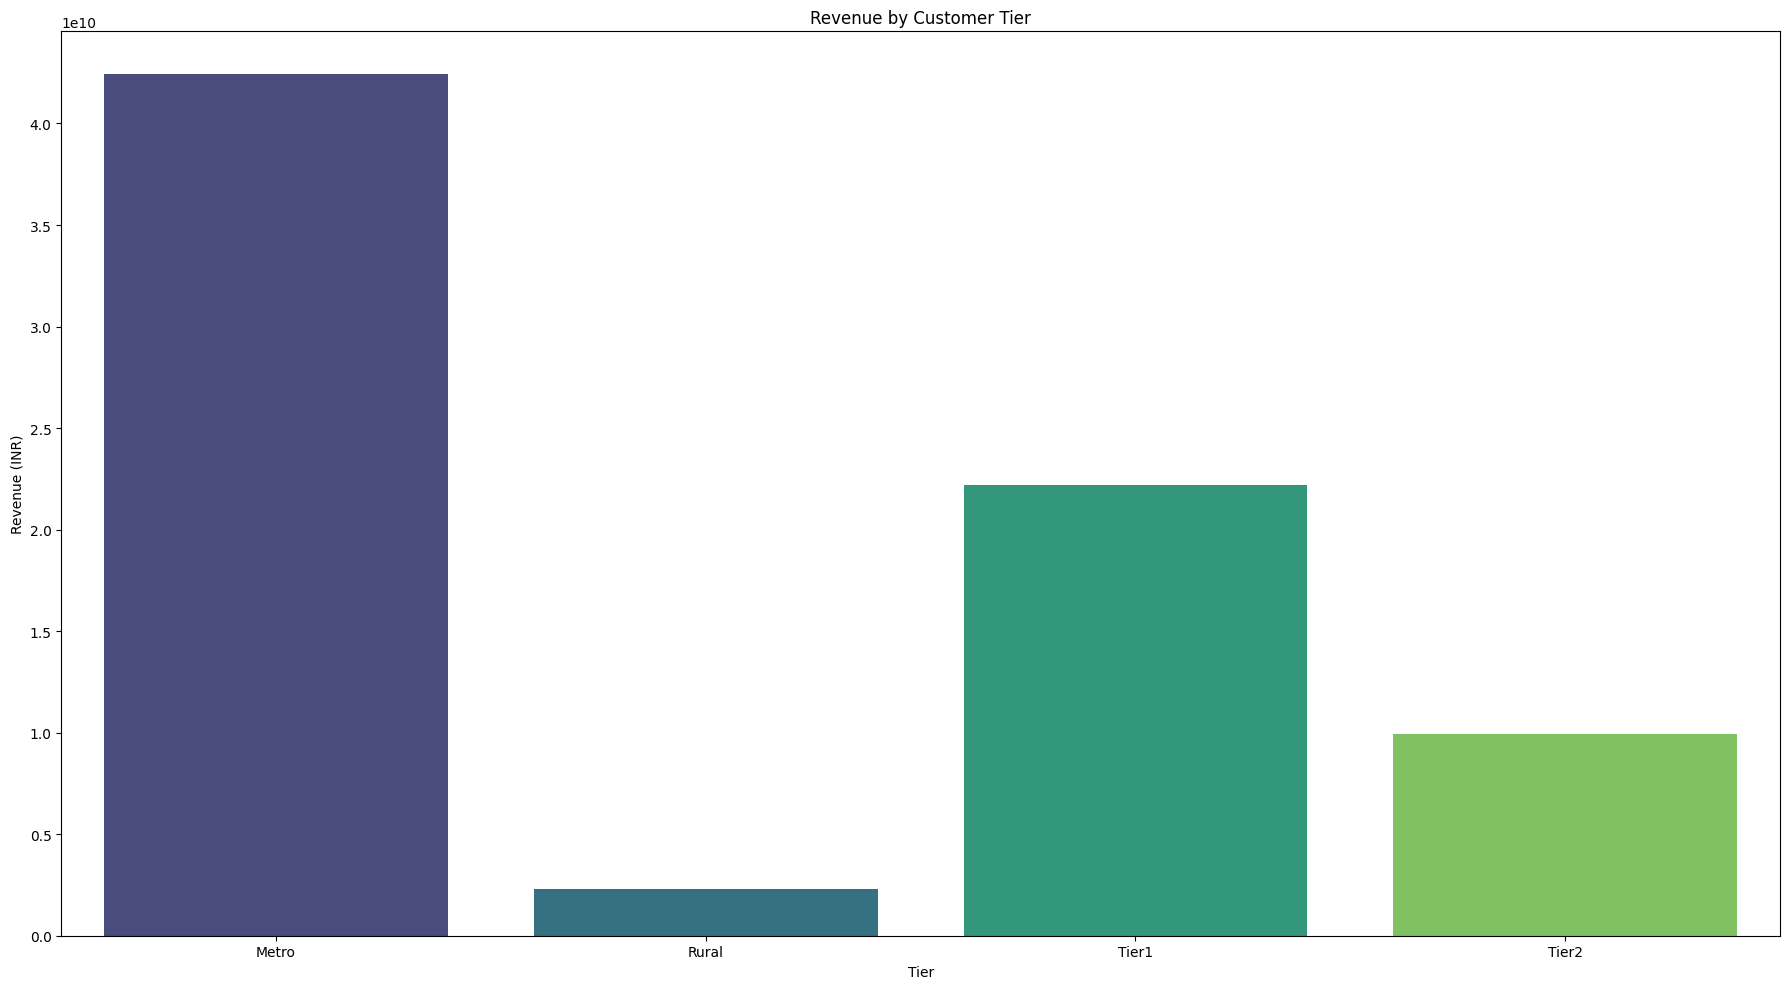

In [48]:
#Q7
import plotly.express as px

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Aggregate revenue by state and tier
geo_df = data.groupby(['customer_state', 'customer_tier', 'order_year'])['final_amount_inr'].sum().reset_index()
geo_df.rename(columns={'final_amount_inr': 'total_revenue_inr'}, inplace=True)

# Step 3: Bar chart of revenue by state
state_revenue = geo_df.groupby('customer_state')['total_revenue_inr'].sum().reset_index()
state_revenue = state_revenue.sort_values(by='total_revenue_inr', ascending=False)

plt.figure(figsize=(18, 10))
sns.barplot(data=state_revenue, x='customer_state', y='total_revenue_inr', palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Total Revenue by State (2015–2025)")
plt.ylabel("Revenue (INR)")
plt.xlabel("State")
plt.tight_layout()
plt.show()

# Step 4: Bar chart of revenue by tier
tier_revenue = geo_df.groupby('customer_tier')['total_revenue_inr'].sum().reset_index()

plt.figure(figsize=(18, 10))
sns.barplot(data=tier_revenue, x='customer_tier', y='total_revenue_inr', palette='viridis')
plt.title("Revenue by Customer Tier")
plt.ylabel("Revenue (INR)")
plt.xlabel("Tier")
plt.tight_layout()
plt.show()

# Step 5: Line chart of growth by tier
growth_df = geo_df.groupby(['order_year', 'customer_tier'])['total_revenue_inr'].sum().reset_index()

fig = px.line(growth_df, x='order_year', y='total_revenue_inr', color='customer_tier',
              title='Revenue Growth by Tier (2015–2025)', markers=True)
fig.show()



C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1155744214.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



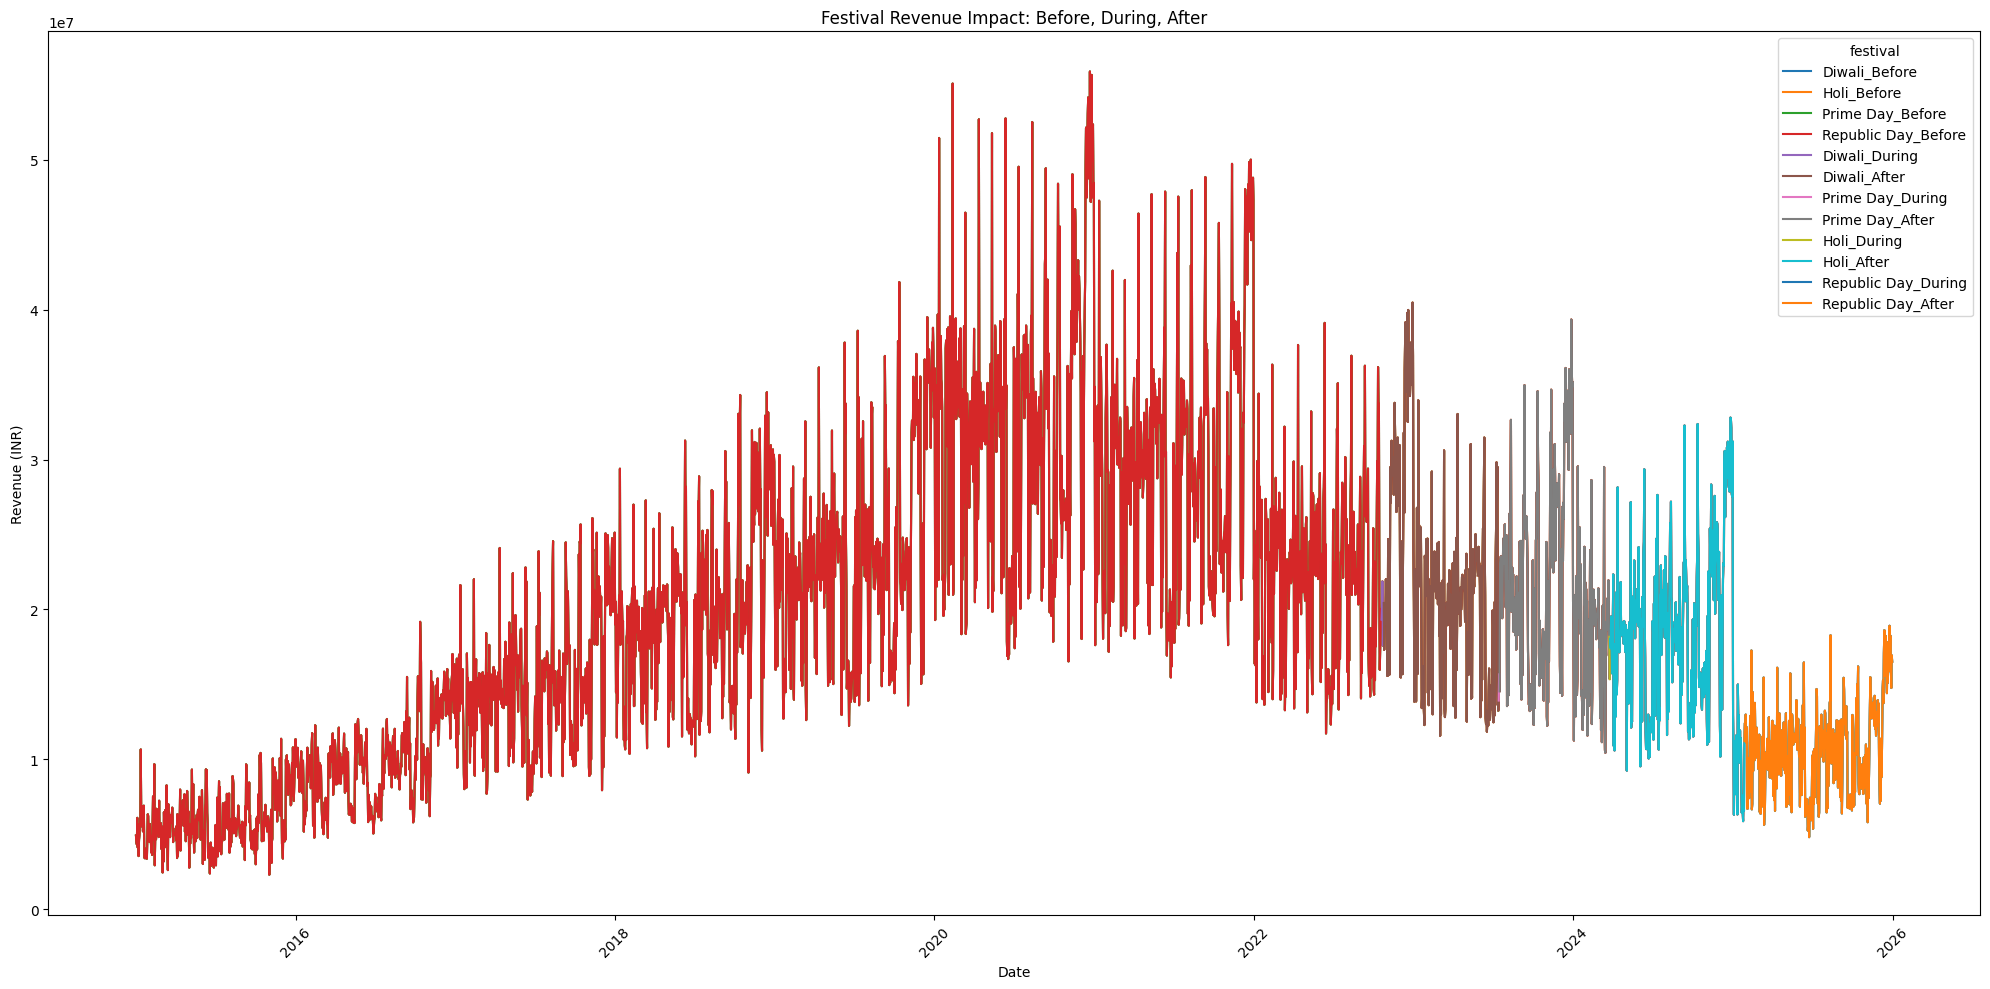

In [52]:
#Q8

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and prepare time series
data['order_date'] = pd.to_datetime(data['order_date'])
data['order_day'] = data['order_date'].dt.date
daily_revenue = data.groupby('order_day')['final_amount_inr'].sum().reset_index()

# Step 3: Define festival windows (customize as needed)
festival_windows = {
    "Diwali": ["2022-10-20", "2022-10-24"],
    "Prime Day": ["2023-07-15", "2023-07-16"],
    "Holi": ["2024-03-24", "2024-03-25"],
    "Republic Day": ["2025-01-26", "2025-01-26"]
}

# Step 4: Create before/during/after segments
def tag_festival_period(row, festival_name, start, end):
    date = pd.to_datetime(row['order_day'])
    start = pd.to_datetime(start)
    end = pd.to_datetime(end)
    if date < start:
        return f"{festival_name}_Before"
    elif start <= date <= end:
        return f"{festival_name}_During"
    elif date > end:
        return f"{festival_name}_After"
    return "Other"

festival_tags = []
for fest, (start, end) in festival_windows.items():
    temp = daily_revenue.copy()
    temp['festival'] = temp.apply(lambda row: tag_festival_period(row, fest, start, end), axis=1)
    festival_tags.append(temp)

festival_df = pd.concat(festival_tags)
festival_df = festival_df.groupby(['order_day', 'festival'])['final_amount_inr'].sum().reset_index()

# Step 5: Plot revenue spikes
plt.figure(figsize=(20, 10))
sns.lineplot(data=festival_df, x='order_day', y='final_amount_inr', hue='festival', palette='tab10')
plt.title("Festival Revenue Impact: Before, During, After")
plt.ylabel("Revenue (INR)")
plt.xlabel("Date")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2758938306.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



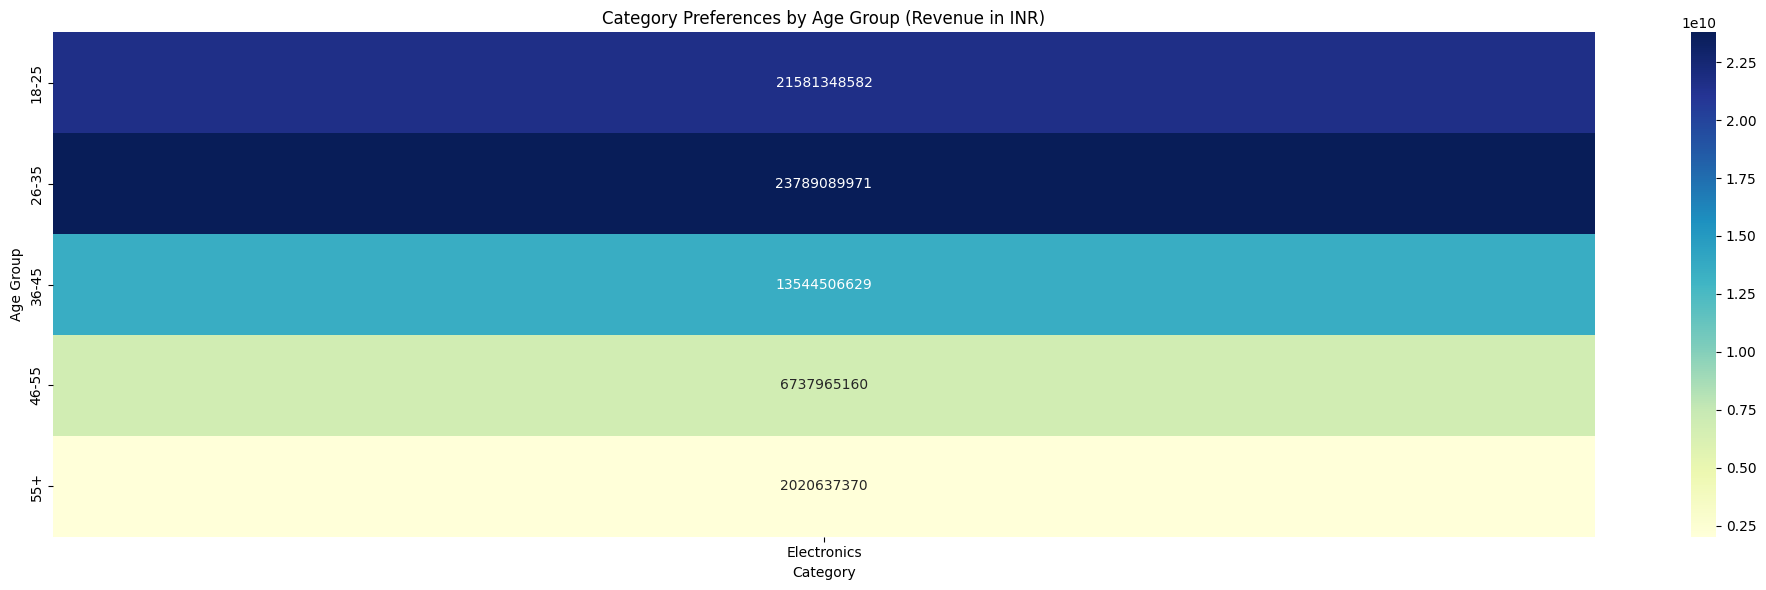

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2758938306.py:46: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




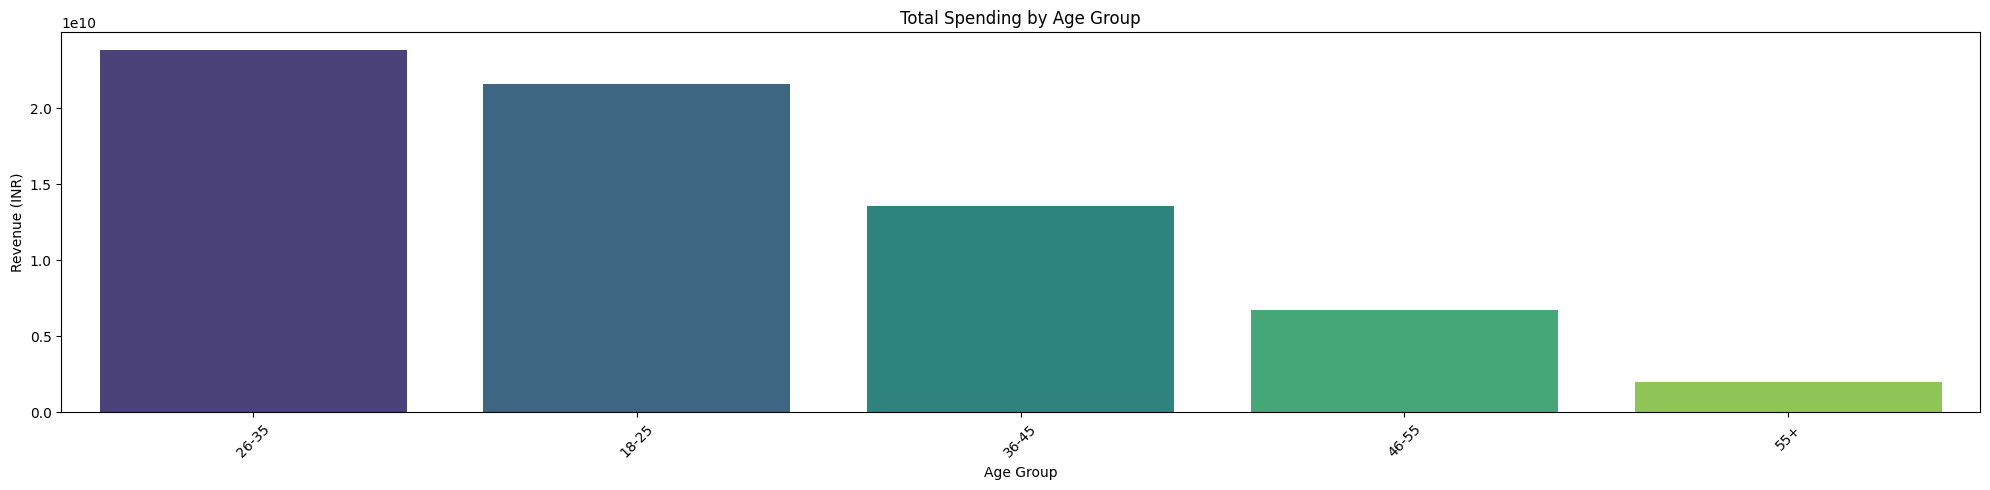

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2758938306.py:58: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




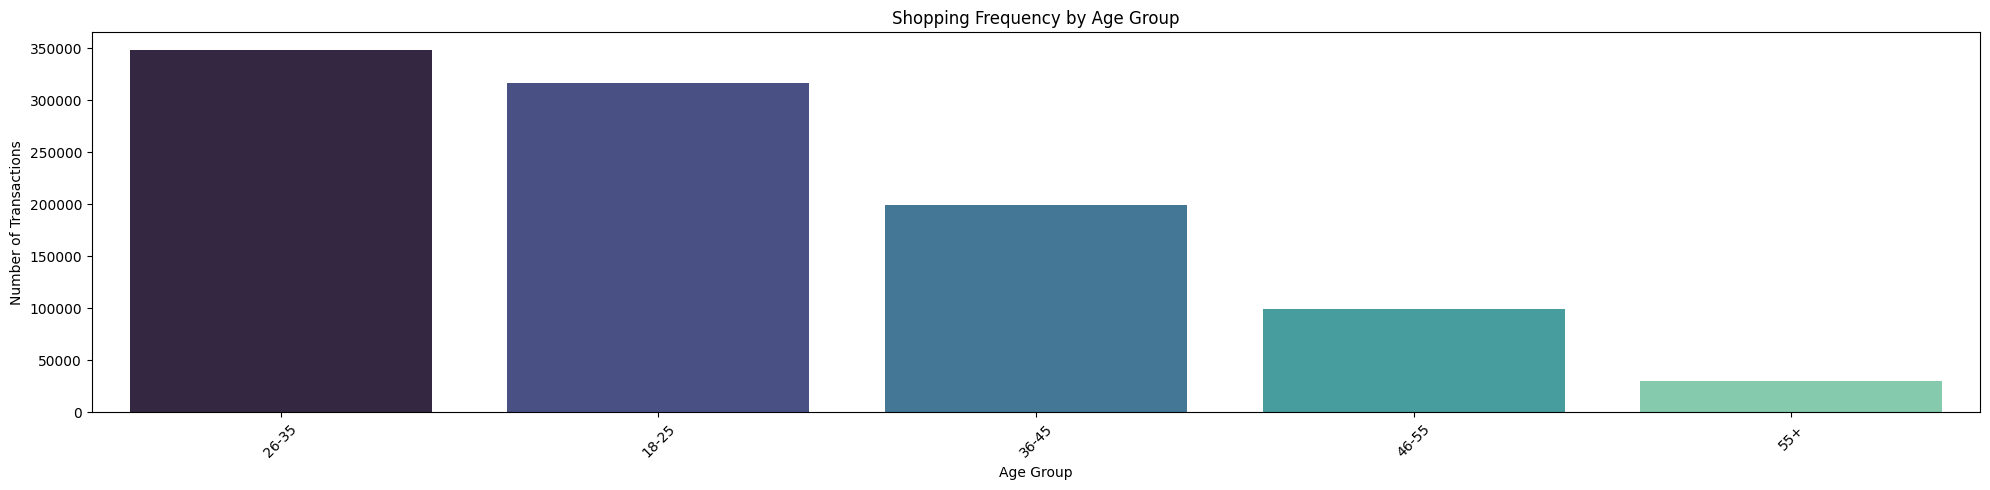

In [54]:
#Q9

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and prepare relevant columns
data['customer_age_group'] = data['customer_age_group'].str.strip().str.title()
data['category'] = data['category'].str.strip().str.title()

# Step 3: Analyze category preferences by age group
category_pref = data.groupby(['customer_age_group', 'category'])['final_amount_inr'].sum().reset_index()
category_pivot = category_pref.pivot(index='customer_age_group', columns='category', values='final_amount_inr').fillna(0)

plt.figure(figsize=(20, 6))
sns.heatmap(category_pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title("Category Preferences by Age Group (Revenue in INR)")
plt.ylabel("Age Group")
plt.xlabel("Category")
plt.tight_layout()
plt.show()

# Step 4: Analyze spending patterns by age group
spending = data.groupby('customer_age_group')['final_amount_inr'].sum().reset_index().sort_values(by='final_amount_inr', ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=spending, x='customer_age_group', y='final_amount_inr', palette='viridis')
plt.title("Total Spending by Age Group")
plt.ylabel("Revenue (INR)")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Analyze shopping frequency by age group
frequency = data.groupby('customer_age_group')['transaction_id'].count().reset_index().sort_values(by='transaction_id', ascending=False)

plt.figure(figsize=(20, 5))
sns.barplot(data=frequency, x='customer_age_group', y='transaction_id', palette='mako')
plt.title("Shopping Frequency by Age Group")
plt.ylabel("Number of Transactions")
plt.xlabel("Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2613964655.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



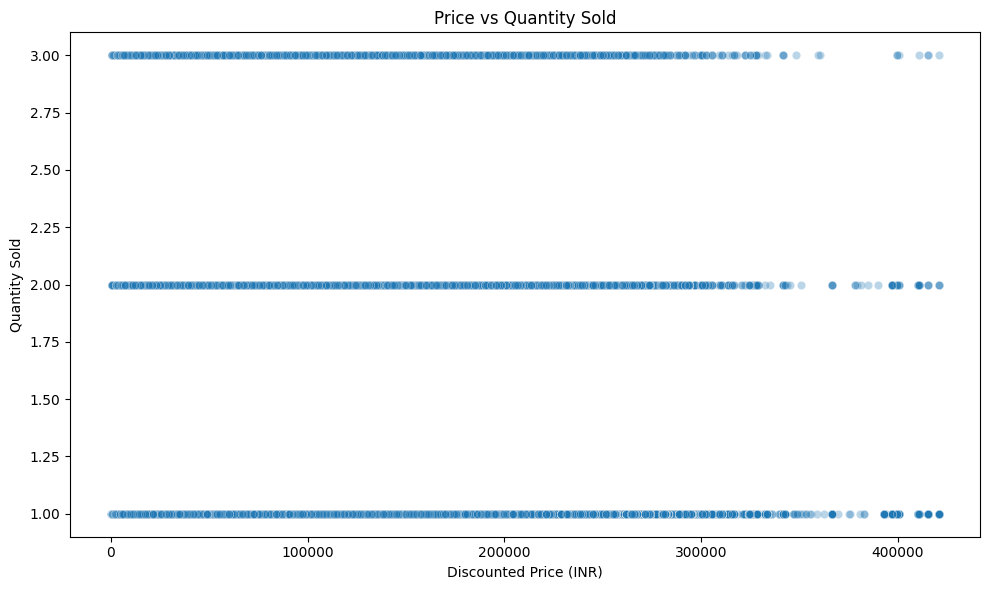

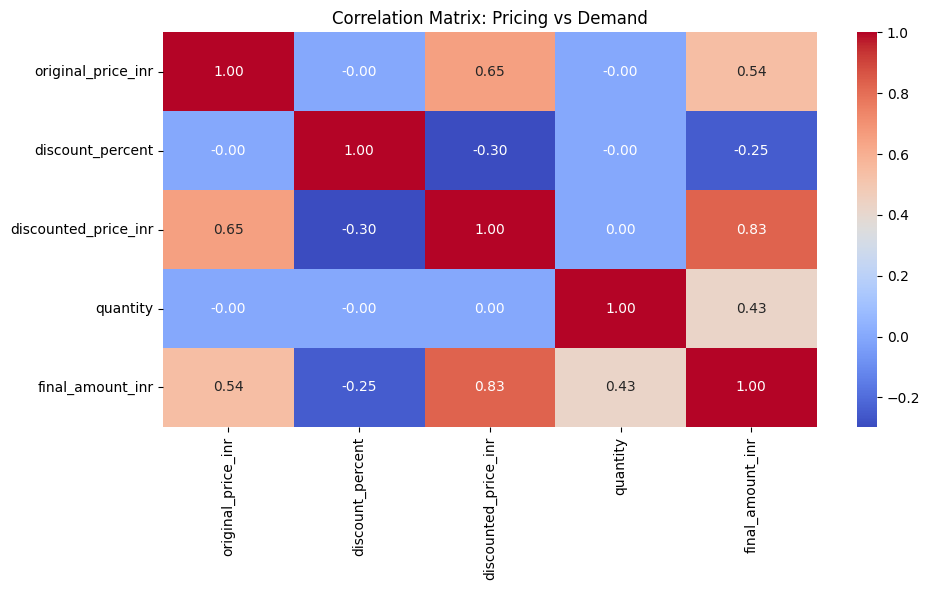

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2613964655.py:59: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



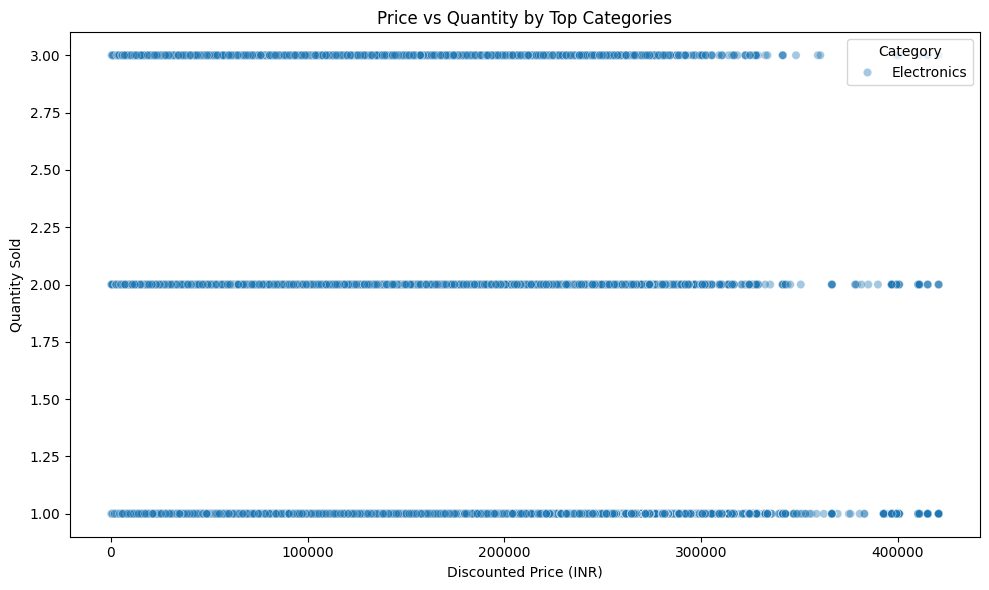

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2613964655.py:66: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




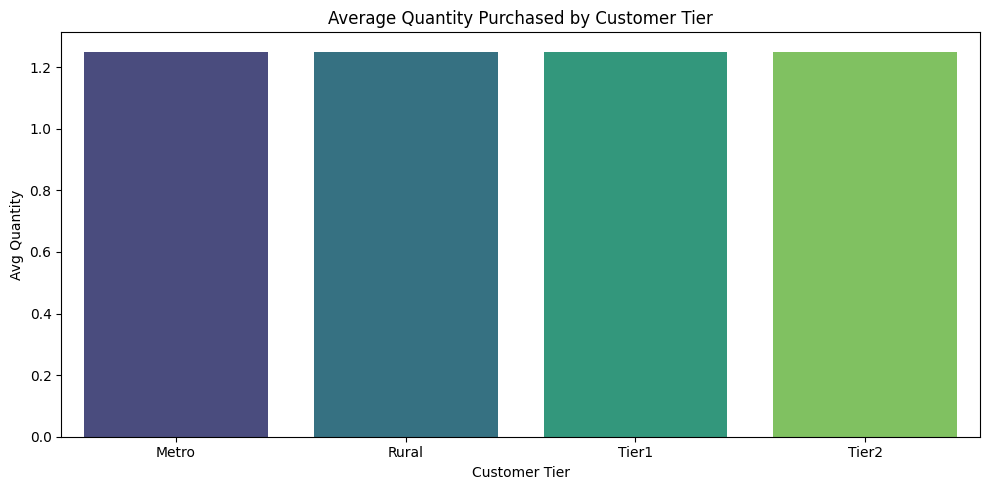

In [57]:
#Q 10

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and prepare relevant columns
data['category'] = data['category'].str.title().str.strip()
data['customer_tier'] = data['customer_tier'].str.title().str.strip()

# Step 3: Basic price vs demand scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='discounted_price_inr', y='quantity', alpha=0.3)
plt.title("Price vs Quantity Sold")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

# Step 4: Correlation matrix for pricing and demand
corr_df = data[['original_price_inr', 'discount_percent', 'discounted_price_inr', 'quantity', 'final_amount_inr']]
corr_matrix = corr_df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix: Pricing vs Demand")
plt.tight_layout()
plt.show()

# Step 5: Category-wise price vs demand scatter
top_categories = data['category'].value_counts().nlargest(5).index.tolist()
cat_data = data[data['category'].isin(top_categories)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cat_data, x='discounted_price_inr', y='quantity', hue='category', alpha=0.4)
plt.title("Price vs Quantity by Top Categories")
plt.xlabel("Discounted Price (INR)")
plt.ylabel("Quantity Sold")
plt.legend(title="Category")
plt.tight_layout()
plt.show()

# Step 6: Customer tier segmentation
tier_data = data.groupby(['customer_tier'])[['discounted_price_inr', 'quantity']].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=tier_data, x='customer_tier', y='quantity', palette='viridis')
plt.title("Average Quantity Purchased by Customer Tier")
plt.ylabel("Avg Quantity")
plt.xlabel("Customer Tier")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2855004523.py:19: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



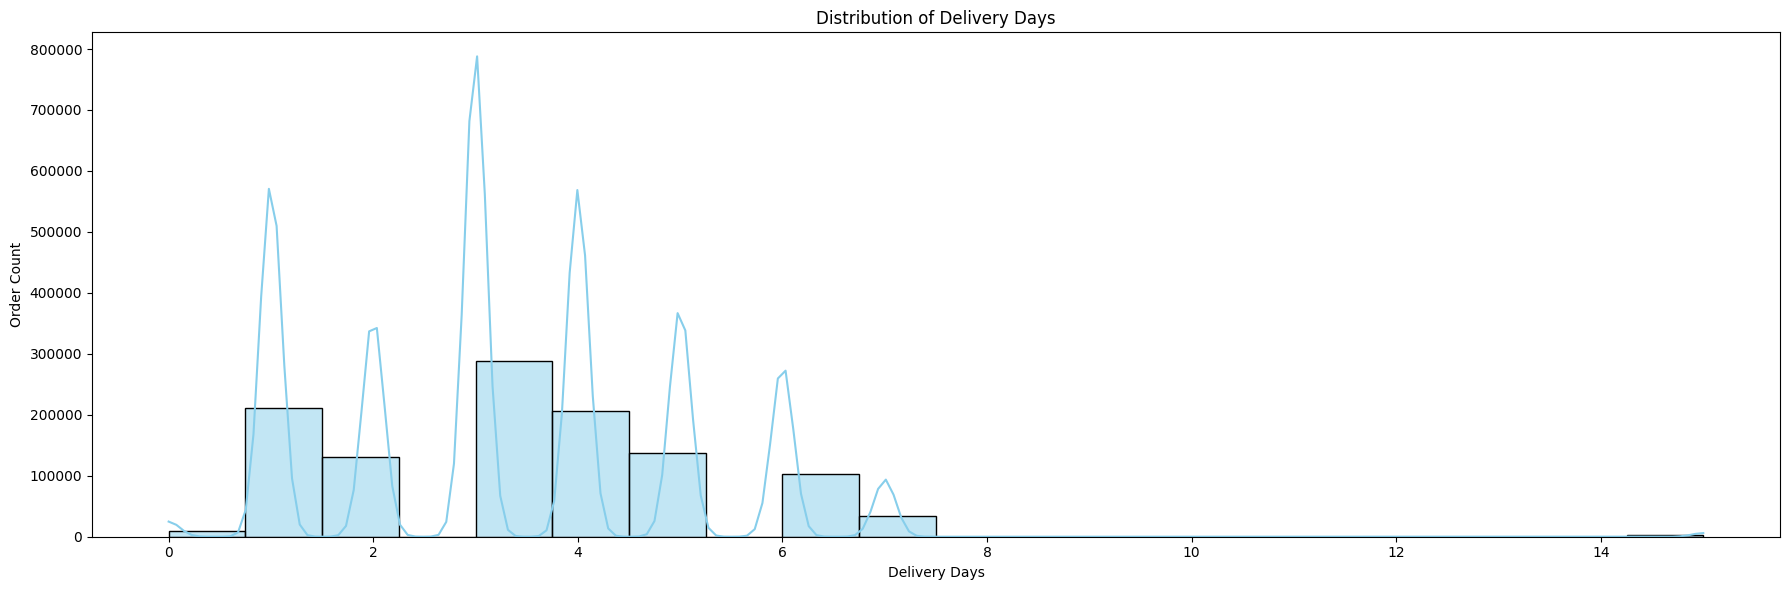

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2855004523.py:69: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




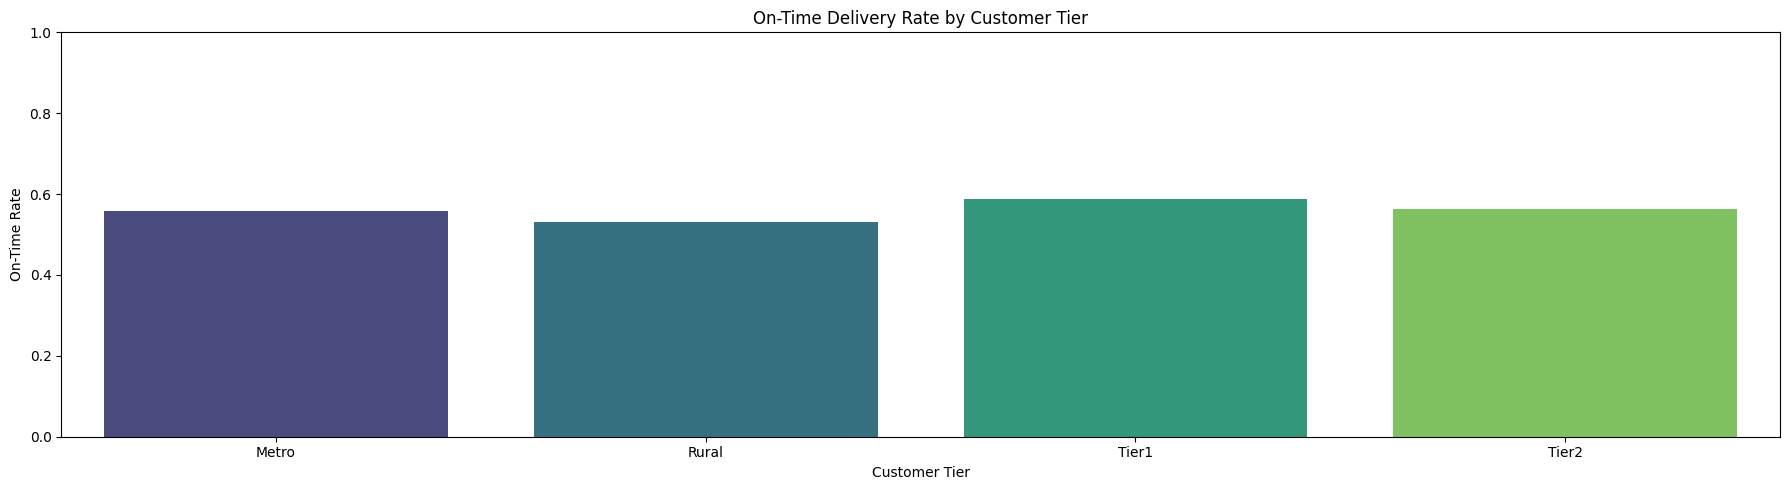

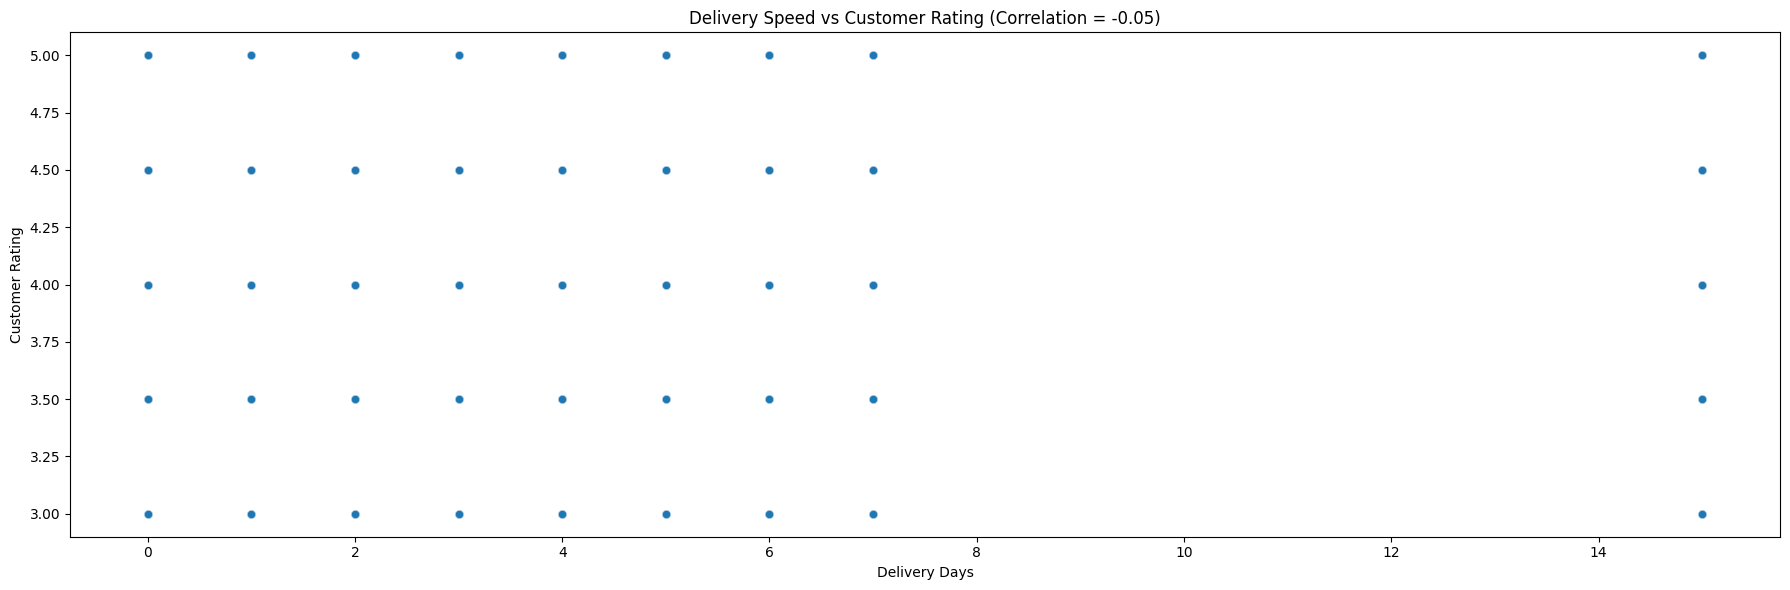

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\2855004523.py:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




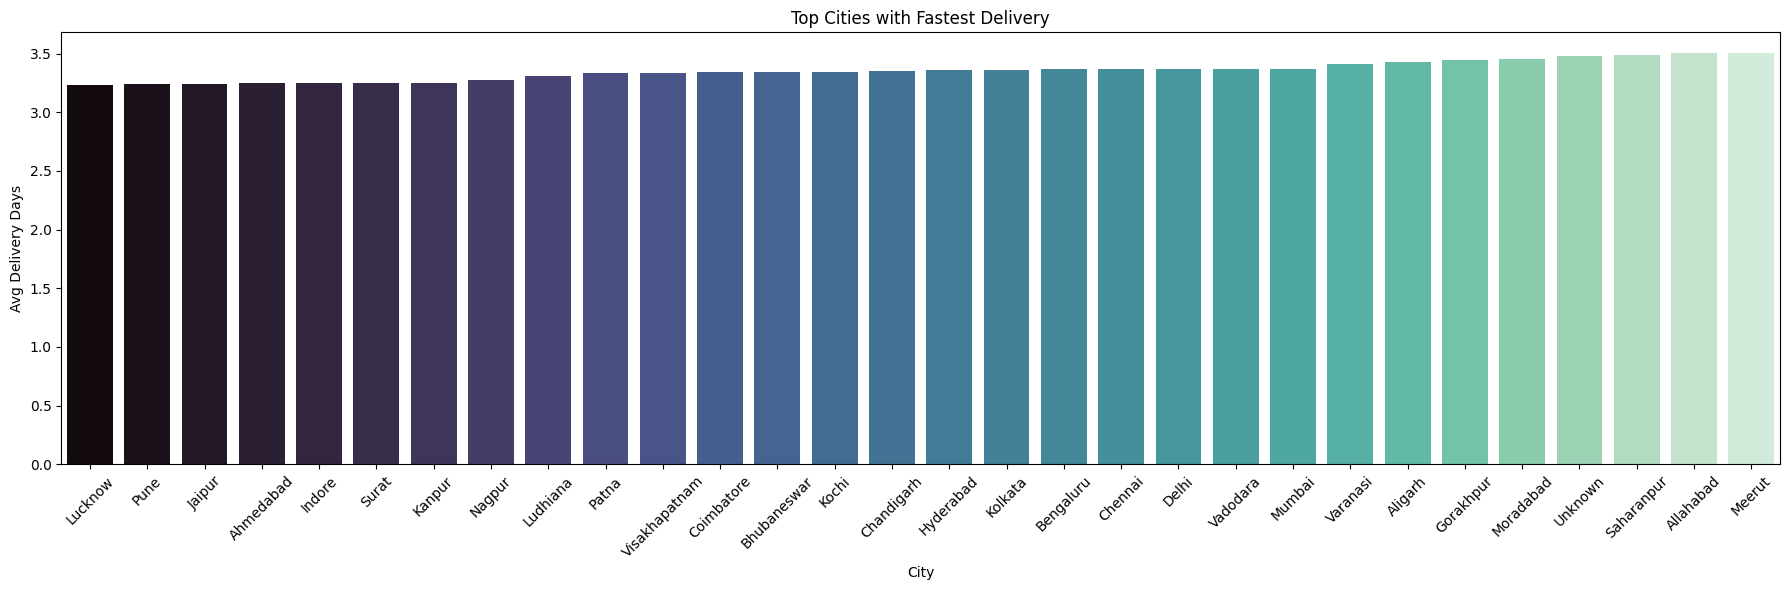

In [64]:
#Q 11
# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Define city normalization dictionary
city_map = {
    'ahmedabad': 'Ahmedabad', 'aligarh': 'Aligarh', 'allahabad': 'Allahabad',
    'bangalore': 'Bengaluru', 'banglore': 'Bengaluru', 'bengalore': 'Bengaluru', 'bengaluru': 'Bengaluru',
    'bhubaneswar': 'Bhubaneswar', 'bombay': 'Mumbai', 'calcutta': 'Kolkata', 'chandigarh': 'Chandigarh',
    'chenai': 'Chennai', 'chennai': 'Chennai', 'coimbatore': 'Coimbatore', 'customer_city': 'Unknown',
    'delhi': 'Delhi', 'delhi ncr': 'Delhi', 'new delhi': 'Delhi', 'gorakhpur': 'Gorakhpur',
    'hyderabad': 'Hyderabad', 'indore': 'Indore', 'jaipur': 'Jaipur', 'kanpur': 'Kanpur',
    'kochi': 'Kochi', 'kolkata': 'Kolkata', 'lucknow': 'Lucknow', 'ludhiana': 'Ludhiana',
    'madras': 'Chennai', 'meerut': 'Meerut', 'moradabad': 'Moradabad', 'mumba': 'Mumbai',
    'mumbai': 'Mumbai', 'nagpur': 'Nagpur', 'patna': 'Patna', 'pune': 'Pune',
    'saharanpur': 'Saharanpur', 'surat': 'Surat', 'vadodara': 'Vadodara',
    'varanasi': 'Varanasi', 'visakhapatnam': 'Visakhapatnam'
}

# Step 3: Clean and normalize city names
data['customer_city'] = (
    data['customer_city']
    .fillna('Unknown')
    .str.lower()
    .str.strip()
    .map(city_map)
    .fillna('Unknown')
)

# Step 4: Clean other relevant columns
data['customer_tier'] = data['customer_tier'].str.title().str.strip()
data['delivery_days'] = pd.to_numeric(data['delivery_days'], errors='coerce')
data['customer_rating'] = pd.to_numeric(data['customer_rating'], errors='coerce')

# Step 5: Delivery days distribution
plt.figure(figsize=(18, 6))
sns.histplot(data['delivery_days'].dropna(), bins=20, kde=True, color='skyblue')
plt.title("Distribution of Delivery Days")
plt.xlabel("Delivery Days")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

# Step 6: On-time delivery performance
data['on_time'] = data['delivery_days'] <= 3
on_time_stats = data.groupby('customer_tier')['on_time'].mean().reset_index()

plt.figure(figsize=(18, 5))
sns.barplot(data=on_time_stats, x='customer_tier', y='on_time', palette='viridis')
plt.title("On-Time Delivery Rate by Customer Tier")
plt.ylabel("On-Time Rate")
plt.xlabel("Customer Tier")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

# Step 7: Correlation between delivery speed and customer satisfaction
corr_df = data[['delivery_days', 'customer_rating']].dropna()
corr_value = corr_df.corr().iloc[0, 1]

plt.figure(figsize=(18, 6))
sns.scatterplot(data=corr_df, x='delivery_days', y='customer_rating', alpha=0.3)
plt.title(f"Delivery Speed vs Customer Rating (Correlation = {corr_value:.2f})")
plt.xlabel("Delivery Days")
plt.ylabel("Customer Rating")
plt.tight_layout()
plt.show()

# Step 8: City-wise delivery performance
city_perf = data.groupby('customer_city')[['delivery_days', 'customer_rating']].mean().reset_index()
top_cities = city_perf.sort_values(by='delivery_days').head(50)

plt.figure(figsize=(18, 6))
sns.barplot(data=top_cities, x='customer_city', y='delivery_days', palette='mako')
plt.title("Top Cities with Fastest Delivery")
plt.ylabel("Avg Delivery Days")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1090859831.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1090859831.py:37: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




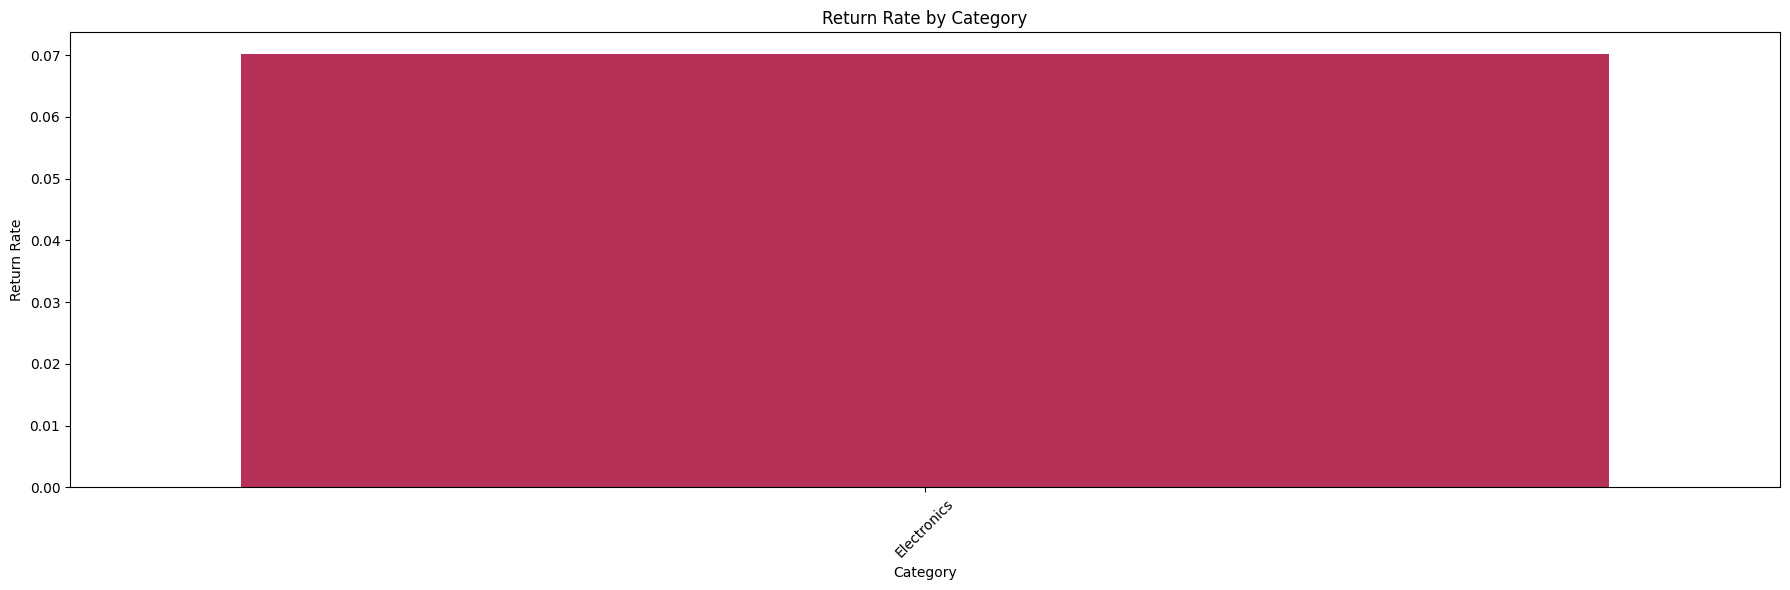

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1090859831.py:59: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



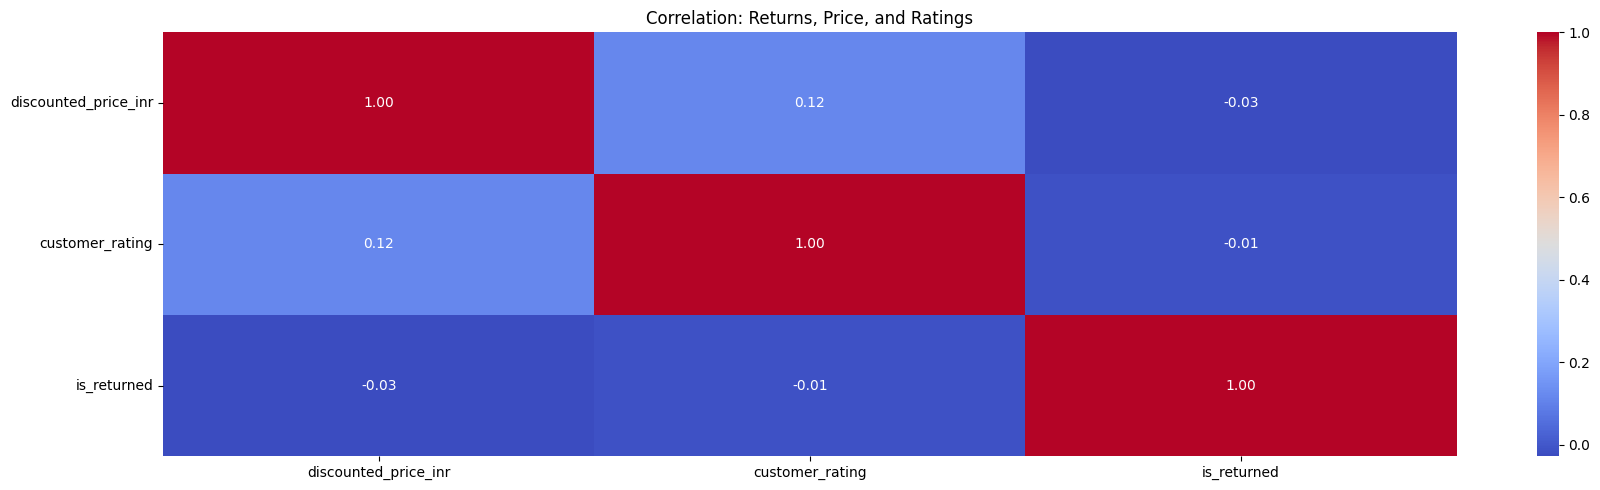

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1090859831.py:74: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.

C:\Users\Akshiya George\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



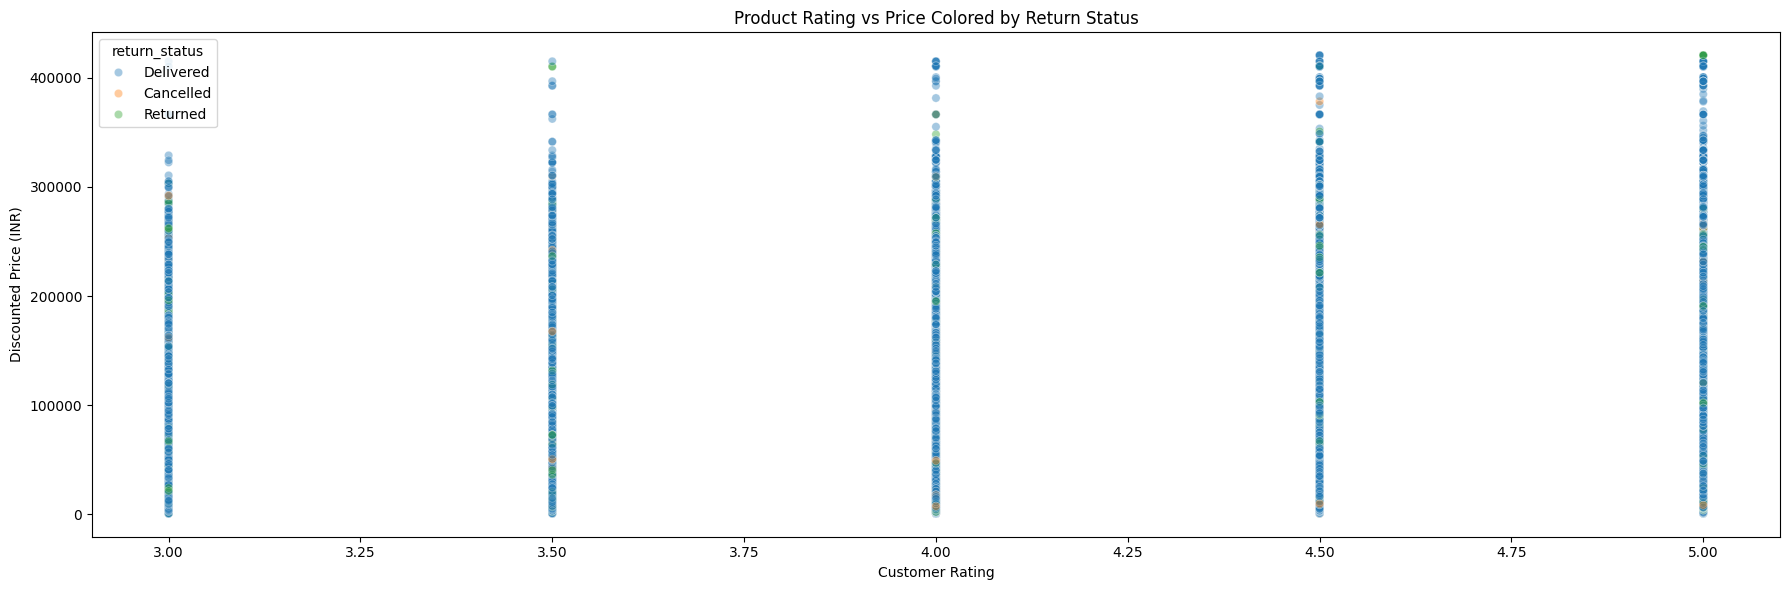

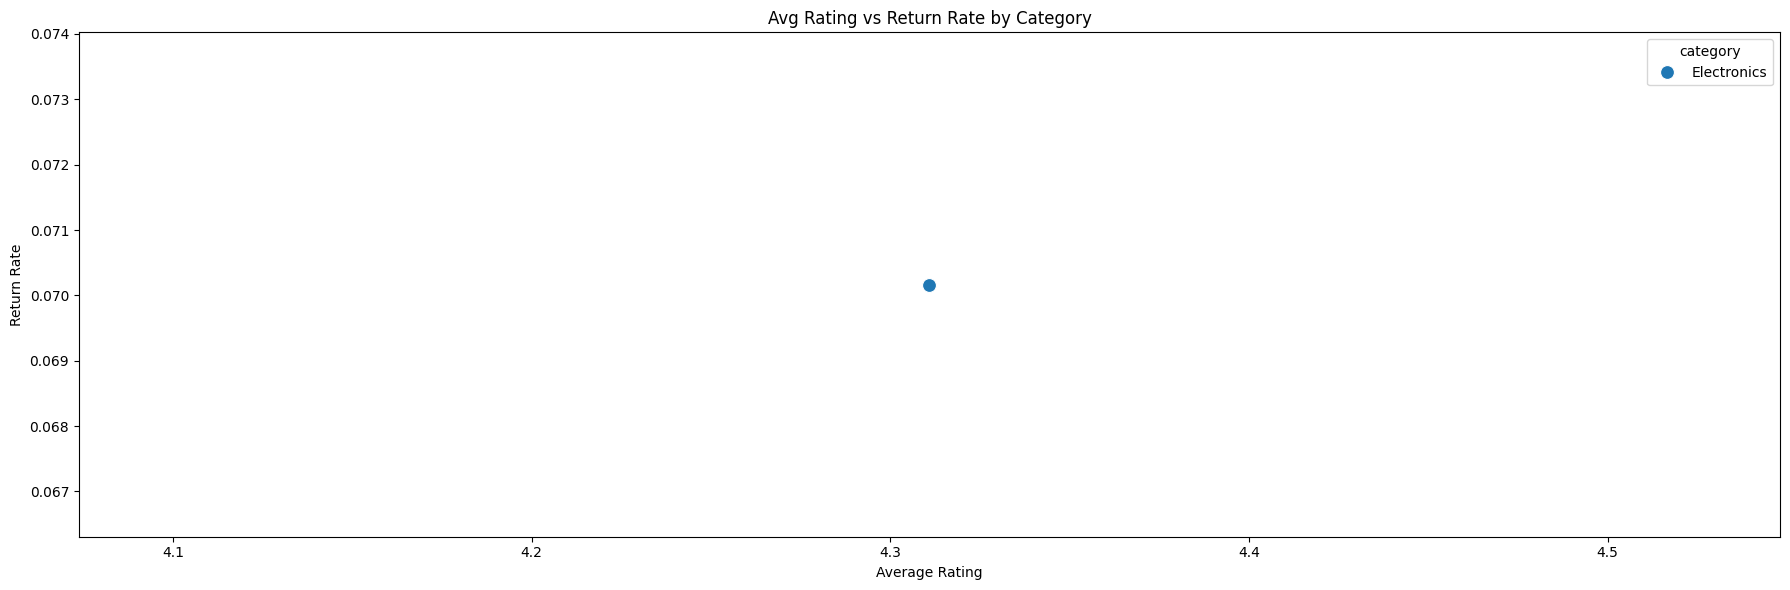

In [66]:
#Q 12

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['category'] = data['category'].str.title().str.strip()
data['return_status'] = data['return_status'].str.strip().str.title()
data['customer_rating'] = pd.to_numeric(data['customer_rating'], errors='coerce')
data['discounted_price_inr'] = pd.to_numeric(data['discounted_price_inr'], errors='coerce')

# Step 3: Return rate by category
return_rate = data.groupby('category')['return_status'].apply(lambda x: (x == 'Returned').mean()).reset_index()
return_rate.rename(columns={'return_status': 'return_rate'}, inplace=True)

plt.figure(figsize=(18, 6))
sns.barplot(data=return_rate.sort_values(by='return_rate', ascending=False), x='category', y='return_rate', palette='rocket')
plt.title("Return Rate by Category")
plt.ylabel("Return Rate")
plt.xlabel("Category")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 4: Return reasons (if available)
if 'return_reason' in data.columns:
    reason_counts = data[data['return_status'] == 'Returned']['return_reason'].value_counts().reset_index()
    reason_counts.columns = ['Reason', 'Count']

    plt.figure(figsize=(18, 6))
    sns.barplot(data=reason_counts, x='Reason', y='Count', palette='mako')
    plt.title("Top Return Reasons")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Step 5: Correlation with ratings and price
corr_df = data[['discounted_price_inr', 'customer_rating']]
corr_df['is_returned'] = data['return_status'] == 'Returned'
corr_matrix = corr_df.corr()

plt.figure(figsize=(18, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Returns, Price, and Ratings")
plt.tight_layout()
plt.show()

# Step 6: Scatter plot of rating vs return
plt.figure(figsize=(18, 6))
sns.scatterplot(data=data, x='customer_rating', y='discounted_price_inr', hue='return_status', alpha=0.4)
plt.title("Product Rating vs Price Colored by Return Status")
plt.xlabel("Customer Rating")
plt.ylabel("Discounted Price (INR)")
plt.tight_layout()
plt.show()

# Step 7: Category-wise return vs rating
cat_return_rating = data.groupby(['category'])[['customer_rating']].mean().join(
    data.groupby(['category'])['return_status'].apply(lambda x: (x == 'Returned').mean())
).reset_index()

plt.figure(figsize=(18, 6))
sns.scatterplot(data=cat_return_rating, x='customer_rating', y='return_status', hue='category', s=100)
plt.title("Avg Rating vs Return Rate by Category")
plt.xlabel("Average Rating")
plt.ylabel("Return Rate")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3391734151.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3391734151.py:43: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




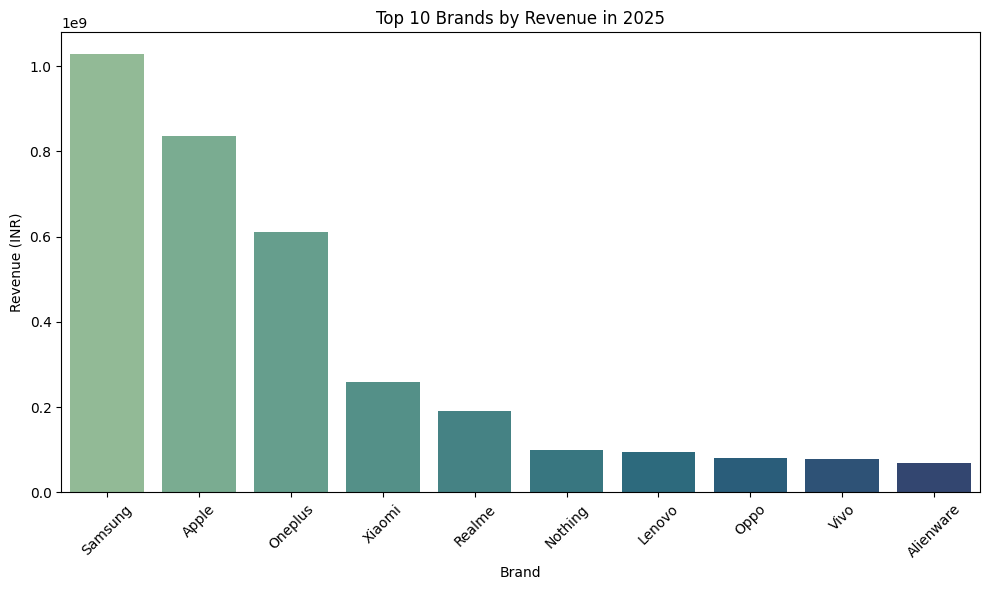

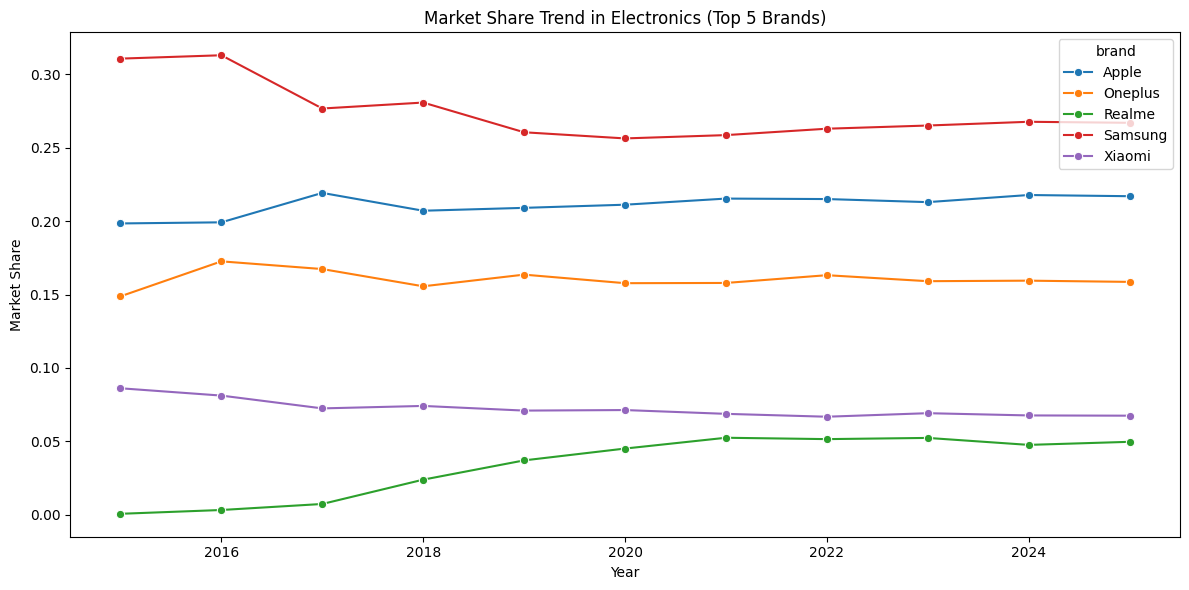

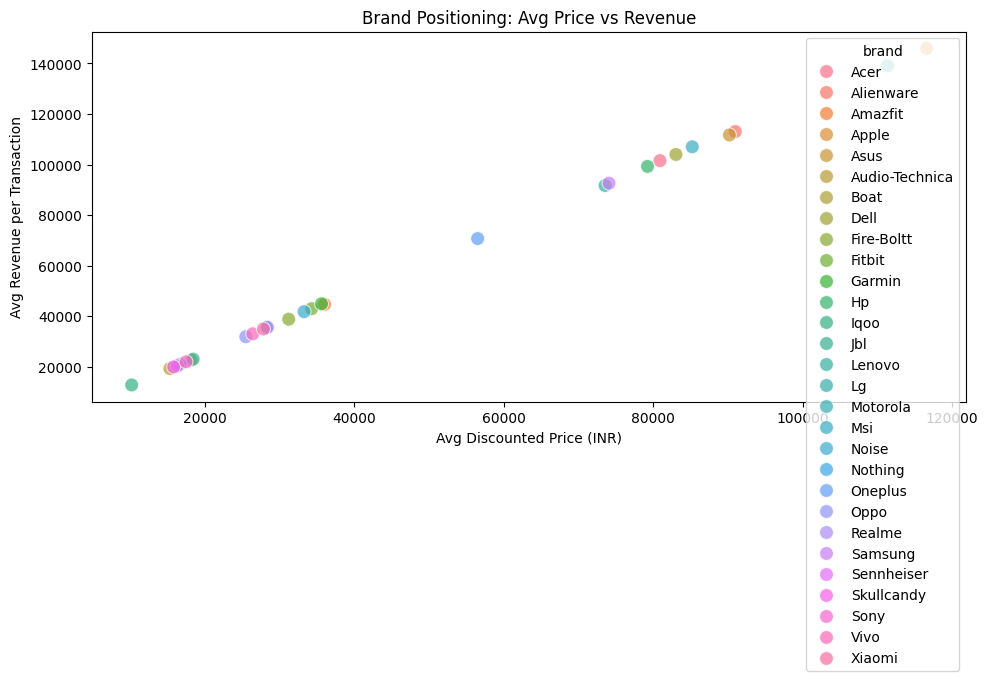

In [67]:
#Q 13

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['brand'] = data['brand'].str.title().str.strip()
data['category'] = data['category'].str.title().str.strip()
data['final_amount_inr'] = pd.to_numeric(data['final_amount_inr'], errors='coerce')

# Step 3: Brand revenue and market share by category
brand_revenue = data.groupby(['order_year', 'category', 'brand'])['final_amount_inr'].sum().reset_index()
total_category_revenue = brand_revenue.groupby(['order_year', 'category'])['final_amount_inr'].transform('sum')
brand_revenue['market_share'] = brand_revenue['final_amount_inr'] / total_category_revenue

# Step 4: Brand comparison chart (latest year)
latest_year = data['order_year'].max()
top_brands = brand_revenue[brand_revenue['order_year'] == latest_year]
top_brands = top_brands.groupby('brand')['final_amount_inr'].sum().reset_index()
top_brands = top_brands.sort_values(by='final_amount_inr', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_brands, x='brand', y='final_amount_inr', palette='crest')
plt.title(f"Top 10 Brands by Revenue in {latest_year}")
plt.ylabel("Revenue (INR)")
plt.xlabel("Brand")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 5: Market share trend over time for top brands in a category
selected_category = 'Electronics'  # Change as needed
category_brands = brand_revenue[brand_revenue['category'] == selected_category]
top_5 = category_brands.groupby('brand')['final_amount_inr'].sum().nlargest(5).index.tolist()
trend_data = category_brands[category_brands['brand'].isin(top_5)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=trend_data, x='order_year', y='market_share', hue='brand', marker='o')
plt.title(f"Market Share Trend in {selected_category} (Top 5 Brands)")
plt.ylabel("Market Share")
plt.xlabel("Year")
plt.tight_layout()
plt.show()

# Step 6: Competitive positioning (avg price vs revenue)
positioning = data.groupby('brand')[['discounted_price_inr', 'final_amount_inr']].mean().reset_index()
positioning = positioning[positioning['final_amount_inr'] > 0]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=positioning, x='discounted_price_inr', y='final_amount_inr', hue='brand', s=100, alpha=0.7)
plt.title("Brand Positioning: Avg Price vs Revenue")
plt.xlabel("Avg Discounted Price (INR)")
plt.ylabel("Avg Revenue per Transaction")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1403876030.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



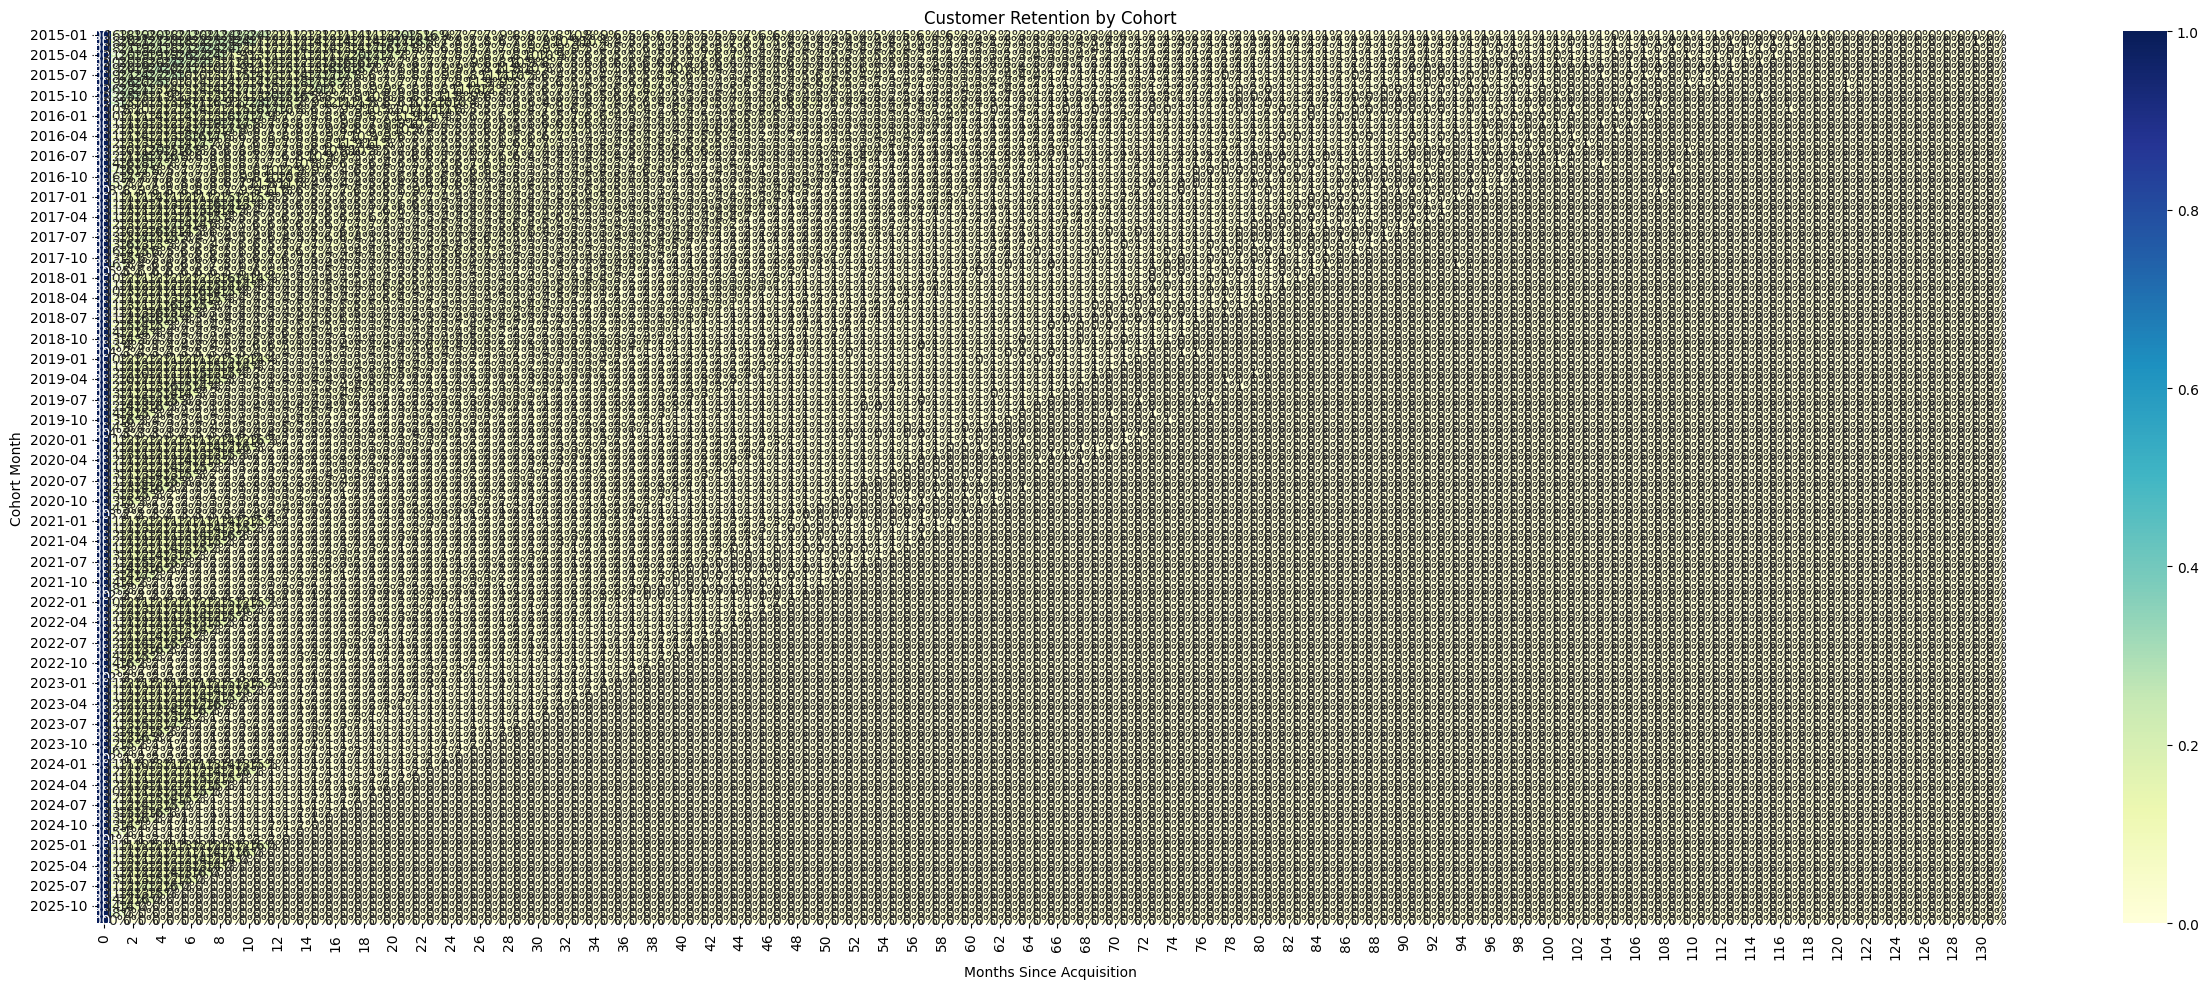

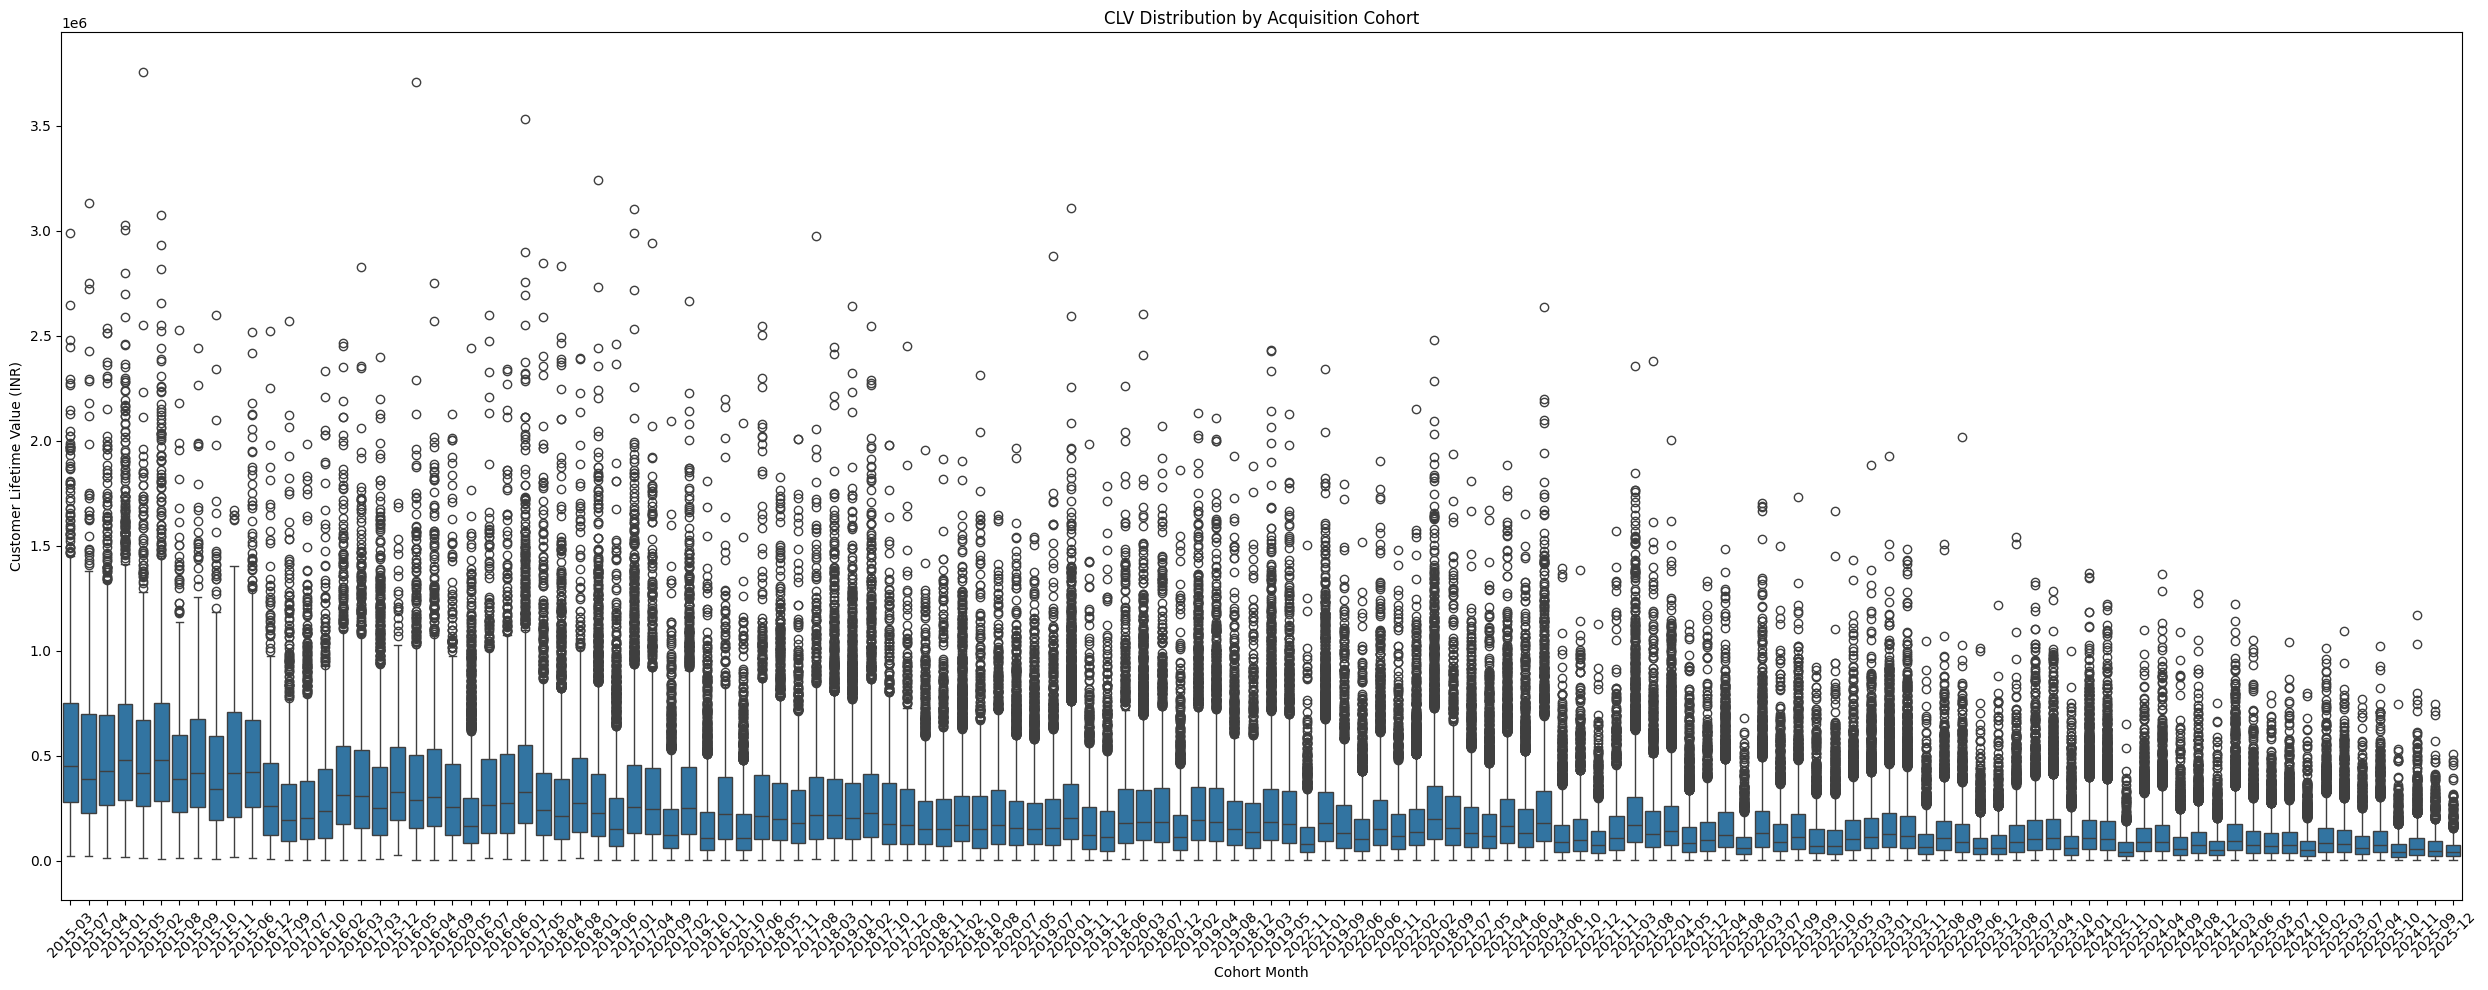

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1403876030.py:70: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




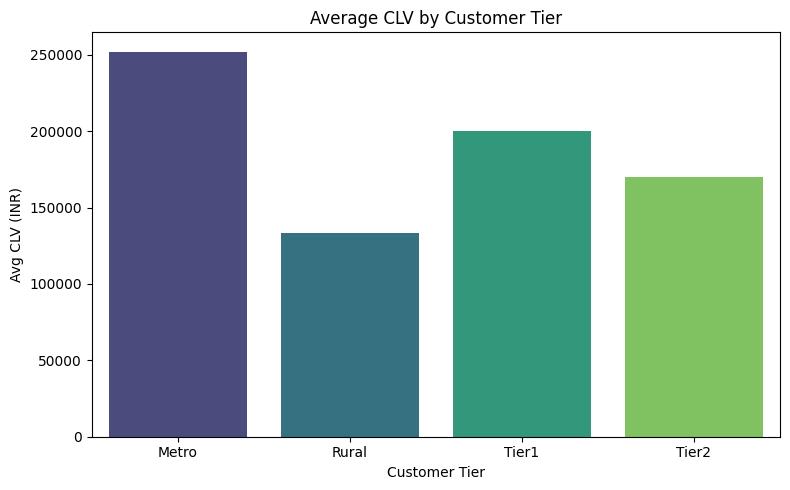

In [80]:
#Q 14

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['customer_id'] = data['customer_id'].astype(str)
data['customer_tier'] = data['customer_tier'].str.title().str.strip()
data['order_month'] = data['order_date'].dt.to_period('M')
data['final_amount_inr'] = pd.to_numeric(data['final_amount_inr'], errors='coerce')

# Step 3: Assign acquisition cohort
first_purchase = data.groupby('customer_id')['order_date'].min().dt.to_period('M')
data['cohort_month'] = data['customer_id'].map(first_purchase)

# Step 4: Calculate cohort index (months since acquisition)
data['cohort_index'] = (data['order_month'] - data['cohort_month']).apply(lambda x: x.n)

# Step 5: Retention matrix
retention = data.groupby(['cohort_month', 'cohort_index'])['customer_id'].nunique().unstack().fillna(0)
cohort_sizes = retention.iloc[:, 0]
retention_rate = retention.divide(cohort_sizes, axis=0)

plt.figure(figsize=(25, 10))
sns.heatmap(retention_rate, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Customer Retention by Cohort")
plt.xlabel("Months Since Acquisition")
plt.ylabel("Cohort Month")
plt.tight_layout()
plt.show()

# Step 6: CLV calculation
clv = data.groupby('customer_id')['final_amount_inr'].sum().reset_index()
clv = clv.merge(data[['customer_id', 'cohort_month', 'customer_tier']].drop_duplicates(), on='customer_id')

# Step 7: CLV distribution by acquisition cohort
plt.figure(figsize=(25, 10))
sns.boxplot(data=clv, x='cohort_month', y='final_amount_inr')
plt.title("CLV Distribution by Acquisition Cohort")
plt.ylabel("Customer Lifetime Value (INR)")
plt.xlabel("Cohort Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Step 8: CLV by customer tier
tier_clv = clv.groupby('customer_tier')['final_amount_inr'].mean().reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=tier_clv, x='customer_tier', y='final_amount_inr', palette='viridis')
plt.title("Average CLV by Customer Tier")
plt.ylabel("Avg CLV (INR)")
plt.xlabel("Customer Tier")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1916838058.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



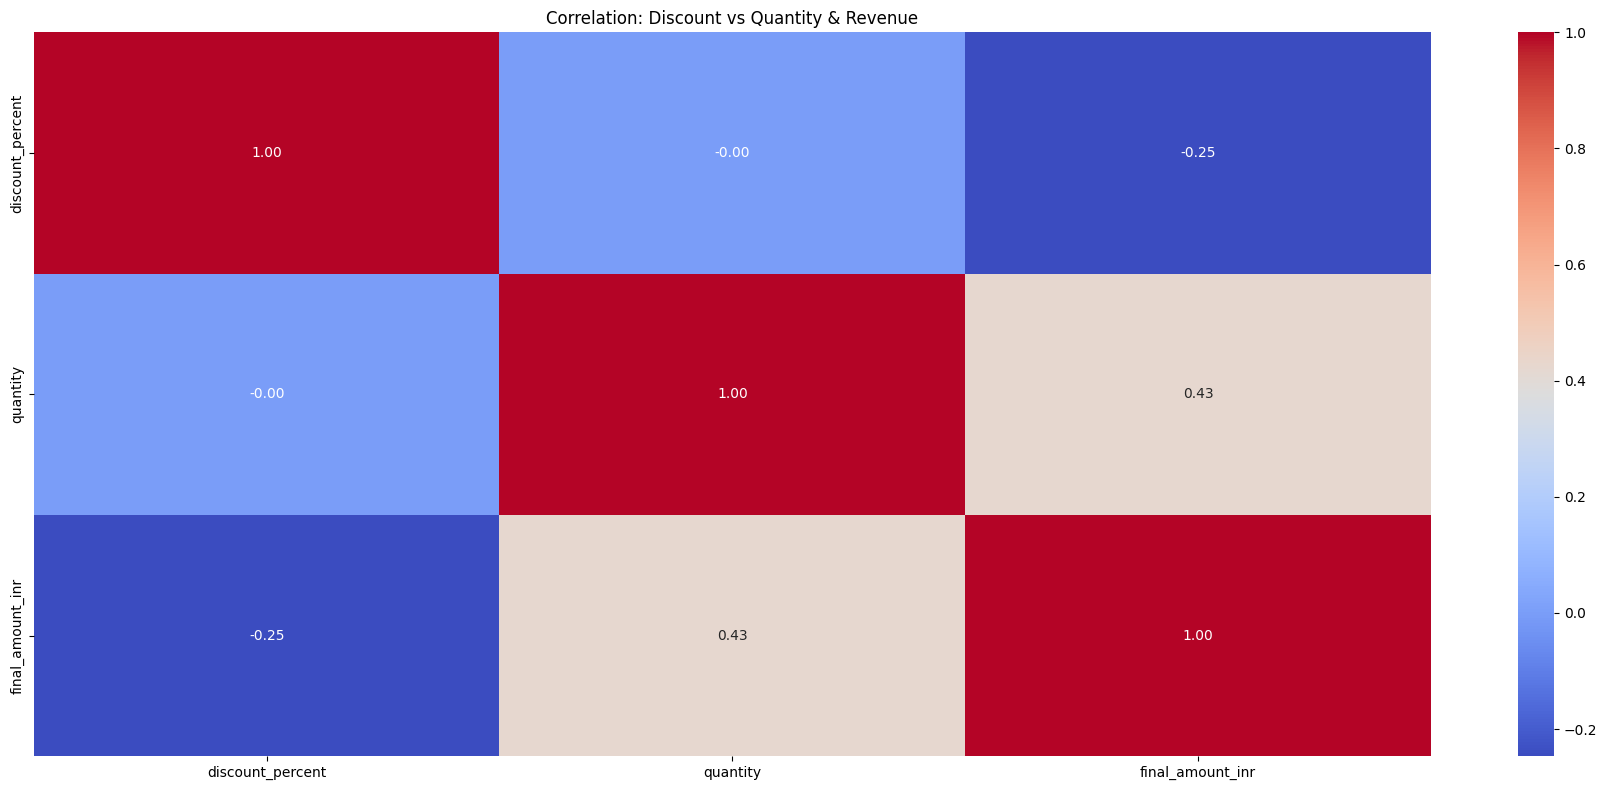

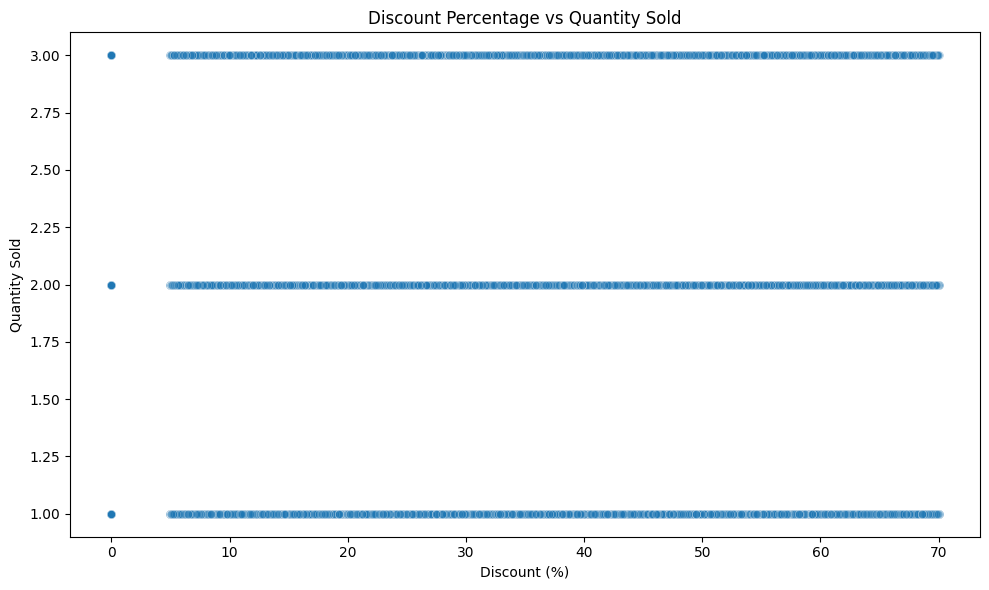

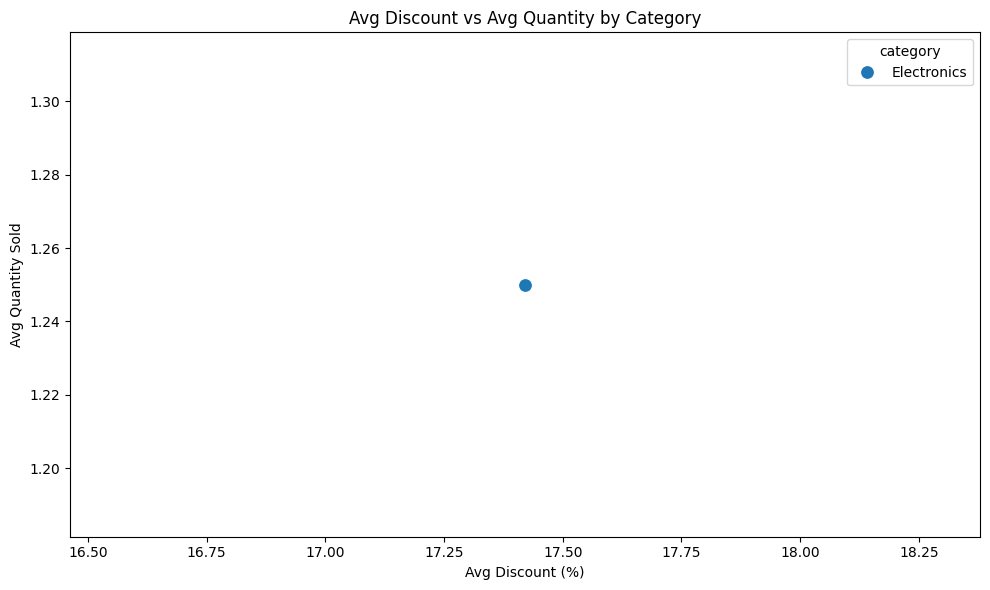

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1916838058.py:76: UserWarning:

'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>



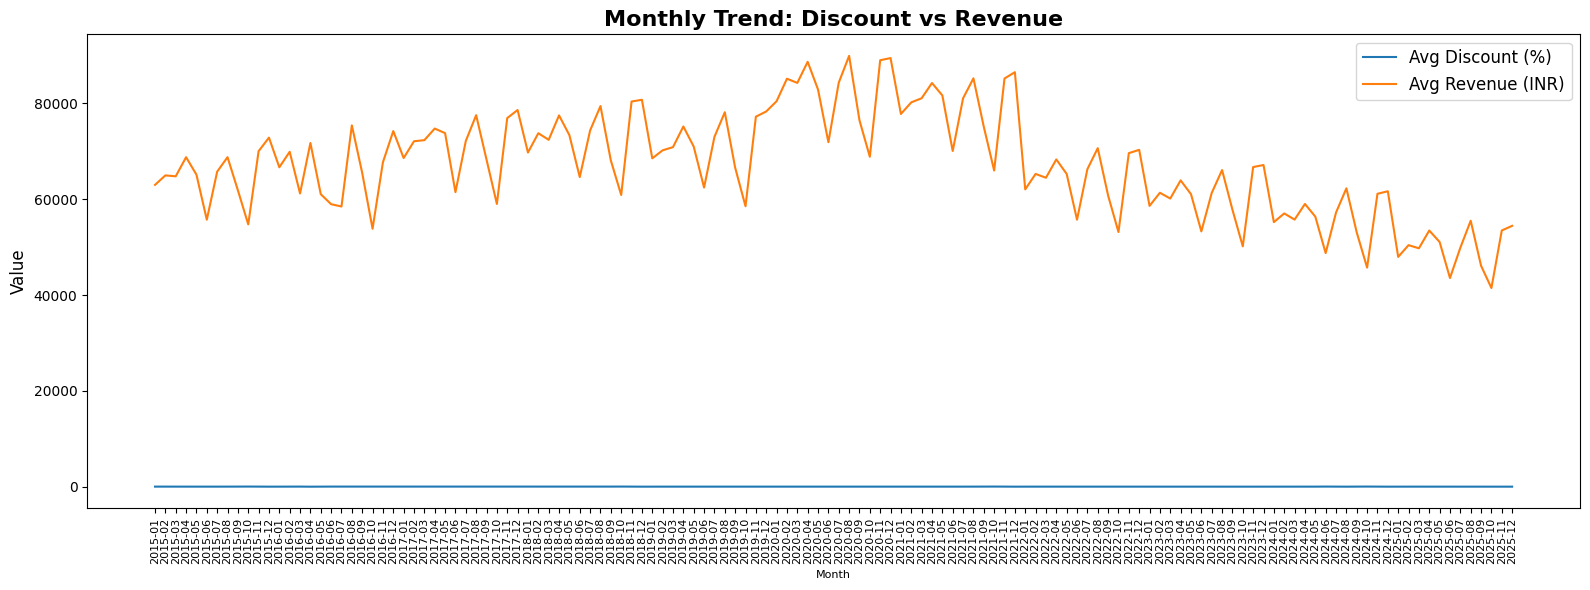

In [88]:
#Q 15

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and prepare relevant columns
data['category'] = data['category'].str.title().str.strip()
data['discount_percent'] = pd.to_numeric(data['discount_percent'], errors='coerce')
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['final_amount_inr'] = pd.to_numeric(data['final_amount_inr'], errors='coerce')
data['order_month'] = data['order_date'].dt.to_period('M')

# Step 3: Correlation matrix
corr_df = data[['discount_percent', 'quantity', 'final_amount_inr']].dropna()
corr_matrix = corr_df.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Discount vs Quantity & Revenue")
plt.tight_layout()
plt.show()

# Step 4: Scatter plot of discount vs quantity
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='discount_percent', y='quantity', alpha=0.3)
plt.title("Discount Percentage vs Quantity Sold")
plt.xlabel("Discount (%)")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

# Step 5: Category-wise discount impact
cat_impact = data.groupby('category')[['discount_percent', 'quantity', 'final_amount_inr']].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=cat_impact, x='discount_percent', y='quantity', hue='category', s=100)
plt.title("Avg Discount vs Avg Quantity by Category")
plt.xlabel("Avg Discount (%)")
plt.ylabel("Avg Quantity Sold")
plt.tight_layout()
plt.show()

# Step 6: Monthly trend of discount vs revenue
monthly_trend = data.groupby('order_month')[['discount_percent', 'final_amount_inr']].mean().reset_index()
monthly_trend['order_month'] = monthly_trend['order_month'].astype(str)

plt.figure(figsize=(16, 6))  
sns.lineplot(data=monthly_trend, x='order_month', y='discount_percent', label='Avg Discount (%)')
sns.lineplot(data=monthly_trend, x='order_month', y='final_amount_inr', label='Avg Revenue (INR)')
plt.title("Monthly Trend: Discount vs Revenue", fontsize=16, fontweight='bold')
plt.xlabel("Month", fontsize=8)
plt.ylabel("Value", fontsize=12)

# Rotate and format x-axis ticks
plt.xticks(rotation=90, fontsize=8)  # Rotate fully vertical
plt.locator_params(axis='x', nbins=30)  # Limit number of ticks shown

# Add legend and layout
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1505461547.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



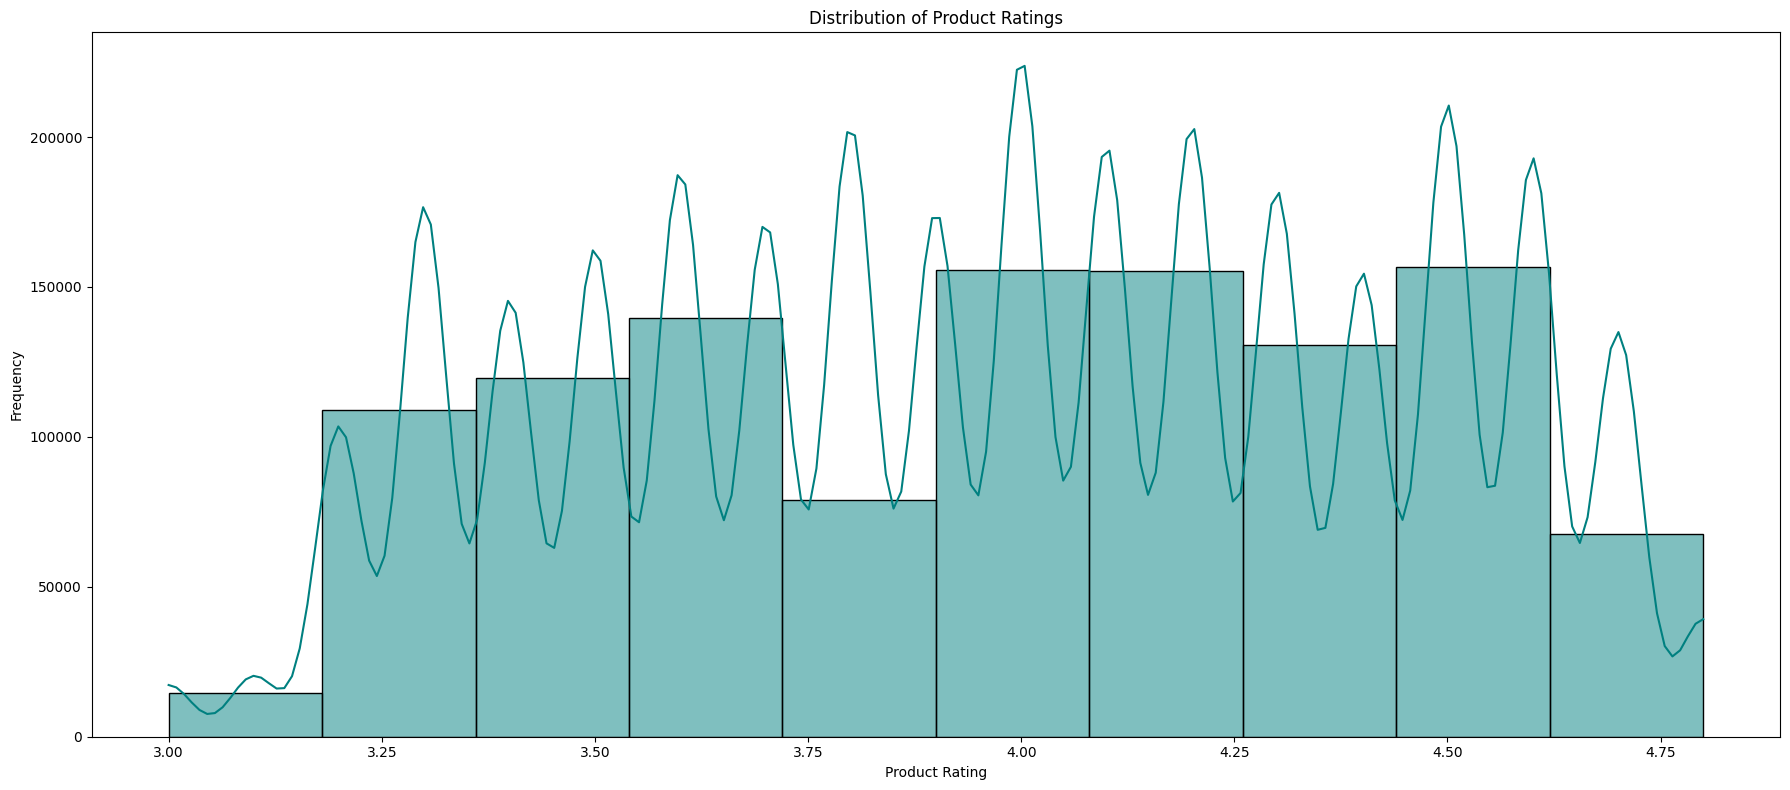

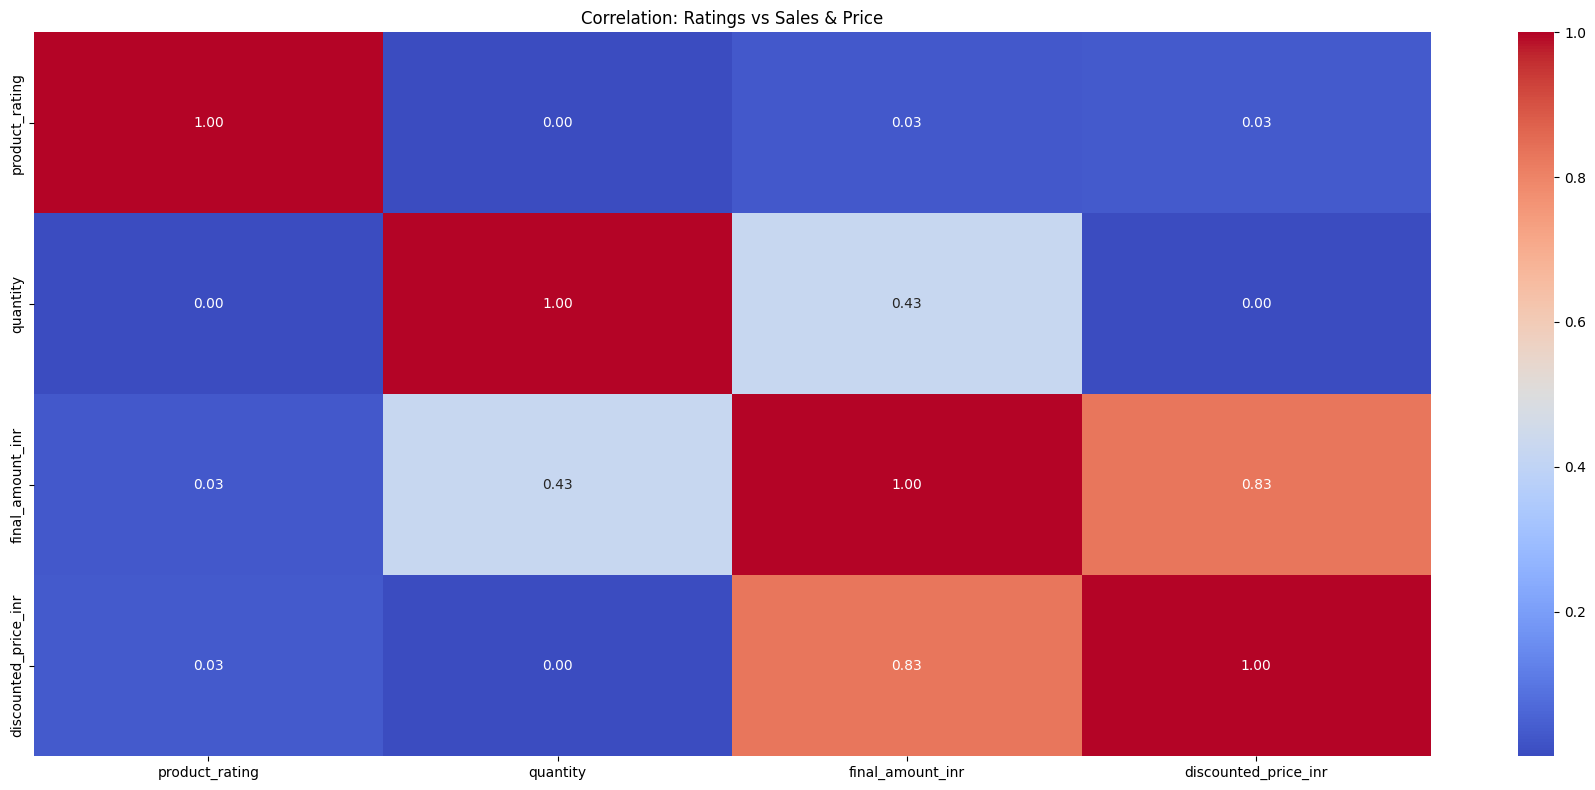

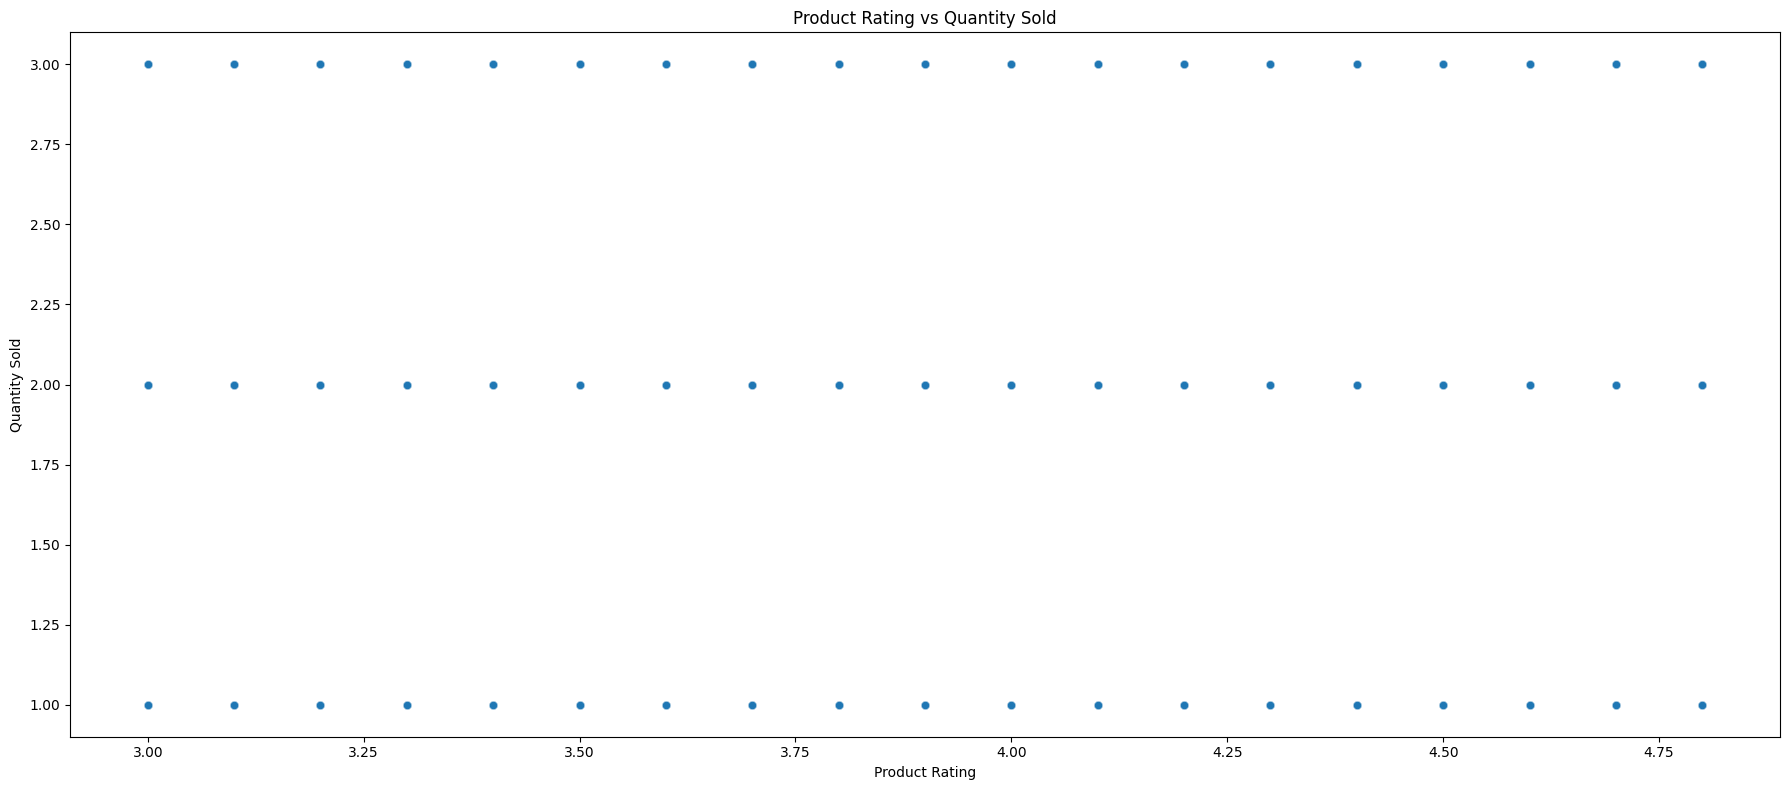

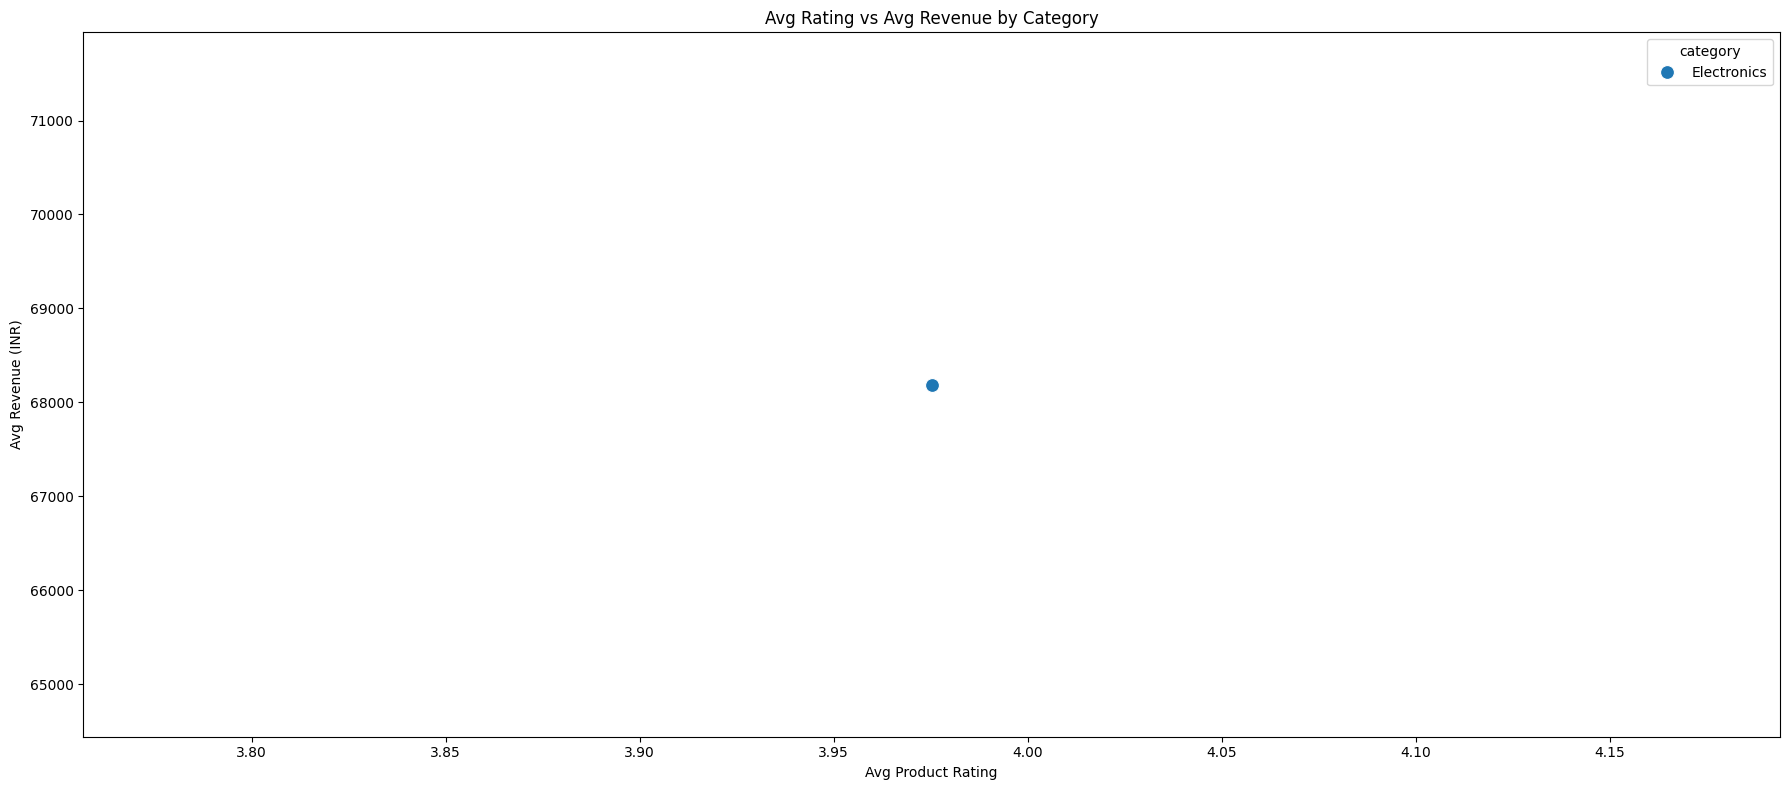

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1505461547.py:76: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1505461547.py:79: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




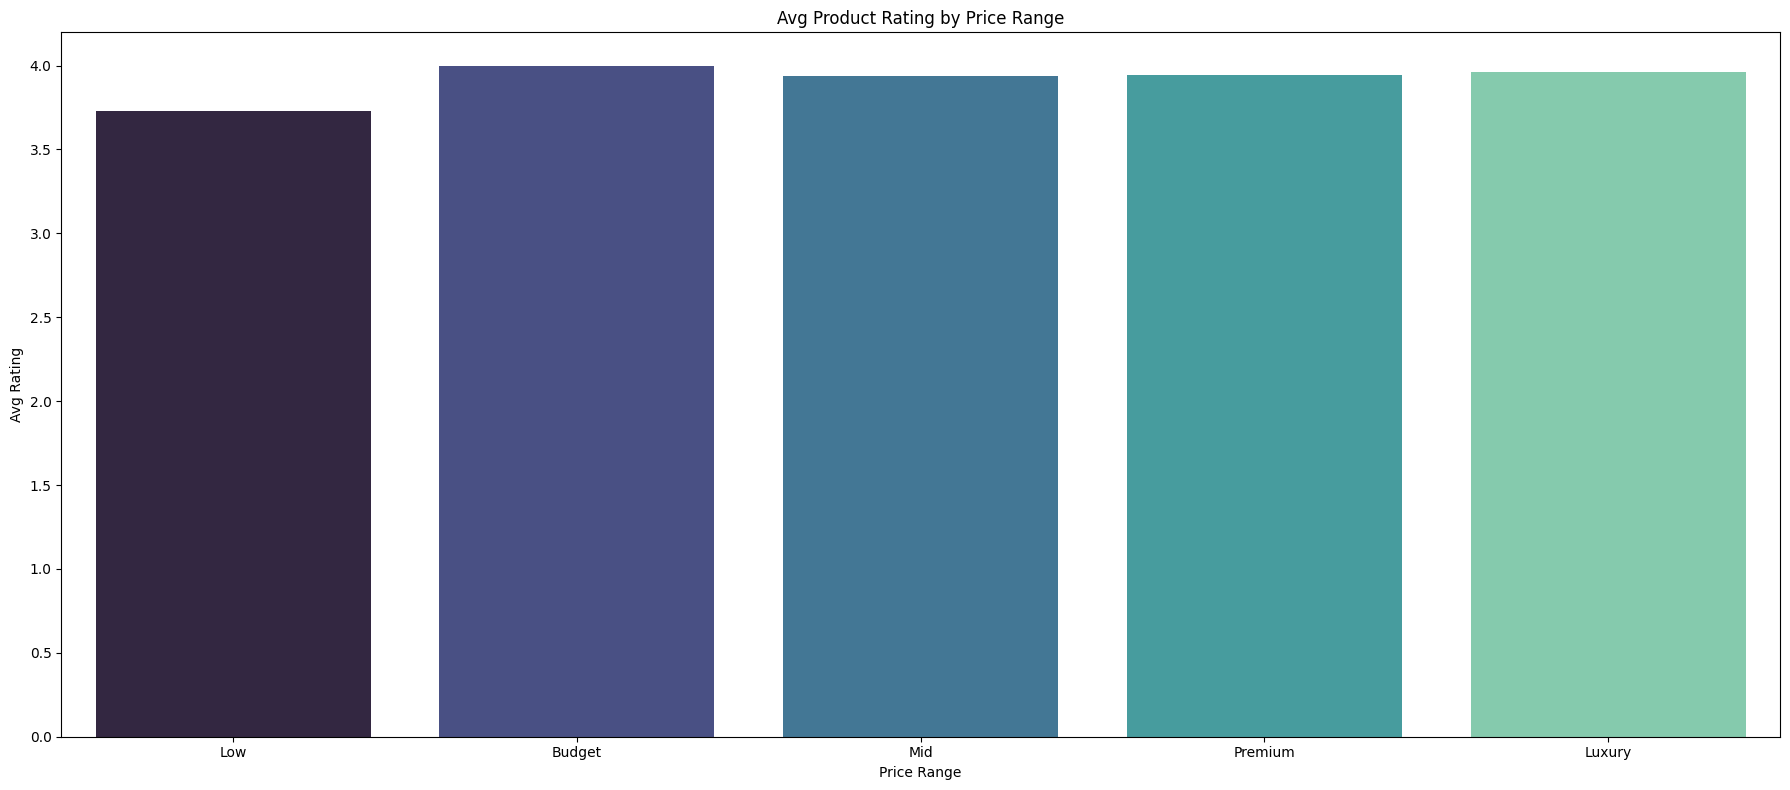

In [90]:
#Q 16

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path)
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['category'] = data['category'].str.title().str.strip()
data['product_rating'] = pd.to_numeric(data['product_rating'], errors='coerce')
data['discounted_price_inr'] = pd.to_numeric(data['discounted_price_inr'], errors='coerce')
data['quantity'] = pd.to_numeric(data['quantity'], errors='coerce')
data['final_amount_inr'] = pd.to_numeric(data['final_amount_inr'], errors='coerce')

# Step 3: Rating distribution
plt.figure(figsize=(18, 8))
sns.histplot(data['product_rating'].dropna(), bins=10, kde=True, color='teal')
plt.title("Distribution of Product Ratings")
plt.xlabel("Product Rating")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Step 4: Correlation matrix
corr_df = data[['product_rating', 'quantity', 'final_amount_inr', 'discounted_price_inr']].dropna()
corr_matrix = corr_df.corr()

plt.figure(figsize=(18, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation: Ratings vs Sales & Price")
plt.tight_layout()
plt.show()

# Step 5: Scatter plot of rating vs quantity
plt.figure(figsize=(18, 8))
sns.scatterplot(data=data, x='product_rating', y='quantity', alpha=0.3)
plt.title("Product Rating vs Quantity Sold")
plt.xlabel("Product Rating")
plt.ylabel("Quantity Sold")
plt.tight_layout()
plt.show()

# Step 6: Category-wise rating vs revenue
cat_rating = data.groupby('category')[['product_rating', 'final_amount_inr']].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.scatterplot(data=cat_rating, x='product_rating', y='final_amount_inr', hue='category', s=100)
plt.title("Avg Rating vs Avg Revenue by Category")
plt.xlabel("Avg Product Rating")
plt.ylabel("Avg Revenue (INR)")
plt.tight_layout()
plt.show()

# Step 7: Rating vs price range segmentation
data['price_range'] = pd.cut(data['discounted_price_inr'], bins=[0, 500, 2000, 5000, 10000, 50000],
                             labels=['Low', 'Budget', 'Mid', 'Premium', 'Luxury'])

price_rating = data.groupby('price_range')[['product_rating', 'quantity']].mean().reset_index()

plt.figure(figsize=(18, 8))
sns.barplot(data=price_rating, x='price_range', y='product_rating', palette='mako')
plt.title("Avg Product Rating by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Avg Rating")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\630801686.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



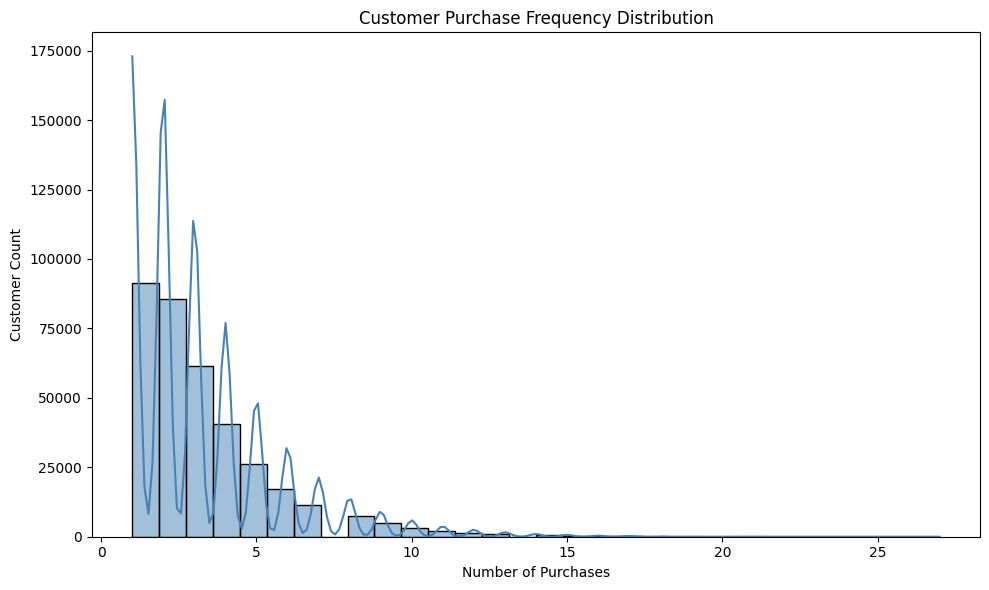

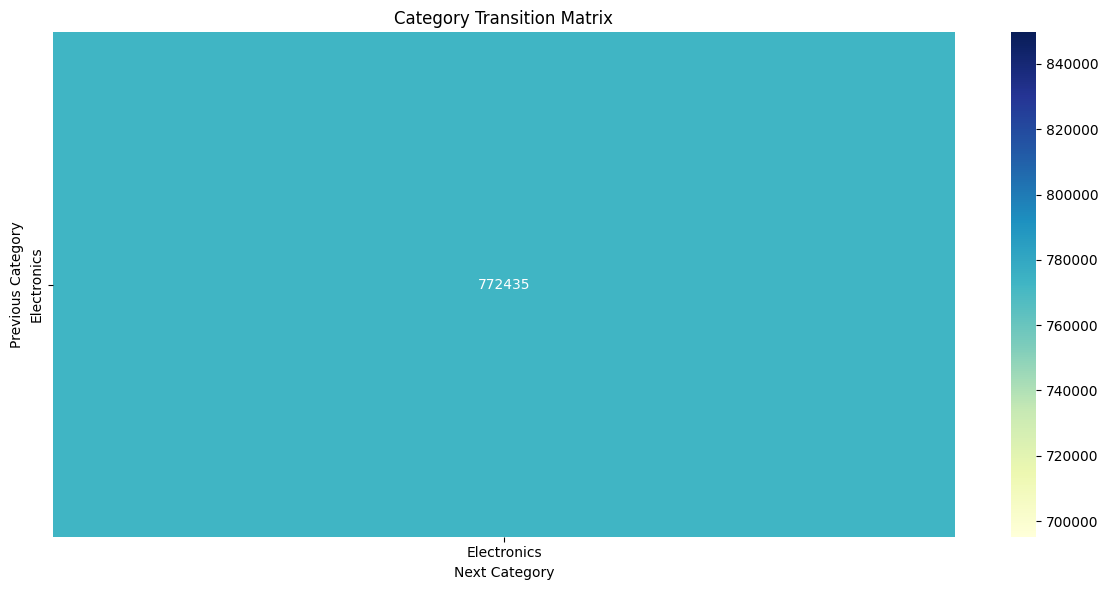

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\630801686.py:73: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




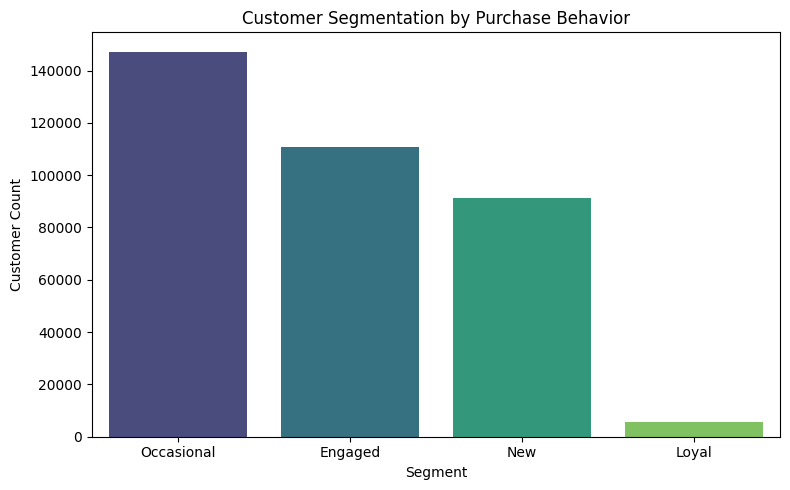

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\630801686.py:89: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




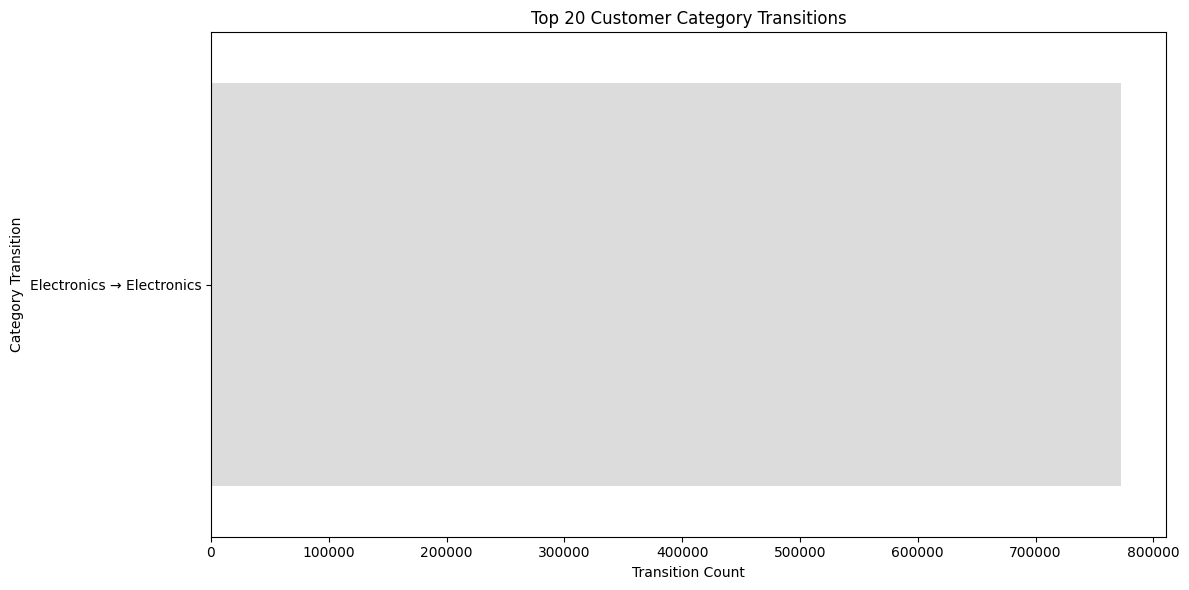

In [94]:
#Q 17

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['customer_id'] = data['customer_id'].astype(str).str.strip()
data['category'] = data['category'].str.title().str.strip()
data['order_month'] = data['order_date'].dt.to_period('M')

# Step 3: Purchase frequency analysis
purchase_freq = data.groupby('customer_id')['order_date'].count().reset_index()
purchase_freq.columns = ['customer_id', 'purchase_count']

plt.figure(figsize=(10, 6))
sns.histplot(purchase_freq['purchase_count'], bins=30, kde=True, color='steelblue')
plt.title("Customer Purchase Frequency Distribution")
plt.xlabel("Number of Purchases")
plt.ylabel("Customer Count")
plt.tight_layout()
plt.show()

# Step 4: Category transition matrix
data_sorted = data.sort_values(by=['customer_id', 'order_date'])
data_sorted['prev_category'] = data_sorted.groupby('customer_id')['category'].shift(1)
transitions = data_sorted.dropna(subset=['prev_category'])
transition_matrix = transitions.groupby(['prev_category', 'category']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(transition_matrix, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Category Transition Matrix")
plt.xlabel("Next Category")
plt.ylabel("Previous Category")
plt.tight_layout()
plt.show()

# Step 5: Customer evolution segmentation
def classify_loyalty(purchases):
    if purchases == 1:
        return 'New'
    elif purchases <= 3:
        return 'Occasional'
    elif purchases <= 10:
        return 'Engaged'
    else:
        return 'Loyal'

purchase_freq['customer_segment'] = purchase_freq['purchase_count'].apply(classify_loyalty)
segment_counts = purchase_freq['customer_segment'].value_counts().reset_index()
segment_counts.columns = ['Segment', 'Count']

plt.figure(figsize=(8, 5))
sns.barplot(data=segment_counts, x='Segment', y='Count', palette='viridis')
plt.title("Customer Segmentation by Purchase Behavior")
plt.ylabel("Customer Count")
plt.xlabel("Segment")
plt.tight_layout()
plt.show()

# Step 6:  category transitions
# Prepare top transitions for bar chart
top_transitions = value.sort_values(by='count', ascending=False).head(20)

# Create a combined label for each transition
top_transitions['transition'] = top_transitions['prev_category'] + " → " + top_transitions['category']

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top_transitions, y='transition', x='count', palette='coolwarm')
plt.title("Top 20 Customer Category Transitions")
plt.xlabel("Transition Count")
plt.ylabel("Category Transition")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3148175361.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



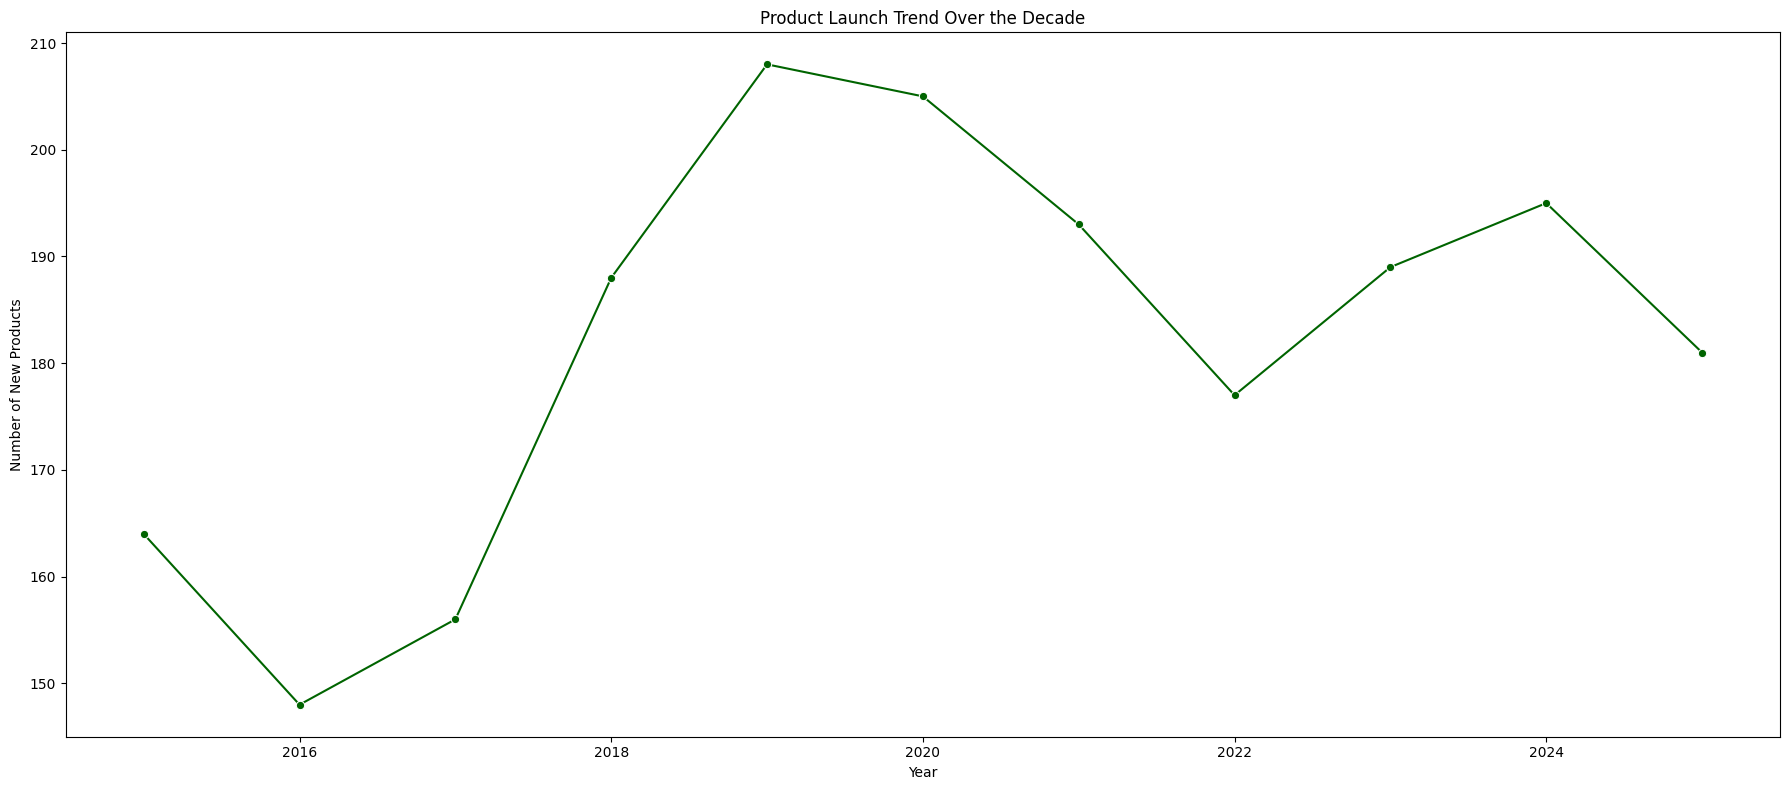

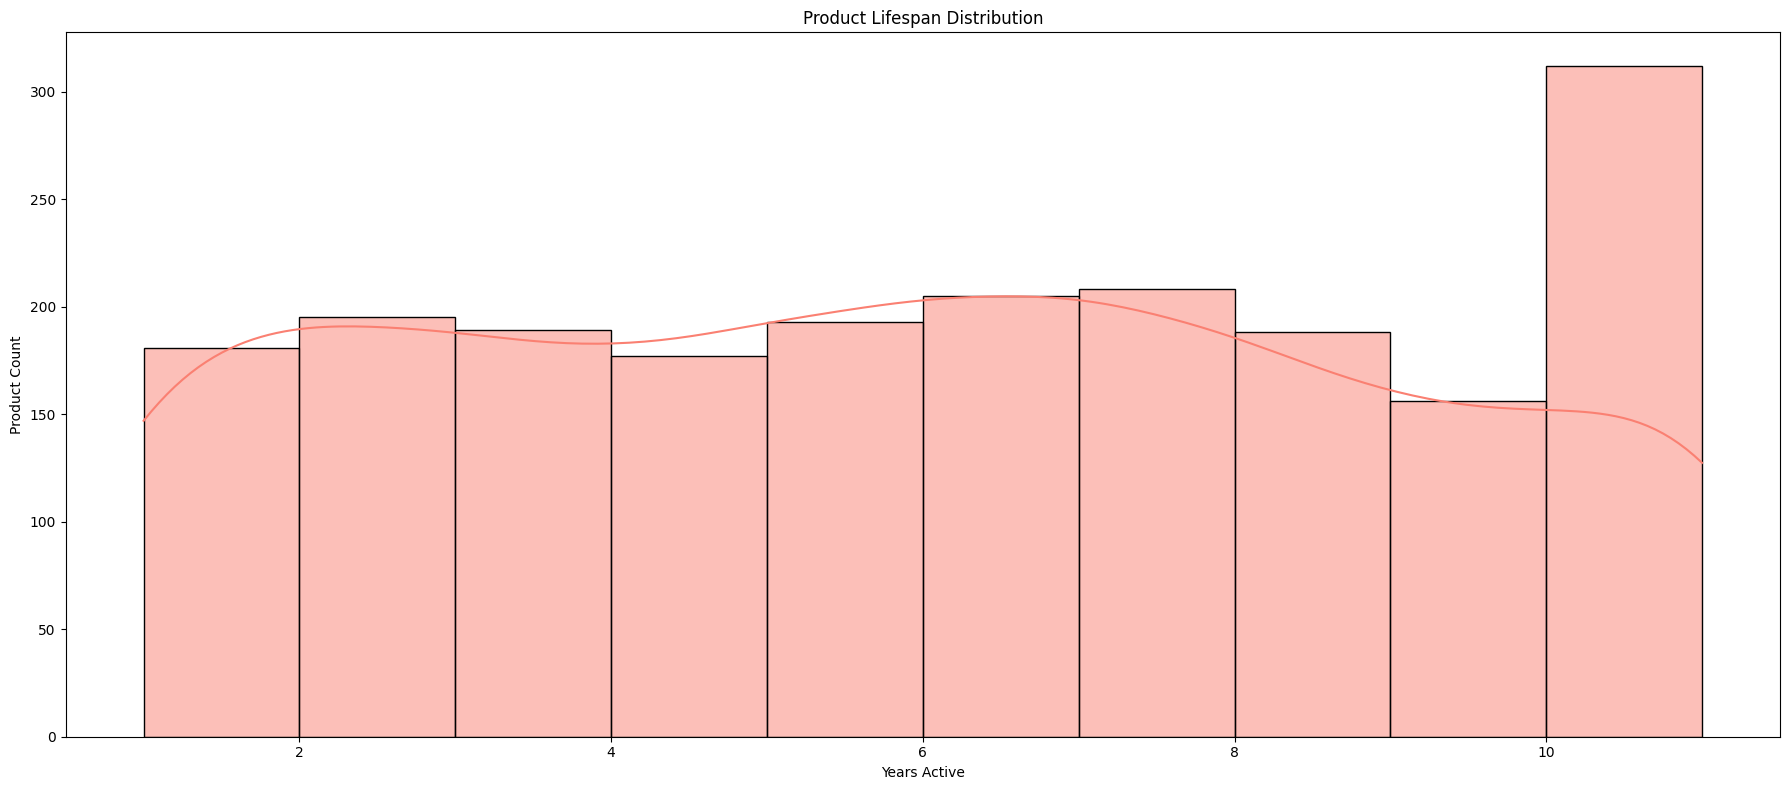

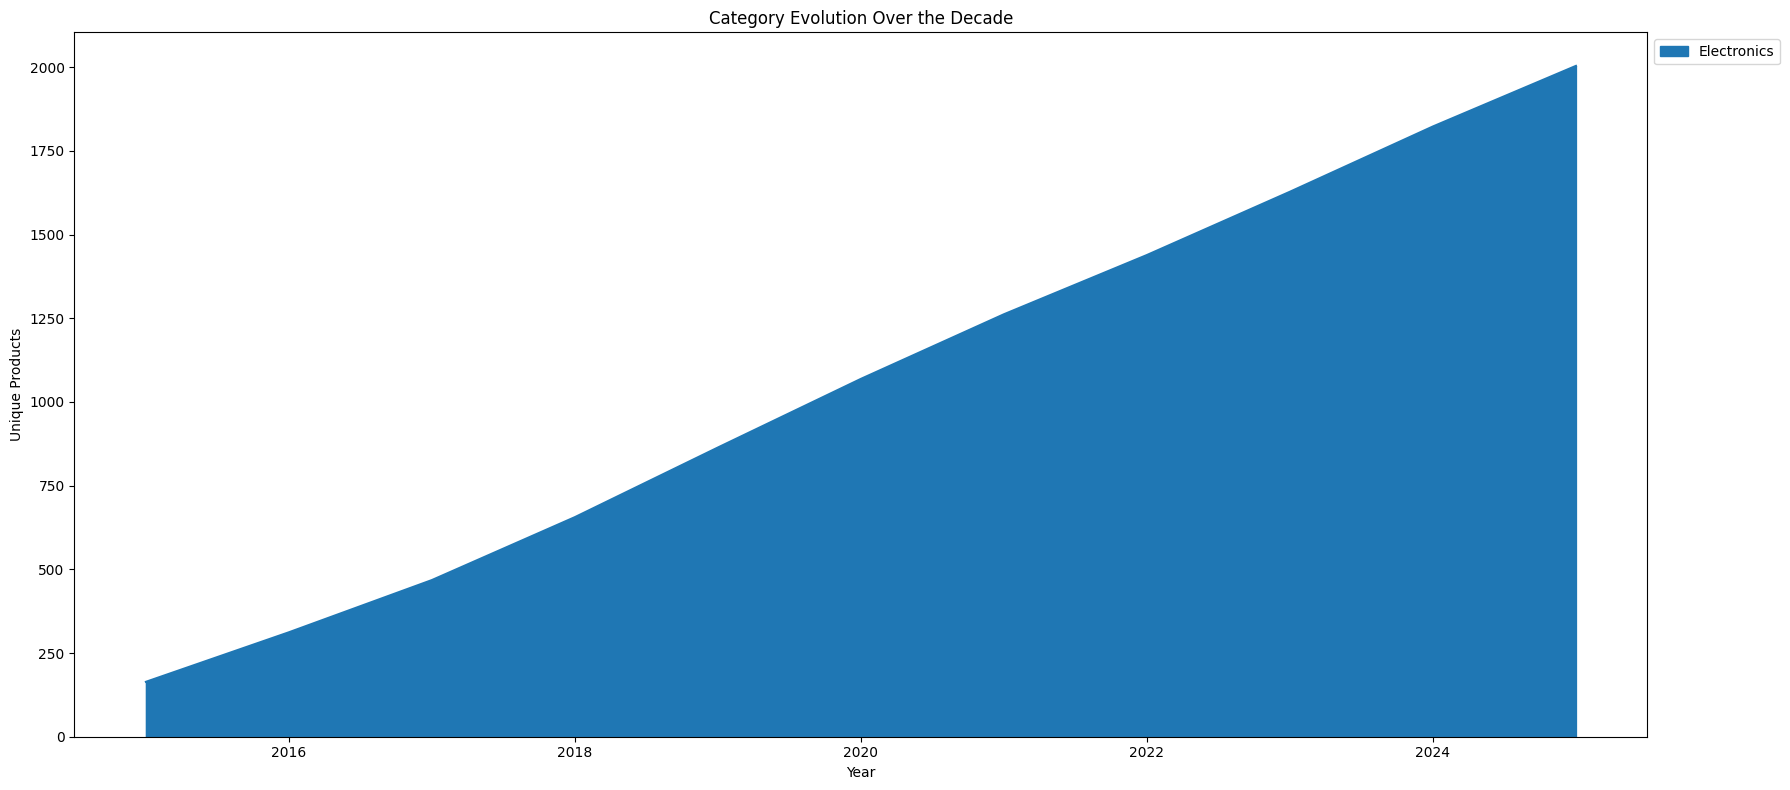

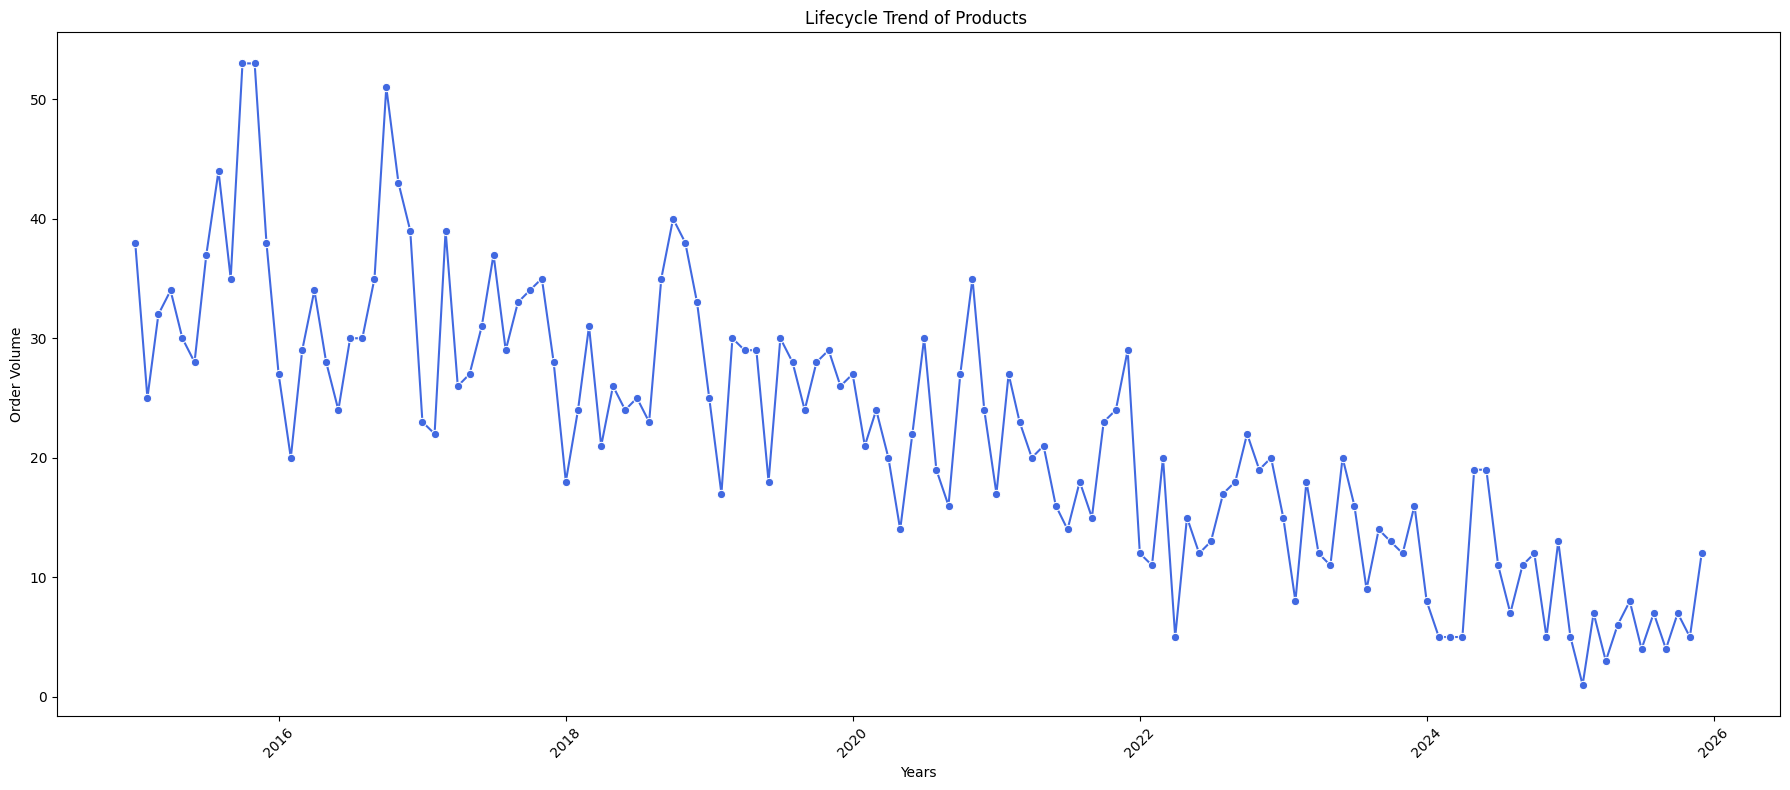

In [99]:
#Q 18

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean relevant columns
data['customer_id'] = data['customer_id'].astype(str).str.strip()
data['product_id'] = data['product_id'].astype(str).str.strip()
data['product_name'] = data['product_name'].str.title().str.strip()
data['category'] = data['category'].str.title().str.strip()
data['order_month'] = data['order_date'].dt.to_period('M')

# Step 3: Product Launch Success
launch_years = data.groupby('product_id')['order_year'].min().reset_index()
launch_years.columns = ['product_id', 'launch_year']
data = data.merge(launch_years, on='product_id', how='left')

launch_counts = launch_years['launch_year'].value_counts().sort_index().reset_index()
launch_counts.columns = ['Year', 'Products Launched']

plt.figure(figsize=(18, 8))
sns.lineplot(data=launch_counts, x='Year', y='Products Launched', marker='o', color='darkgreen')
plt.title("Product Launch Trend Over the Decade")
plt.xlabel("Year")
plt.ylabel("Number of New Products")
plt.tight_layout()
plt.show()

# Step 4: Product Decline Phases
decline_years = data.groupby('product_id')['order_year'].max().reset_index()
decline_years.columns = ['product_id', 'last_year']

lifespan = pd.merge(launch_years, decline_years, on='product_id')
lifespan['duration'] = lifespan['last_year'] - lifespan['launch_year'] + 1

plt.figure(figsize=(18, 8))
sns.histplot(lifespan['duration'], bins=10, kde=True, color='salmon')
plt.title("Product Lifespan Distribution")
plt.xlabel("Years Active")
plt.ylabel("Product Count")
plt.tight_layout()
plt.show()

# Step 5: Category Evolution Over Time
category_trend = data.groupby(['order_year', 'category'])['product_id'].nunique().reset_index()
category_trend.columns = ['Year', 'Category', 'Unique Products']

pivot_ct = category_trend.pivot(index='Year', columns='Category', values='Unique Products').fillna(0)
pivot_ct.plot.area(figsize=(18, 8), colormap='tab20')
plt.title("Category Evolution Over the Decade")
plt.xlabel("Year")
plt.ylabel("Unique Products")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

# Step 6: Product Lifecycle Curve 
sample_product_id = data['product_id'].value_counts().index[0]

# Group by month for product
product_lifecycle = (
    data[data['product_id'] == sample_product_id]
    .groupby('order_month')['product_id']
    .count()
    .reset_index()
)
product_lifecycle.columns = ['Month', 'Orders']

# Convert Month to datetime for plotting
product_lifecycle['Month'] = product_lifecycle['Month'].dt.to_timestamp()

# Plot lifecycle trend
plt.figure(figsize=(18, 8))
sns.lineplot(data=product_lifecycle, x='Month', y='Orders', marker='o', color='royalblue')
plt.title("Lifecycle Trend of Products ")
plt.xlabel("Years")
plt.ylabel("Order Volume")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1825540783.py:20: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



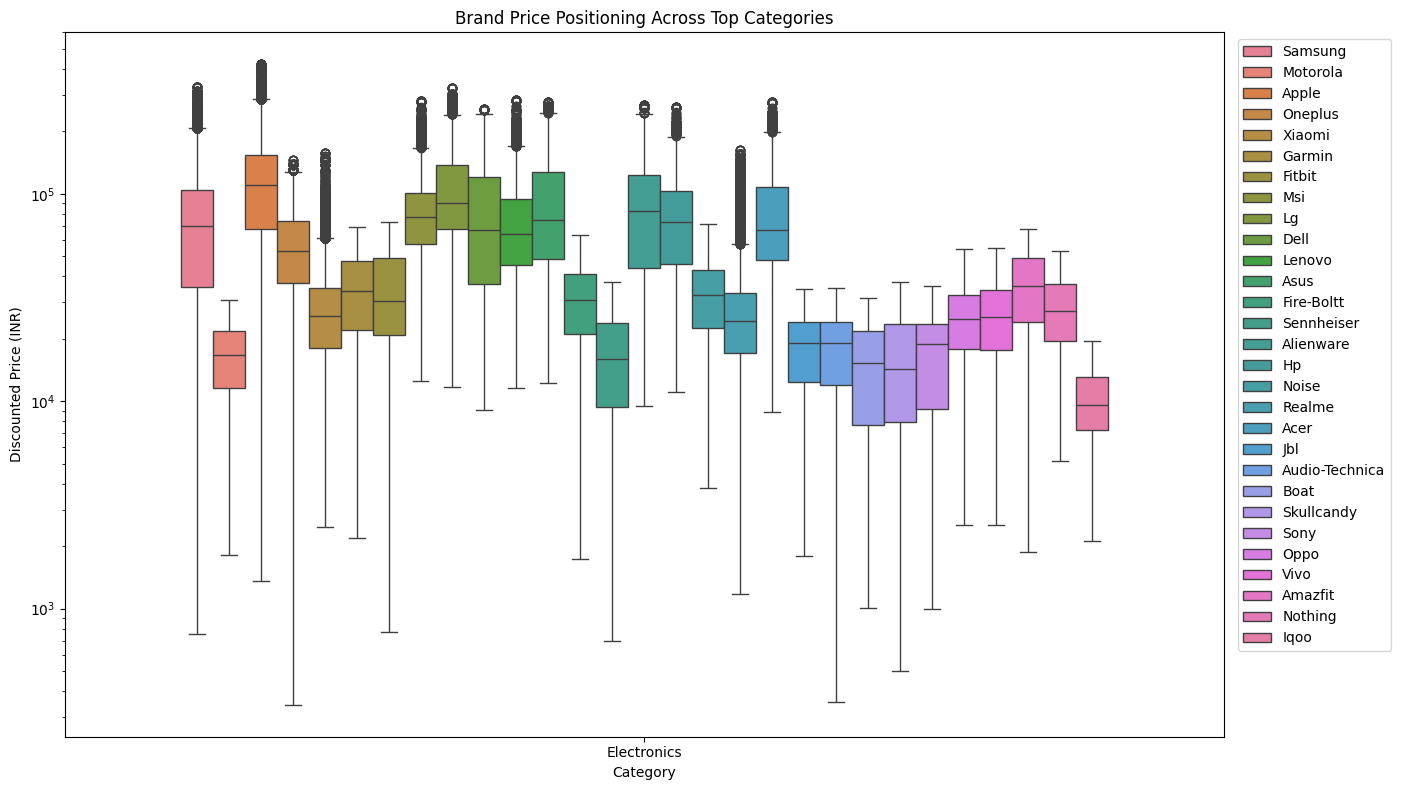

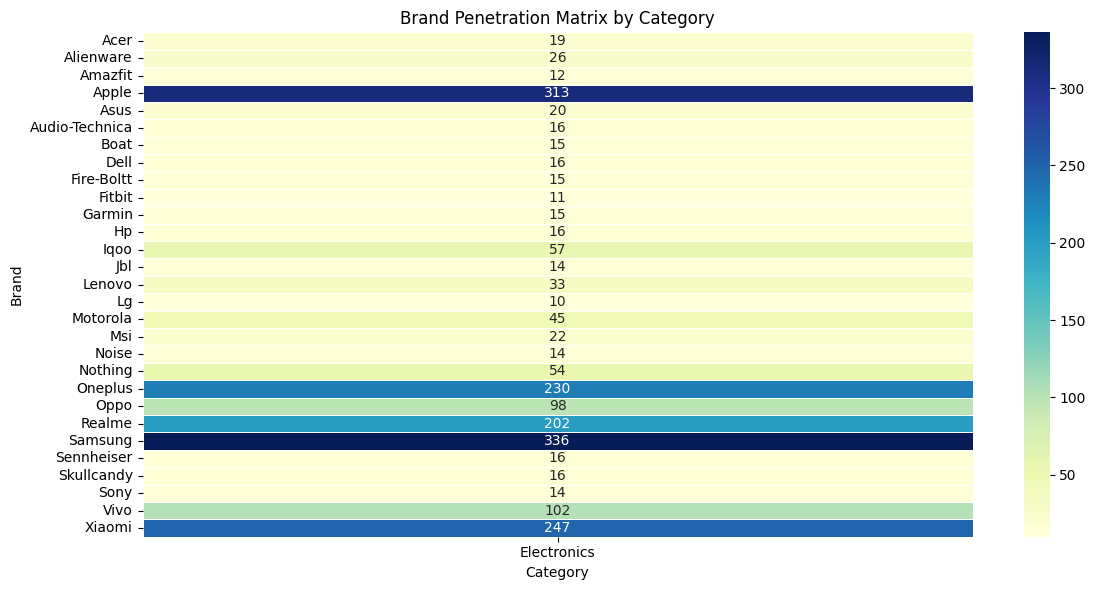

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\1825540783.py:76: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




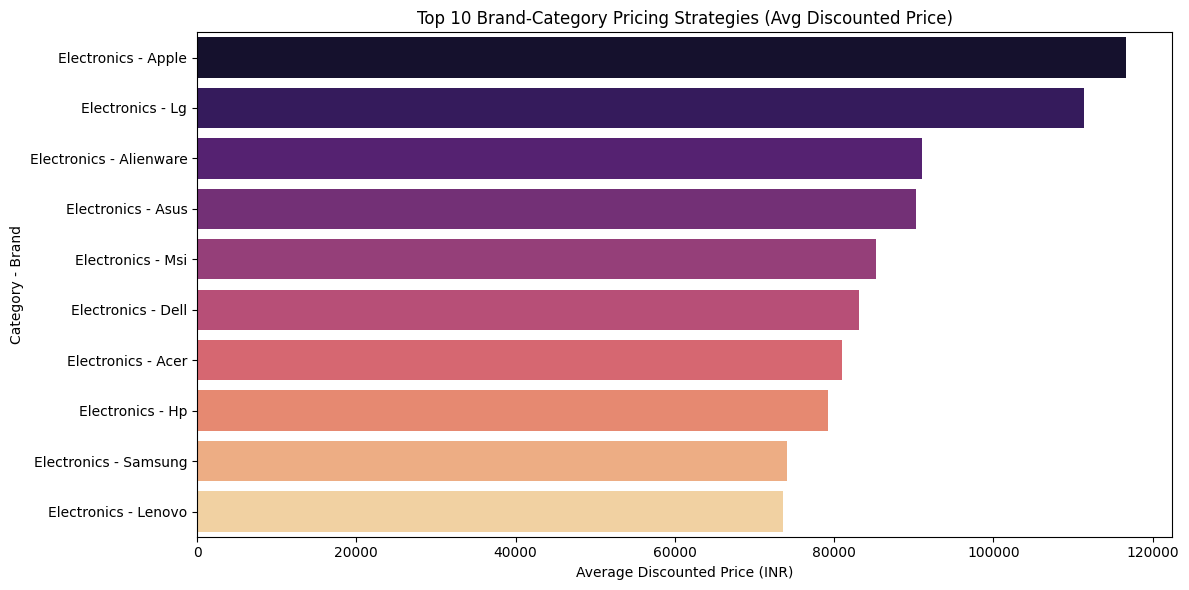

In [103]:
#Q 19

# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and standardize relevant columns
data['brand'] = data['brand'].astype(str).str.title().str.strip()
data['category'] = data['category'].str.title().str.strip()
data['subcategory'] = data['subcategory'].str.title().str.strip()
data['product_id'] = data['product_id'].astype(str).str.strip()

# Convert price columns to numeric
data['original_price_inr'] = pd.to_numeric(data['original_price_inr'], errors='coerce')
data['discounted_price_inr'] = pd.to_numeric(data['discounted_price_inr'], errors='coerce')

# Drop rows with missing key values
data = data.dropna(subset=['discounted_price_inr', 'brand', 'category'])

# Step 3: Box Plot — Brand Price Distribution by Category
top_categories = data['category'].value_counts().head(6).index
filtered_data = data[data['category'].isin(top_categories)]

plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='category', y='discounted_price_inr', hue='brand')
plt.title("Brand Price Positioning Across Top Categories")
plt.xlabel("Category")
plt.ylabel("Discounted Price (INR)")
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.yscale('log')  # Optional: log scale for wide price ranges
plt.tight_layout()
plt.show()

# Step 4: Competitive Matrix — Brand Penetration by Category
penetration = data.groupby(['category', 'brand'])['product_id'].nunique().reset_index()
penetration.columns = ['Category', 'Brand', 'Unique Products']

penetration_matrix = penetration.pivot(index='Brand', columns='Category', values='Unique Products').fillna(0)

plt.figure(figsize=(12, 6))
sns.heatmap(penetration_matrix, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title("Brand Penetration Matrix by Category")
plt.xlabel("Category")
plt.ylabel("Brand")
plt.tight_layout()
plt.show()

# Step 5: Price Range Summary 
# Create a label for each brand-category pair
price_summary['label'] = price_summary['category'] + " - " + price_summary['brand']

# Select top 10 by mean price
top10 = price_summary.head(10)

# Plot horizontal bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=top10, x='mean', y='label', palette='magma')
plt.title("Top 10 Brand-Category Pricing Strategies (Avg Discounted Price)")
plt.xlabel("Average Discounted Price (INR)")
plt.ylabel("Category - Brand")
plt.tight_layout()
plt.show()

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3511967117.py:19: DtypeWarning:

Columns (37) have mixed types. Specify dtype option on import or set low_memory=False.



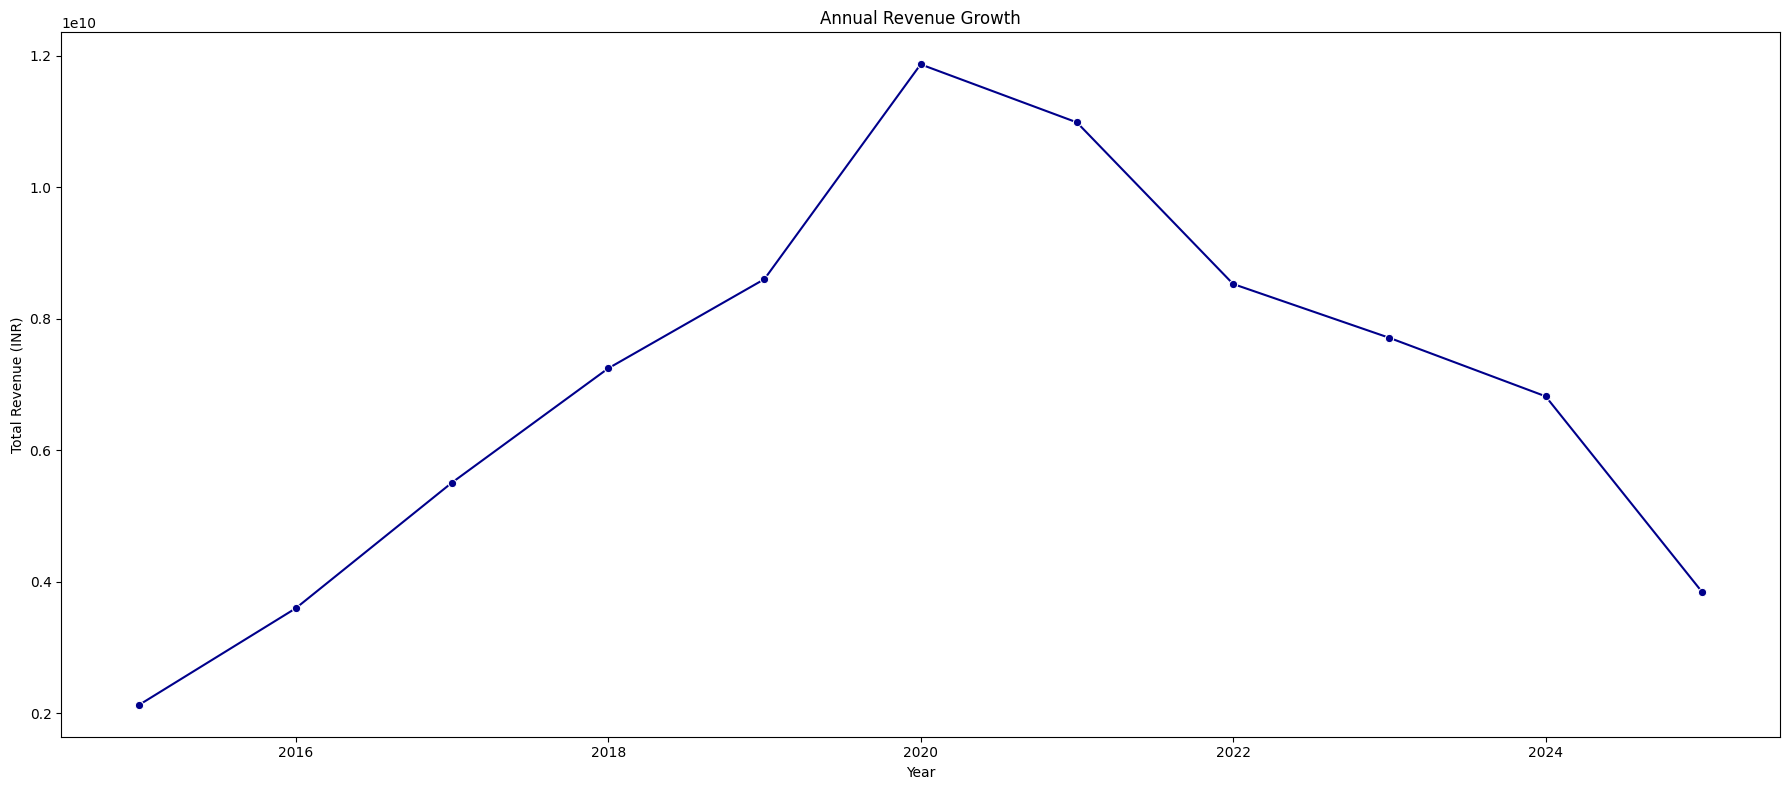

C:\Users\Akshiya George\AppData\Local\Temp\ipykernel_676\3511967117.py:50: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




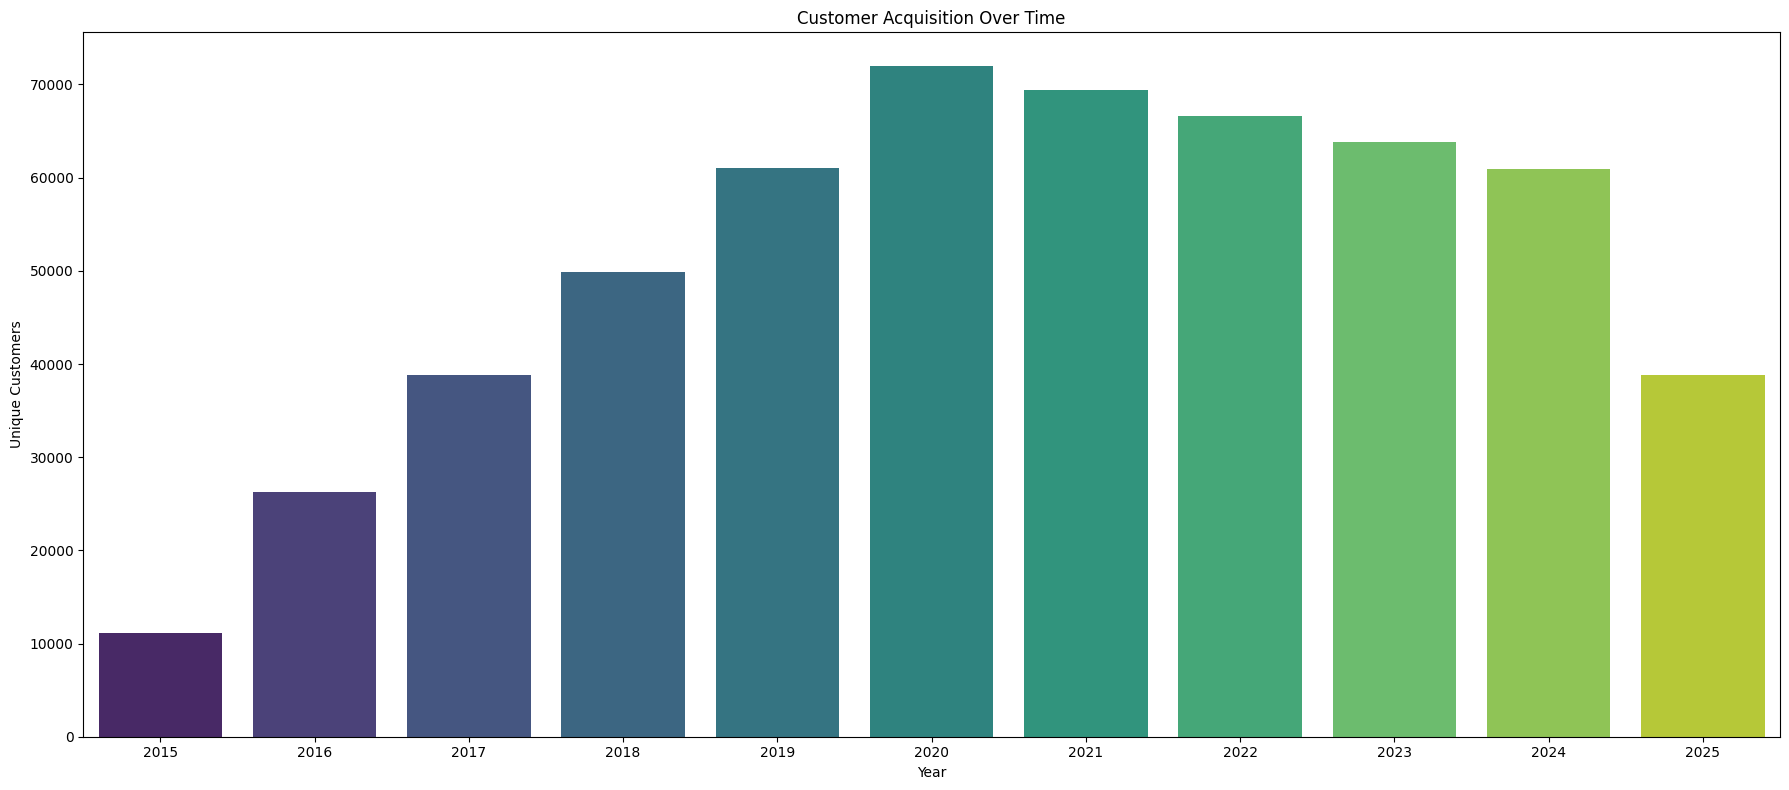

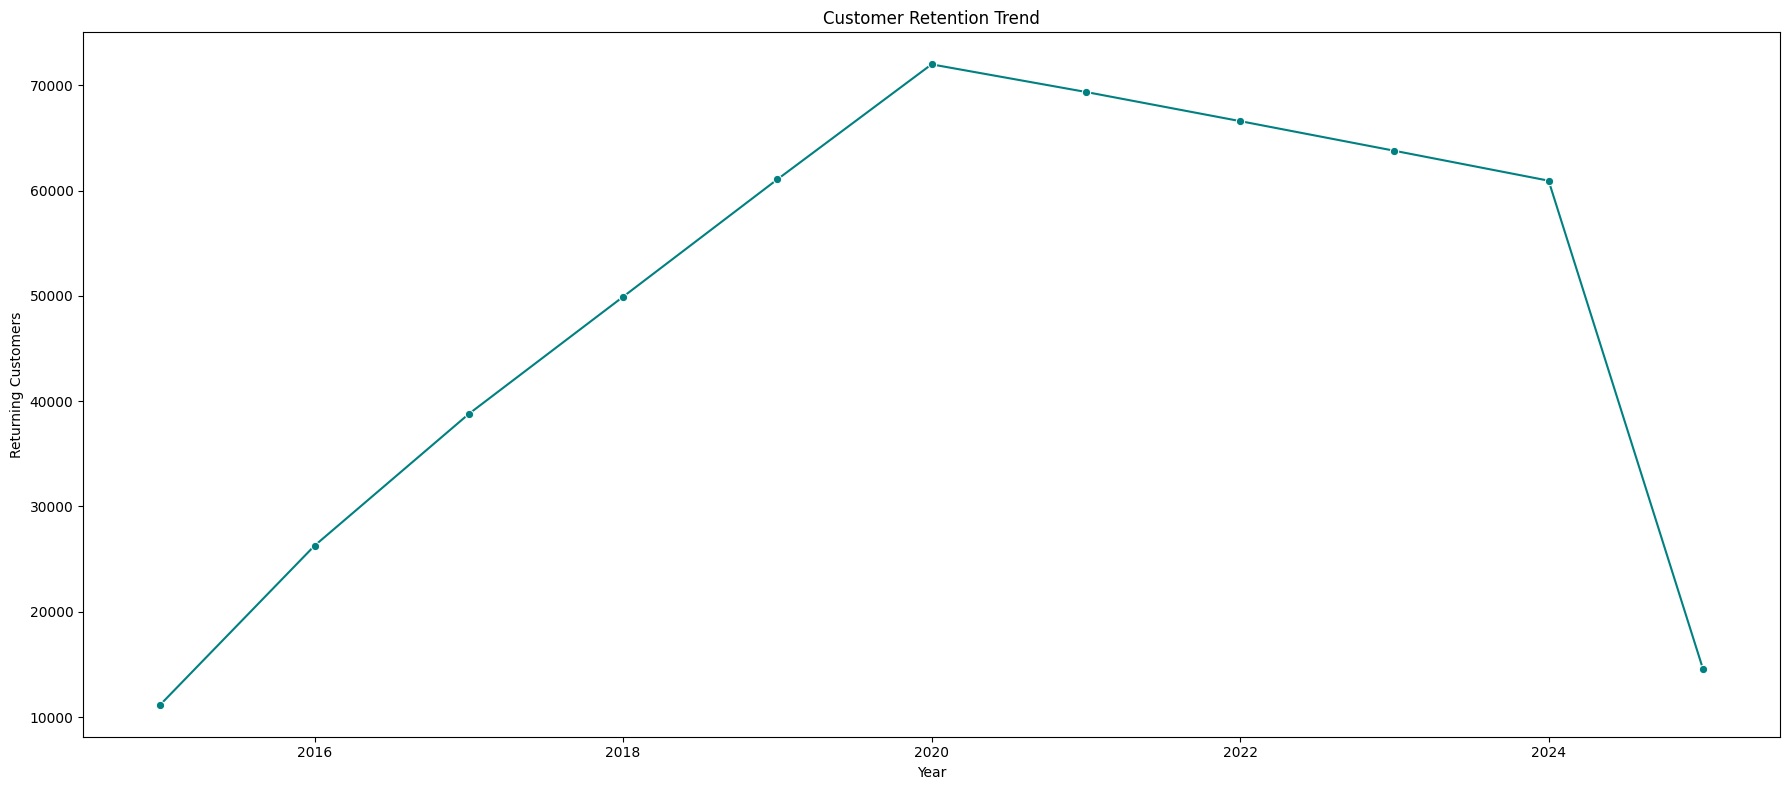

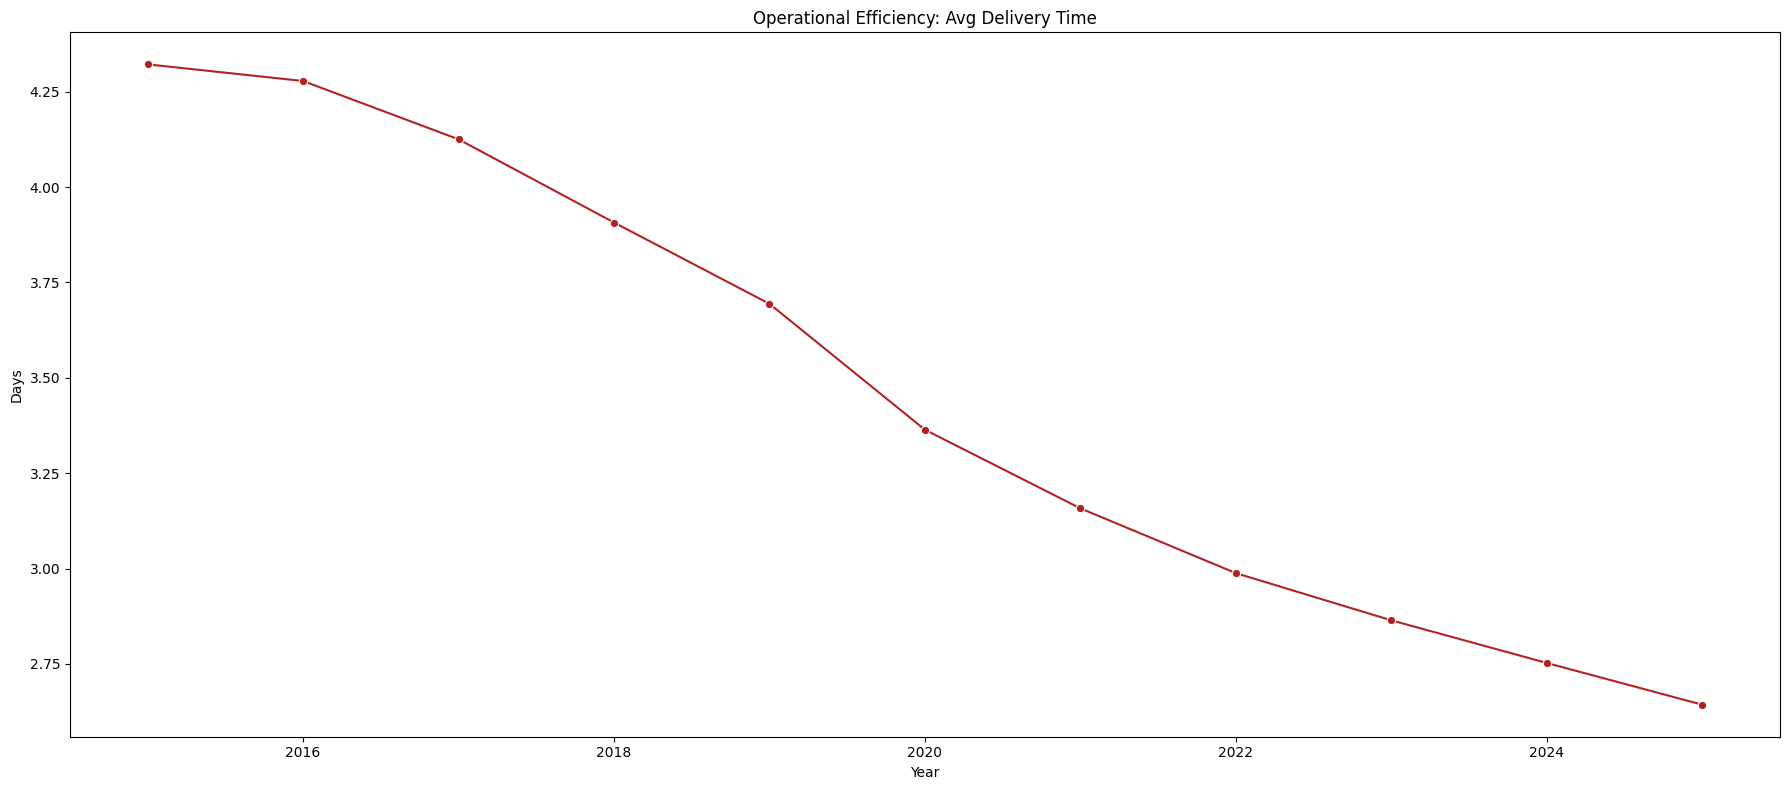

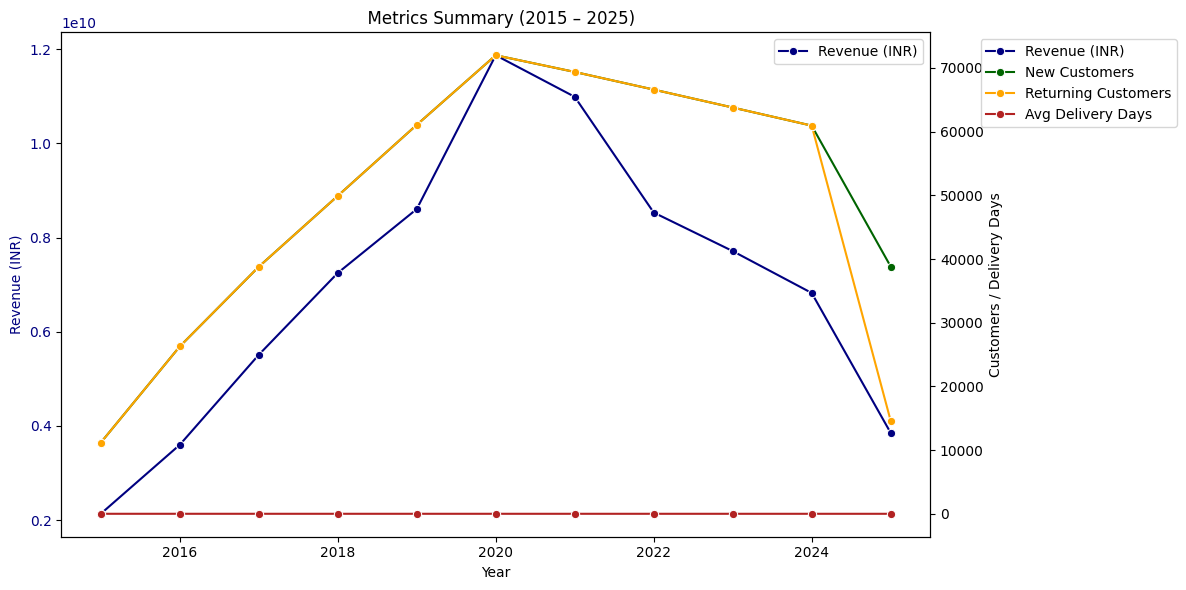

In [109]:
# Q 20
# Step 1: Load and combine all datasets
file_paths = {
    2015: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2015.csv",
    2016: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2016.csv",
    2017: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2017.csv",
    2018: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2018.csv",
    2019: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2019.csv",
    2020: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2020.csv",
    2021: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2021.csv",
    2022: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2022.csv",
    2023: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2023.csv",
    2024: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2024.csv",
    2025: r"C:\Users\Akshiya George\OneDrive\Desktop\Data Science\Amazon\amazon_india_2025.csv"
}

df_list = []
for year, path in file_paths.items():
    df = pd.read_csv(path, parse_dates=['order_date'])
    df['order_year'] = year
    df_list.append(df)

data = pd.concat(df_list, ignore_index=True)

# Step 2: Clean and standardize relevant columns
data['customer_id'] = data['customer_id'].astype(str).str.strip()
data['product_id'] = data['product_id'].astype(str).str.strip()
data['category'] = data['category'].str.title().str.strip()
data['brand'] = data['brand'].str.title().str.strip()
data['order_month'] = data['order_date'].dt.to_period('M')
data['final_amount_inr'] = pd.to_numeric(data['final_amount_inr'], errors='coerce')
data['delivery_days'] = pd.to_numeric(data['delivery_days'], errors='coerce')

# Step 3: Revenue Growth Over Time
revenue_trend = data.groupby('order_year')['final_amount_inr'].sum().reset_index()

plt.figure(figsize=(18, 8))
sns.lineplot(data=revenue_trend, x='order_year', y='final_amount_inr', marker='o', color='darkblue')
plt.title("Annual Revenue Growth")
plt.xlabel("Year")
plt.ylabel("Total Revenue (INR)")
plt.tight_layout()
plt.show()

# Step 4: Customer Acquisition Trend
new_customers = data.groupby('order_year')['customer_id'].nunique().reset_index()
new_customers.columns = ['Year', 'New Customers']

plt.figure(figsize=(18, 8))
sns.barplot(data=new_customers, x='Year', y='New Customers', palette='viridis')
plt.title("Customer Acquisition Over Time")
plt.xlabel("Year")
plt.ylabel("Unique Customers")
plt.tight_layout()
plt.show()

# Step 5: Retention Rate Analysis
first_year = data.groupby('customer_id')['order_year'].min().reset_index()
repeat_customers = data[data['customer_id'].isin(first_year[first_year['order_year'] < 2025]['customer_id'])]
retention = repeat_customers.groupby('order_year')['customer_id'].nunique().reset_index()
retention.columns = ['Year', 'Returning Customers']

plt.figure(figsize=(18, 8))
sns.lineplot(data=retention, x='Year', y='Returning Customers', marker='o', color='teal')
plt.title("Customer Retention Trend")
plt.xlabel("Year")
plt.ylabel("Returning Customers")
plt.tight_layout()
plt.show()

# Step 6: Operational Efficiency — Avg Delivery Time
delivery_efficiency = data.groupby('order_year')['delivery_days'].mean().reset_index()
delivery_efficiency.columns = ['Year', 'Avg Delivery Days']

plt.figure(figsize=(18, 8))
sns.lineplot(data=delivery_efficiency, x='Year', y='Avg Delivery Days', marker='o', color='firebrick')
plt.title("Operational Efficiency: Avg Delivery Time")
plt.xlabel("Year")
plt.ylabel("Days")
plt.tight_layout()
plt.show()

# Step 7: Executive Summary Table
summary_melted = summary.melt(id_vars='Year', var_name='Metric', value_name='Value')

# Plot multi-line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Revenue on primary y-axis
sns.lineplot(data=summary, x='Year', y='Revenue (INR)', marker='o', ax=ax1, label='Revenue (INR)', color='navy')
ax1.set_ylabel("Revenue (INR)", color='navy')
ax1.tick_params(axis='y', labelcolor='navy')

# Create secondary y-axis for customer metrics
ax2 = ax1.twinx()
sns.lineplot(data=summary, x='Year', y='New Customers', marker='o', ax=ax2, label='New Customers', color='darkgreen')
sns.lineplot(data=summary, x='Year', y='Returning Customers', marker='o', ax=ax2, label='Returning Customers', color='orange')
sns.lineplot(data=summary, x='Year', y='Avg Delivery Days', marker='o', ax=ax2, label='Avg Delivery Days', color='firebrick')
ax2.set_ylabel("Customers / Delivery Days", color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left', bbox_to_anchor=(1.05, 1))

plt.title("  Metrics Summary (2015 – 2025)")
plt.tight_layout()
plt.show()